In [2]:
# librerías básicas de tratamiento de arrays y dataframes

%matplotlib inline
import pandas as pd 
import numpy as np
import scipy # librería multipack

# librerías de visualización

import matplotlib.pyplot as plt
import seaborn as sns

# Visualización de missings

# import missingno as msno

# librerías/funciones de normalización/estandarización
    
from sklearn.preprocessing import MinMaxScaler  # normalización
from sklearn.preprocessing import scale # estandarización
from sklearn.preprocessing import StandardScaler

# librarías necesarias para selección de atributos

from sklearn.feature_selection import SelectKBest  # apartado métodos filter
from sklearn.feature_selection import SelectPercentile  # apartado métodos filter
from sklearn.feature_selection import chi2  # apartado métodos filter
from sklearn.feature_selection import f_classif  # apartado métodos filter
from sklearn.feature_selection import mutual_info_classif  # apartado métodos filter
from sklearn.feature_selection import SelectFromModel # apartado métodos filter bajo modelos
from sklearn.feature_selection import RFE  # apartado métodos wrapper
from sklearn.model_selection   import StratifiedKFold # apartado métodos wrapper
from sklearn.feature_selection import RFECV # en apartado wrapper

# librerías/funciones de métricas 

from sklearn.metrics         import accuracy_score         # métrica de accuracy
from sklearn.metrics         import recall_score           # recall
from sklearn.metrics         import classification_report  # matriz de confusión
from sklearn.metrics         import auc, roc_curve         # para calcular la curva ROC y el área bajo esta curva
from sklearn.metrics         import mean_squared_error     # para regresión



# utilidades de la librería de sklearn necesarias para técnicas de división de muestras (train/val/test)

from sklearn.model_selection import train_test_split  # función para dividir la población total en muestras de train y test
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

# librerías para el ajuste de parámetros

from sklearn.model_selection import GridSearchCV           # grid de parámetros definido
from sklearn.model_selection import RandomizedSearchCV     # grid de parámetros aleatorios sobre una determinada

# tratamiento de desbalanceo de clases

# from imblearn.over_sampling import ADASYN, SMOTE, RandomOverSampler
# from imblearn.pipeline      import make_pipeline

# algunos modelos de aprendizaje automático de la librería sklearn

from sklearn                       import svm
from sklearn                       import model_selection
from sklearn.linear_model          import LogisticRegression
from sklearn.tree                  import DecisionTreeClassifier
from sklearn.neighbors             import KNeighborsRegressor
from sklearn.neighbors             import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes           import GaussianNB
from sklearn.ensemble              import RandomForestRegressor
from sklearn.ensemble              import RandomForestClassifier
from sklearn.svm                   import SVC
from sklearn.svm                   import SVR
from sklearn.model_selection       import validation_curve
import matplotlib.ticker as ticker
# Gestión de warnings

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

pd.options.display.max_rows= 50
pd.options.display.max_columns = None

In [3]:
GD = pd.read_csv('C:\\Users\\aam05683h\\Desktop\\games_details.csv')

C:\Users\aam05683h\AppData\Local\Temp\ipykernel_9392\374251704.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  GD = pd.read_csv('C:\\Users\\aam05683h\\Desktop\\games_details.csv')


In [4]:
GD

GAME_ID     TEAM_ID TEAM_ABBREVIATION    TEAM_CITY  PLAYER_ID  \
0       22200477  1610612759               SAS  San Antonio    1629641   
1       22200477  1610612759               SAS  San Antonio    1631110   
2       22200477  1610612759               SAS  San Antonio    1627751   
3       22200477  1610612759               SAS  San Antonio    1630170   
4       22200477  1610612759               SAS  San Antonio    1630200   
...          ...         ...               ...          ...        ...   
668623  11200005  1610612743               DEN       Denver     202706   
668624  11200005  1610612743               DEN       Denver     202702   
668625  11200005  1610612743               DEN       Denver     201585   
668626  11200005  1610612743               DEN       Denver     202389   
668627  11200005  1610612743               DEN       Denver     201951   

            PLAYER_NAME NICKNAME START_POSITION COMMENT    MIN  FGM   FGA  \
0        Romeo Langford    Romeo              F     NaN  18:06  1.0   1.0   
1         Jeremy Sochan   Jeremy              F     NaN  31:01  7.0  14.0   
2          Jakob Poeltl    Jakob              C     NaN  21:42  6.0   9.0   
3         Devin Vassell    Devin              G     NaN  30:20  4.0  13.0   
4             Tre Jones      Tre              G     NaN  27:44  7.0  12.0   
...                 ...      ...            ...     ...    ...  ...   ...   
668623  Jordan Hamilton      NaN            NaN     NaN     19  4.0   9.0   
668624   Kenneth Faried      NaN            NaN     NaN     23  7.0  11.0   
668625     Kosta Koufos      NaN            NaN     NaN     15  3.0   7.0   
668626   Timofey Mozgov      NaN            NaN     NaN     19  1.0   1.0   
668627        Ty Lawson      NaN            NaN     NaN     27  3.0   6.0   

        FG_PCT  FG3M  FG3A  FG3_PCT  FTM   FTA  FT_PCT  OREB  DREB  REB  AST  \
0        1.000   0.0   0.0    0.000  0.0   0.0   0.000   1.0   1.0  2.0  0.0   
1        0.500   2.0   4.0    0.500  7.0  10.0   0.700   6.0   3.0  9.0  6.0   
2        0.667   0.0   0.0    0.000  1.0   1.0   1.000   1.0   3.0  4.0  1.0   
3        0.308   1.0   6.0    0.167  1.0   1.0   1.000   0.0   9.0  9.0  5.0   
4        0.583   1.0   3.0    0.333  4.0   4.0   1.000   0.0   2.0  2.0  3.0   
...        ...   ...   ...      ...  ...   ...     ...   ...   ...  ...  ...   
668623   0.444   3.0   6.0    0.500  6.0   7.0   0.857   0.0   2.0  2.0  0.0   
668624   0.636   0.0   0.0    0.000  4.0   4.0   1.000   1.0   0.0  1.0  1.0   
668625   0.429   0.0   0.0    0.000  0.0   0.0   0.000   3.0   5.0  8.0  0.0   
668626   1.000   0.0   0.0    0.000  0.0   2.0   0.000   1.0   2.0  3.0  1.0   
668627   0.500   0.0   0.0    0.000  2.0   4.0   0.500   0.0   2.0  2.0  6.0   

        STL  BLK   TO   PF   PTS  PLUS_MINUS  
0       1.0  0.0  2.0  5.0   2.0        -2.0  
1       1.0  0.0  2.0  1.0  23.0       -14.0  
2       1.0  0.0  2.0  4.0  13.0        -4.0  
3       3.0  0.0  2.0  1.0  10.0       -18.0  
4       0.0  0.0  2.0  2.0  19.0         0.0  
...     ...  ...  ...  ...   ...         ...  
668623  2.0  0.0  1.0  3.0  17.0         NaN  
668624  1.0  0.0  3.0  3.0  18.0         NaN  
668625  1.0  0.0  0.0  3.0   6.0         NaN  
668626  0.0  0.0  4.0  2.0   2.0         NaN  
668627  2.0  0.0  6.0  1.0   8.0         NaN  

[668628 rows x 29 columns]

In [5]:
Games = pd.read_csv('C:\\Users\\aam05683h\\Desktop\\games.csv')

In [6]:
Games.describe()

GAME_ID  HOME_TEAM_ID  VISITOR_TEAM_ID        SEASON  \
count  2.665100e+04  2.665100e+04     2.665100e+04  26651.000000   
mean   2.175487e+07  1.610613e+09     1.610613e+09   2012.113879   
std    5.570189e+06  8.638670e+00     8.659299e+00      5.587031   
min    1.030000e+07  1.610613e+09     1.610613e+09   2003.000000   
25%    2.070001e+07  1.610613e+09     1.610613e+09   2007.000000   
50%    2.120076e+07  1.610613e+09     1.610613e+09   2012.000000   
75%    2.180005e+07  1.610613e+09     1.610613e+09   2017.000000   
max    5.210021e+07  1.610613e+09     1.610613e+09   2022.000000   

       TEAM_ID_home      PTS_home   FG_PCT_home   FT_PCT_home  FG3_PCT_home  \
count  2.665100e+04  26552.000000  26552.000000  26552.000000  26552.000000   
mean   1.610613e+09    103.455898      0.460735      0.760377      0.356023   
std    8.638670e+00     13.283370      0.056676      0.100677      0.111164   
min    1.610613e+09     36.000000      0.250000      0.143000      0.000000   
25%    1.610613e+09     94.000000      0.422000      0.697000      0.286000   
50%    1.610613e+09    103.000000      0.460000      0.765000      0.357000   
75%    1.610613e+09    112.000000      0.500000      0.833000      0.429000   
max    1.610613e+09    168.000000      0.684000      1.000000      1.000000   

           AST_home      REB_home  TEAM_ID_away      PTS_away   FG_PCT_away  \
count  26552.000000  26552.000000  2.665100e+04  26552.000000  26552.000000   
mean      22.823441     43.374284  1.610613e+09    100.639876      0.449732   
std        5.193308      6.625769  8.659299e+00     13.435868      0.055551   
min        6.000000     15.000000  1.610613e+09     33.000000      0.244000   
25%       19.000000     39.000000  1.610613e+09     91.000000      0.412000   
50%       23.000000     43.000000  1.610613e+09    100.000000      0.449000   
75%       26.000000     48.000000  1.610613e+09    110.000000      0.487000   
max       50.000000     72.000000  1.610613e+09    168.000000      0.687000   

        FT_PCT_away  FG3_PCT_away      AST_away      REB_away  HOME_TEAM_WINS  
count  26552.000000  26552.000000  26552.000000  26552.000000    26651.000000  
mean       0.758816      0.349489     21.496271     42.113249        0.587032  
std        0.103429      0.109441      5.160596      6.533039        0.492376  
min        0.143000      0.000000      4.000000     19.000000        0.000000  
25%        0.692000      0.278000     18.000000     38.000000        0.000000  
50%        0.765000      0.350000     21.000000     42.000000        1.000000  
75%        0.833000      0.419000     25.000000     46.000000        1.000000  
max        1.000000      1.000000     46.000000     81.000000        1.000000

El Real Plus-Minus (RPM) es una medida de la contribución neta de un jugador al rendimiento de su equipo en el baloncesto. Se calcula tomando en cuenta el rendimiento del equipo mientras el jugador está en la cancha y comparándolo con el rendimiento del equipo cuando el jugador no está en la cancha

# 2. Análisis Exploratorio de Datos. Auditoría inicial

A simple vista se aprecia que el dataset no tiene un identificador (es decir, clave primaria) y se ha creado un 'index' numérico. También se aprecia que se tienen tanto variables numéricas como categóricas, pero para ello veámoslo mejor de la siguiente manera

In [7]:
print("Tamaño dataset del dataset", GD.shape)
print("Número de variables/predictores (columnas)", GD.shape[1])
print("Número de registros (instancias/filas)", GD.shape[0])

Tamaño dataset del dataset (668628, 29)
Número de variables/predictores (columnas) 29
Número de registros (instancias/filas) 668628


In [8]:
GD.dtypes

GAME_ID                int64
TEAM_ID                int64
TEAM_ABBREVIATION     object
TEAM_CITY             object
PLAYER_ID              int64
PLAYER_NAME           object
NICKNAME              object
START_POSITION        object
COMMENT               object
MIN                   object
FGM                  float64
FGA                  float64
FG_PCT               float64
FG3M                 float64
FG3A                 float64
FG3_PCT              float64
FTM                  float64
FTA                  float64
FT_PCT               float64
OREB                 float64
DREB                 float64
REB                  float64
AST                  float64
STL                  float64
BLK                  float64
TO                   float64
PF                   float64
PTS                  float64
PLUS_MINUS           float64
dtype: object

Tiene float64, int 64 y object 

In [9]:
GD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668628 entries, 0 to 668627
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   GAME_ID            668628 non-null  int64  
 1   TEAM_ID            668628 non-null  int64  
 2   TEAM_ABBREVIATION  668628 non-null  object 
 3   TEAM_CITY          668628 non-null  object 
 4   PLAYER_ID          668628 non-null  int64  
 5   PLAYER_NAME        668628 non-null  object 
 6   NICKNAME           53037 non-null   object 
 7   START_POSITION     255765 non-null  object 
 8   COMMENT            109689 non-null  object 
 9   MIN                558938 non-null  object 
 10  FGM                558938 non-null  float64
 11  FGA                558938 non-null  float64
 12  FG_PCT             558938 non-null  float64
 13  FG3M               558938 non-null  float64
 14  FG3A               558938 non-null  float64
 15  FG3_PCT            558938 non-null  float64
 16  FT

## Estadísticos

Antes de comenzar con las visualizaciones de cada variable, fijémonos en los estadísticos básicos 

### Variables numéricas

In [10]:
GD.describe()

GAME_ID       TEAM_ID     PLAYER_ID            FGM            FGA  \
count  6.686280e+05  6.686280e+05  6.686280e+05  558938.000000  558938.000000   
mean   2.171771e+07  1.610613e+09  4.013434e+05       3.588446       7.896652   
std    5.656289e+06  8.652260e+00  7.225618e+06       3.030466       5.677002   
min    1.030000e+07  1.610613e+09  1.500000e+01       0.000000       0.000000   
25%    2.070003e+07  1.610613e+09  2.466000e+03       1.000000       3.000000   
50%    2.120096e+07  1.610613e+09  2.011810e+05       3.000000       7.000000   
75%    2.180014e+07  1.610613e+09  2.034710e+05       5.000000      11.000000   
max    5.210021e+07  1.610613e+09  1.962938e+09      28.000000      50.000000   

              FG_PCT           FG3M           FG3A        FG3_PCT  \
count  558938.000000  558938.000000  558938.000000  558938.000000   
mean        0.416842       0.778117       2.186019       0.201032   
std         0.251913       1.227615       2.569913       0.289685   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.267000       0.000000       0.000000       0.000000   
50%         0.429000       0.000000       1.000000       0.000000   
75%         0.571000       1.000000       4.000000       0.400000   
max         1.000000      14.000000      24.000000       1.000000   

                 FTM            FTA         FT_PCT           OREB  \
count  558938.000000  558938.000000  558938.000000  558938.000000   
mean        1.733217       2.284212       0.435949       1.024212   
std         2.353981       2.886583       0.428166       1.397830   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         1.000000       2.000000       0.500000       1.000000   
75%         3.000000       4.000000       0.909000       2.000000   
max        26.000000      39.000000       1.000000      18.000000   

                DREB           REB            AST            STL  \
count  558938.000000  558938.00000  558938.000000  558938.000000   
mean        3.033798       4.05801       2.103958       0.721436   
std         2.687384       3.48250       2.475476       0.972231   
min         0.000000       0.00000       0.000000       0.000000   
25%         1.000000       1.00000       0.000000       0.000000   
50%         2.000000       3.00000       1.000000       0.000000   
75%         4.000000       6.00000       3.000000       1.000000   
max        25.000000      31.00000      25.000000      10.000000   

                 BLK             TO             PF            PTS  \
count  558938.000000  558938.000000  558938.000000  558938.000000   
mean        0.460339       1.320297       1.999538       9.688218   
std         0.860962       1.402329       1.502963       8.082152   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       1.000000       3.000000   
50%         0.000000       1.000000       2.000000       8.000000   
75%         1.000000       2.000000       3.000000      14.000000   
max        12.000000      12.000000      15.000000      81.000000   

          PLUS_MINUS  
count  535277.000000  
mean       -0.000488  
std        10.665573  
min       -57.000000  
25%        -7.000000  
50%         0.000000  
75%         6.000000  
max        57.000000

In [11]:
GD.drop(["GAME_ID","TEAM_ID","PLAYER_ID"],axis=1).describe().transpose()

count      mean        std   min    25%    50%     75%   max
FGM         558938.0  3.588446   3.030466   0.0  1.000  3.000   5.000  28.0
FGA         558938.0  7.896652   5.677002   0.0  3.000  7.000  11.000  50.0
FG_PCT      558938.0  0.416842   0.251913   0.0  0.267  0.429   0.571   1.0
FG3M        558938.0  0.778117   1.227615   0.0  0.000  0.000   1.000  14.0
FG3A        558938.0  2.186019   2.569913   0.0  0.000  1.000   4.000  24.0
FG3_PCT     558938.0  0.201032   0.289685   0.0  0.000  0.000   0.400   1.0
FTM         558938.0  1.733217   2.353981   0.0  0.000  1.000   3.000  26.0
FTA         558938.0  2.284212   2.886583   0.0  0.000  2.000   4.000  39.0
FT_PCT      558938.0  0.435949   0.428166   0.0  0.000  0.500   0.909   1.0
OREB        558938.0  1.024212   1.397830   0.0  0.000  1.000   2.000  18.0
DREB        558938.0  3.033798   2.687384   0.0  1.000  2.000   4.000  25.0
REB         558938.0  4.058010   3.482500   0.0  1.000  3.000   6.000  31.0
AST         558938.0  2.103958   2.475476   0.0  0.000  1.000   3.000  25.0
STL         558938.0  0.721436   0.972231   0.0  0.000  0.000   1.000  10.0
BLK         558938.0  0.460339   0.860962   0.0  0.000  0.000   1.000  12.0
TO          558938.0  1.320297   1.402329   0.0  0.000  1.000   2.000  12.0
PF          558938.0  1.999538   1.502963   0.0  1.000  2.000   3.000  15.0
PTS         558938.0  9.688218   8.082152   0.0  3.000  8.000  14.000  81.0
PLUS_MINUS  535277.0 -0.000488  10.665573 -57.0 -7.000  0.000   6.000  57.0

Podemos apreciar:

- Algunas variables tienen 615.626 registros y otras 515.577. 


### Variables categóricas

In [12]:
GD.describe(include='object')

TEAM_ABBREVIATION    TEAM_CITY   PLAYER_NAME NICKNAME START_POSITION  \
count             668628       668628        668628    53037         255765   
unique                34           33          2664      558              3   
top                  MIA  Los Angeles  LeBron James     Josh              G   
freq               24016        36695          1795      751         102315   

                       COMMENT     MIN  
count                   109689  558938  
unique                    5348    3802  
top     DNP - Coach's Decision       5  
freq                     58054    1989

A simple vista hay valores nulos en Start position, en comment y en minutos   
El jugador que más veces sale es LeBron James

## Análisis de coherencia

### Identificación de variables con nulos

Primero identificamos las variables con valores nulos

In [13]:
GD.isnull().sum()

GAME_ID                   0
TEAM_ID                   0
TEAM_ABBREVIATION         0
TEAM_CITY                 0
PLAYER_ID                 0
PLAYER_NAME               0
NICKNAME             615591
START_POSITION       412863
COMMENT              558939
MIN                  109690
FGM                  109690
FGA                  109690
FG_PCT               109690
FG3M                 109690
FG3A                 109690
FG3_PCT              109690
FTM                  109690
FTA                  109690
FT_PCT               109690
OREB                 109690
DREB                 109690
REB                  109690
AST                  109690
STL                  109690
BLK                  109690
TO                   109690
PF                   109690
PTS                  109690
PLUS_MINUS           133351
dtype: int64

El campo comment son casi todos nulos todos nulos.   
El campo START_POSITION tiene 379.831, más de un 50%  
Y luego hay varios que tienen los mismos nulos, 100.049

Quito los dos primeros

In [14]:
GD.drop(["COMMENT","START_POSITION"],axis=1,inplace=True)

In [15]:
GD

GAME_ID     TEAM_ID TEAM_ABBREVIATION    TEAM_CITY  PLAYER_ID  \
0       22200477  1610612759               SAS  San Antonio    1629641   
1       22200477  1610612759               SAS  San Antonio    1631110   
2       22200477  1610612759               SAS  San Antonio    1627751   
3       22200477  1610612759               SAS  San Antonio    1630170   
4       22200477  1610612759               SAS  San Antonio    1630200   
...          ...         ...               ...          ...        ...   
668623  11200005  1610612743               DEN       Denver     202706   
668624  11200005  1610612743               DEN       Denver     202702   
668625  11200005  1610612743               DEN       Denver     201585   
668626  11200005  1610612743               DEN       Denver     202389   
668627  11200005  1610612743               DEN       Denver     201951   

            PLAYER_NAME NICKNAME    MIN  FGM   FGA  FG_PCT  FG3M  FG3A  \
0        Romeo Langford    Romeo  18:06  1.0   1.0   1.000   0.0   0.0   
1         Jeremy Sochan   Jeremy  31:01  7.0  14.0   0.500   2.0   4.0   
2          Jakob Poeltl    Jakob  21:42  6.0   9.0   0.667   0.0   0.0   
3         Devin Vassell    Devin  30:20  4.0  13.0   0.308   1.0   6.0   
4             Tre Jones      Tre  27:44  7.0  12.0   0.583   1.0   3.0   
...                 ...      ...    ...  ...   ...     ...   ...   ...   
668623  Jordan Hamilton      NaN     19  4.0   9.0   0.444   3.0   6.0   
668624   Kenneth Faried      NaN     23  7.0  11.0   0.636   0.0   0.0   
668625     Kosta Koufos      NaN     15  3.0   7.0   0.429   0.0   0.0   
668626   Timofey Mozgov      NaN     19  1.0   1.0   1.000   0.0   0.0   
668627        Ty Lawson      NaN     27  3.0   6.0   0.500   0.0   0.0   

        FG3_PCT  FTM   FTA  FT_PCT  OREB  DREB  REB  AST  STL  BLK   TO   PF  \
0         0.000  0.0   0.0   0.000   1.0   1.0  2.0  0.0  1.0  0.0  2.0  5.0   
1         0.500  7.0  10.0   0.700   6.0   3.0  9.0  6.0  1.0  0.0  2.0  1.0   
2         0.000  1.0   1.0   1.000   1.0   3.0  4.0  1.0  1.0  0.0  2.0  4.0   
3         0.167  1.0   1.0   1.000   0.0   9.0  9.0  5.0  3.0  0.0  2.0  1.0   
4         0.333  4.0   4.0   1.000   0.0   2.0  2.0  3.0  0.0  0.0  2.0  2.0   
...         ...  ...   ...     ...   ...   ...  ...  ...  ...  ...  ...  ...   
668623    0.500  6.0   7.0   0.857   0.0   2.0  2.0  0.0  2.0  0.0  1.0  3.0   
668624    0.000  4.0   4.0   1.000   1.0   0.0  1.0  1.0  1.0  0.0  3.0  3.0   
668625    0.000  0.0   0.0   0.000   3.0   5.0  8.0  0.0  1.0  0.0  0.0  3.0   
668626    0.000  0.0   2.0   0.000   1.0   2.0  3.0  1.0  0.0  0.0  4.0  2.0   
668627    0.000  2.0   4.0   0.500   0.0   2.0  2.0  6.0  2.0  0.0  6.0  1.0   

         PTS  PLUS_MINUS  
0        2.0        -2.0  
1       23.0       -14.0  
2       13.0        -4.0  
3       10.0       -18.0  
4       19.0         0.0  
...      ...         ...  
668623  17.0         NaN  
668624  18.0         NaN  
668625   6.0         NaN  
668626   2.0         NaN  
668627   8.0         NaN  

[668628 rows x 27 columns]

Quito los campos que no aportan nada como TEAM_ABBREVIATION, TEAM_CITY, PLAYER_NAME,TEAM_ID_away,TEAM_ID_home

In [16]:
GD.drop(["TEAM_ABBREVIATION","TEAM_CITY","PLAYER_NAME",'PLUS_MINUS'],axis=1,inplace=True)

In [17]:
GD.head(30)

GAME_ID     TEAM_ID  PLAYER_ID  NICKNAME    MIN   FGM   FGA  FG_PCT  \
0   22200477  1610612759    1629641     Romeo  18:06   1.0   1.0   1.000   
1   22200477  1610612759    1631110    Jeremy  31:01   7.0  14.0   0.500   
2   22200477  1610612759    1627751     Jakob  21:42   6.0   9.0   0.667   
3   22200477  1610612759    1630170     Devin  30:20   4.0  13.0   0.308   
4   22200477  1610612759    1630200       Tre  27:44   7.0  12.0   0.583   
5   22200477  1610612759    1628380      Zach  18:04   2.0   6.0   0.333   
6   22200477  1610612759     203926      Doug  16:55   2.0   8.0   0.250   
7   22200477  1610612759    1626196      Josh  21:20   5.0  11.0   0.455   
8   22200477  1610612759    1631103    Malaki  21:10   4.0   6.0   0.667   
9   22200477  1610612759    1628966     Keita   9:16   1.0   3.0   0.333   
10  22200477  1610612759    1629646   Charles   8:14   0.0   2.0   0.000   
11  22200477  1610612759    1626169   Stanley  12:37   4.0   5.0   0.800   
12  22200477  1610612759    1629676    Isaiah   3:31   0.0   0.0   0.000   
13  22200477  1610612759     203476    Gorgui    NaN   NaN   NaN     NaN   
14  22200477  1610612740    1630530      Trey  27:47   5.0   8.0   0.625   
15  22200477  1610612740    1630230      Naji  24:46   3.0   6.0   0.500   
16  22200477  1610612740     202685     Jonas  25:50   6.0  14.0   0.429   
17  22200477  1610612740    1630529   Herbert  34:26   4.0   8.0   0.500   
18  22200477  1610612740     203468        CJ  37:11  14.0  27.0   0.519   
19  22200477  1610612740    1626195     Willy  22:10   3.0   6.0   0.500   
20  22200477  1610612740    1630700     Dyson  19:40   1.0   4.0   0.250   
21  22200477  1610612740    1630631      Jose  24:55   4.0  11.0   0.364   
22  22200477  1610612740    1629637    Jaxson  12:26   3.0   4.0   0.750   
23  22200477  1610612740    1628984  Devonte'   8:50   1.0   2.0   0.500   
24  22200477  1610612740     202066   Garrett   1:59   0.0   1.0   0.000   
25  22200478  1610612764    1630557     Corey  37:20   4.0   8.0   0.500   
26  22200478  1610612764    1628398      Kyle  33:49   8.0  18.0   0.444   
27  22200478  1610612764    1629655    Daniel  19:42   6.0   9.0   0.667   
28  22200478  1610612764     203078   Bradley  31:05  13.0  20.0   0.650   
29  22200478  1610612764    1628420     Monte  30:16   2.0   5.0   0.400   

    FG3M  FG3A  FG3_PCT  FTM   FTA  FT_PCT  OREB  DREB   REB  AST  STL  BLK  \
0    0.0   0.0    0.000  0.0   0.0   0.000   1.0   1.0   2.0  0.0  1.0  0.0   
1    2.0   4.0    0.500  7.0  10.0   0.700   6.0   3.0   9.0  6.0  1.0  0.0   
2    0.0   0.0    0.000  1.0   1.0   1.000   1.0   3.0   4.0  1.0  1.0  0.0   
3    1.0   6.0    0.167  1.0   1.0   1.000   0.0   9.0   9.0  5.0  3.0  0.0   
4    1.0   3.0    0.333  4.0   4.0   1.000   0.0   2.0   2.0  3.0  0.0  0.0   
5    0.0   0.0    0.000  2.0   2.0   1.000   1.0   1.0   2.0  2.0  0.0  0.0   
6    1.0   5.0    0.200  0.0   0.0   0.000   1.0   3.0   4.0  1.0  0.0  0.0   
7    2.0   5.0    0.400  2.0   3.0   0.667   1.0   2.0   3.0  3.0  0.0  0.0   
8    1.0   3.0    0.333  0.0   0.0   0.000   0.0   0.0   0.0  0.0  0.0  0.0   
9    0.0   0.0    0.000  2.0   2.0   1.000   1.0   0.0   1.0  0.0  0.0  0.0   
10   0.0   0.0    0.000  0.0   0.0   0.000   2.0   2.0   4.0  0.0  1.0  0.0   
11   1.0   2.0    0.500  3.0   4.0   0.750   0.0   4.0   4.0  2.0  1.0  2.0   
12   0.0   0.0    0.000  0.0   0.0   0.000   0.0   0.0   0.0  0.0  0.0  0.0   
13   NaN   NaN      NaN  NaN   NaN     NaN   NaN   NaN   NaN  NaN  NaN  NaN   
14   1.0   3.0    0.333  4.0   5.0   0.800   0.0   4.0   4.0  1.0  2.0  0.0   
15   1.0   2.0    0.500  0.0   0.0   0.000   2.0   3.0   5.0  2.0  0.0  0.0   
16   0.0   2.0    0.000  4.0   4.0   1.000   5.0   5.0  10.0  1.0  1.0  0.0   
17   2.0   4.0    0.500  2.0   2.0   1.000   1.0   2.0   3.0  2.0  2.0  1.0   
18   7.0  14.0    0.500  5.0   5.0   1.000   1.0   7.0   8.0  9.0  1.0  2.0   
19   0.0   1.0    0.000  7.0   7.0   1.000   4.0   3.0   7.0  5.0  1

Creamos un nuevo DataFrame con las filas que contienen valores NaN

In [18]:
nan_rows = GD[GD.isnull().any(axis=1)]
nan_rows

GAME_ID     TEAM_ID  PLAYER_ID  NICKNAME  MIN  FGM   FGA  FG_PCT  \
13      22200477  1610612759     203476    Gorgui  NaN  NaN   NaN     NaN   
51      22200478  1610612762    1630695     Micah  NaN  NaN   NaN     NaN   
62      22200466  1610612749     203648  Thanasis  NaN  NaN   NaN     NaN   
63      22200466  1610612749     201588    George  NaN  NaN   NaN     NaN   
64      22200466  1610612749     201586     Serge  NaN  NaN   NaN     NaN   
...          ...         ...        ...       ...  ...  ...   ...     ...   
668623  11200005  1610612743     202706       NaN   19  4.0   9.0   0.444   
668624  11200005  1610612743     202702       NaN   23  7.0  11.0   0.636   
668625  11200005  1610612743     201585       NaN   15  3.0   7.0   0.429   
668626  11200005  1610612743     202389       NaN   19  1.0   1.0   1.000   
668627  11200005  1610612743     201951       NaN   27  3.0   6.0   0.500   

        FG3M  FG3A  FG3_PCT  FTM  FTA  FT_PCT  OREB  DREB  REB  AST  STL  BLK  \
13       NaN   NaN      NaN  NaN  NaN     NaN   NaN   NaN  NaN  NaN  NaN  NaN   
51       NaN   NaN      NaN  NaN  NaN     NaN   NaN   NaN  NaN  NaN  NaN  NaN   
62       NaN   NaN      NaN  NaN  NaN     NaN   NaN   NaN  NaN  NaN  NaN  NaN   
63       NaN   NaN      NaN  NaN  NaN     NaN   NaN   NaN  NaN  NaN  NaN  NaN   
64       NaN   NaN      NaN  NaN  NaN     NaN   NaN   NaN  NaN  NaN  NaN  NaN   
...      ...   ...      ...  ...  ...     ...   ...   ...  ...  ...  ...  ...   
668623   3.0   6.0      0.5  6.0  7.0   0.857   0.0   2.0  2.0  0.0  2.0  0.0   
668624   0.0   0.0      0.0  4.0  4.0   1.000   1.0   0.0  1.0  1.0  1.0  0.0   
668625   0.0   0.0      0.0  0.0  0.0   0.000   3.0   5.0  8.0  0.0  1.0  0.0   
668626   0.0   0.0      0.0  0.0  2.0   0.000   1.0   2.0  3.0  1.0  0.0  0.0   
668627   0.0   0.0      0.0  2.0  4.0   0.500   0.0   2.0  2.0  6.0  2.0  0.0   

         TO   PF   PTS  
13      NaN  NaN   NaN  
51      NaN  NaN   NaN  
62      NaN  NaN   NaN  
63      NaN  NaN   NaN  
64      NaN  NaN   NaN  
...     ...  ...   ...  
668623  1.0  3.0  17.0  
668624  3.0  3.0  18.0  
668625  0.0  3.0   6.0  
668626  4.0  2.0   2.0  
668627  6.0  1.0   8.0  

[625232 rows x 23 columns]

### Identificamos los campos duplicados
Revisamos si hay duplicados. Buscamos jugadores jugadores que estén 2 o más vences en el mismo partido

In [19]:
GD[GD.duplicated(subset=["GAME_ID","PLAYER_ID"], keep="first")]

GAME_ID     TEAM_ID  PLAYER_ID NICKNAME    MIN  FGM   FGA  FG_PCT  \
65979  22000069  1610612763    1628960      NaN    NaN  NaN   NaN     NaN   
65980  22000069  1610612763    1629007      NaN    NaN  NaN   NaN     NaN   
65981  22000069  1610612763    1630214      NaN    NaN  NaN   NaN     NaN   
65982  22000069  1610612766    1630176      NaN    NaN  NaN   NaN     NaN   
65983  22000069  1610612766    1628370      NaN    NaN  NaN   NaN     NaN   
...         ...         ...        ...      ...    ...  ...   ...     ...   
82829  22000002  1610612746    1628379      NaN  21:03  2.0   6.0   0.333   
82830  22000002  1610612747     203484      NaN  23:03  2.0   4.0   0.500   
82831  22000002  1610612747     203471      NaN  27:48  5.0  15.0   0.333   
82832  22000002  1610612747    1628398      NaN  26:38  6.0  11.0   0.545   
82833  22000002  1610612747     202693      NaN  19:00  1.0   3.0   0.333   

       FG3M  FG3A  FG3_PCT  FTM  FTA  FT_PCT  OREB  DREB   REB  AST  STL  BLK  \
65979   NaN   NaN      NaN  NaN  NaN     NaN   NaN   NaN   NaN  NaN  NaN  NaN   
65980   NaN   NaN      NaN  NaN  NaN     NaN   NaN   NaN   NaN  NaN  NaN  NaN   
65981   NaN   NaN      NaN  NaN  NaN     NaN   NaN   NaN   NaN  NaN  NaN  NaN   
65982   NaN   NaN      NaN  NaN  NaN     NaN   NaN   NaN   NaN  NaN  NaN  NaN   
65983   NaN   NaN      NaN  NaN  NaN     NaN   NaN   NaN   NaN  NaN  NaN  NaN   
...     ...   ...      ...  ...  ...     ...   ...   ...   ...  ...  ...  ...   
82829   0.0   3.0    0.000  0.0  0.0   0.000   0.0   2.0   2.0  2.0  2.0  1.0   
82830   1.0   3.0    0.333  4.0  4.0   1.000   0.0   2.0   2.0  1.0  2.0  1.0   
82831   2.0   5.0    0.400  2.0  4.0   0.500   1.0  11.0  12.0  8.0  0.0  0.0   
82832   1.0   3.0    0.333  2.0  2.0   1.000   0.0   1.0   1.0  0.0  0.0  0.0   
82833   1.0   2.0    0.500  2.0  3.0   0.667   1.0   3.0   4.0  1.0  0.0  0.0   

        TO   PF   PTS  
65979  NaN  NaN   NaN  
65980  NaN  NaN   NaN  
65981  NaN  NaN   NaN  
65982  NaN  NaN   NaN  
65983  NaN  NaN   NaN  
...    ...  ...   ...  
82829  1.0  3.0   4.0  
82830  2.0  2.0   9.0  
82831  1.0  4.0  14.0  
82832  2.0  2.0  15.0  
82833  0.0  0.0   5.0  

[289 rows x 23 columns]

Vemos que hay 289 jugadores repetidos en el mismo partido. Por lo que nos quedamos con el primero y eliminamos el resto

In [20]:
GD.drop_duplicates(subset=["GAME_ID","PLAYER_ID"], keep="first",inplace=True)

In [21]:
GD

GAME_ID     TEAM_ID  PLAYER_ID NICKNAME    MIN  FGM   FGA  FG_PCT  \
0       22200477  1610612759    1629641    Romeo  18:06  1.0   1.0   1.000   
1       22200477  1610612759    1631110   Jeremy  31:01  7.0  14.0   0.500   
2       22200477  1610612759    1627751    Jakob  21:42  6.0   9.0   0.667   
3       22200477  1610612759    1630170    Devin  30:20  4.0  13.0   0.308   
4       22200477  1610612759    1630200      Tre  27:44  7.0  12.0   0.583   
...          ...         ...        ...      ...    ...  ...   ...     ...   
668623  11200005  1610612743     202706      NaN     19  4.0   9.0   0.444   
668624  11200005  1610612743     202702      NaN     23  7.0  11.0   0.636   
668625  11200005  1610612743     201585      NaN     15  3.0   7.0   0.429   
668626  11200005  1610612743     202389      NaN     19  1.0   1.0   1.000   
668627  11200005  1610612743     201951      NaN     27  3.0   6.0   0.500   

        FG3M  FG3A  FG3_PCT  FTM   FTA  FT_PCT  OREB  DREB  REB  AST  STL  \
0        0.0   0.0    0.000  0.0   0.0   0.000   1.0   1.0  2.0  0.0  1.0   
1        2.0   4.0    0.500  7.0  10.0   0.700   6.0   3.0  9.0  6.0  1.0   
2        0.0   0.0    0.000  1.0   1.0   1.000   1.0   3.0  4.0  1.0  1.0   
3        1.0   6.0    0.167  1.0   1.0   1.000   0.0   9.0  9.0  5.0  3.0   
4        1.0   3.0    0.333  4.0   4.0   1.000   0.0   2.0  2.0  3.0  0.0   
...      ...   ...      ...  ...   ...     ...   ...   ...  ...  ...  ...   
668623   3.0   6.0    0.500  6.0   7.0   0.857   0.0   2.0  2.0  0.0  2.0   
668624   0.0   0.0    0.000  4.0   4.0   1.000   1.0   0.0  1.0  1.0  1.0   
668625   0.0   0.0    0.000  0.0   0.0   0.000   3.0   5.0  8.0  0.0  1.0   
668626   0.0   0.0    0.000  0.0   2.0   0.000   1.0   2.0  3.0  1.0  0.0   
668627   0.0   0.0    0.000  2.0   4.0   0.500   0.0   2.0  2.0  6.0  2.0   

        BLK   TO   PF   PTS  
0       0.0  2.0  5.0   2.0  
1       0.0  2.0  1.0  23.0  
2       0.0  2.0  4.0  13.0  
3       0.0  2.0  1.0  10.0  
4       0.0  2.0  2.0  19.0  
...     ...  ...  ...   ...  
668623  0.0  1.0  3.0  17.0  
668624  0.0  3.0  3.0  18.0  
668625  0.0  0.0  3.0   6.0  
668626  0.0  4.0  2.0   2.0  
668627  0.0  6.0  1.0   8.0  

[668339 rows x 23 columns]

Agrupamos todas las estadísticas de los jugadores sumandolas para conseguir las estadísticas del equipo entero.

In [22]:
GDGT = GD.groupby(["GAME_ID","TEAM_ID"]).sum()
GDGT = GDGT.reset_index()
GDGT = GDGT.drop(['PLAYER_ID', 'FG_PCT','FG3_PCT','FT_PCT'],axis=1)
#GD = GD.drop(['FG_PCT','FG3_PCT','FT_PCT','PLUS_MINUS'],axis=1)



Revisamos que en cada partido solo jueguen 2 equipos

In [23]:
print (f"There is still {GDGT.isna().sum().sum()} null values.\n")
print ("There is a game with 3 unique rows.\n")

print(GDGT["GAME_ID"].value_counts().sort_values())



There is still 0 null values.

There is a game with 3 unique rows.

GAME_ID
21200800    2
10300008    2
10300009    2
10300010    2
10300011    2
           ..
52000101    2
42000406    2
42100307    2
52000131    2
10500109    3
Name: count, Length: 26523, dtype: int64


Es imposible que un partido tenga 3 equipos diferentes por lo que lo revisamos

In [24]:
display(GDGT[GDGT["GAME_ID"] == 10500109])

GAME_ID     TEAM_ID NICKNAME                       MIN   FGM   FGA  \
334  10500109  1610612742        0        281332281832382625  36.0  73.0   
335  10500109  1610612756        0                        24   0.0   0.0   
336  10500109  1610612765        0  113024818292471210251428  40.0  87.0   

     FG3M  FG3A   FTM   FTA  OREB  DREB   REB   AST  STL   BLK    TO    PF  \
334   5.0  16.0  26.0  35.0  10.0  27.0  37.0  18.0  8.0   9.0  13.0  19.0   
335   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.0   0.0   0.0   0.0   
336   4.0   9.0  13.0  15.0  15.0  26.0  41.0  20.0  7.0  11.0  13.0  29.0   

       PTS  
334  103.0  
335    0.0  
336   97.0

Quitamos el que tiene valores nulos y reseramos el índice para que no hay un salto numérico

In [25]:
GDGT = GDGT.drop(index=335,axis=0)
GDGT = GDGT.reset_index().drop("index",axis=1)

Creamos la variable target que es si que equipo ha ganado cada partido. Realizamos una verificación de posible "tie break" (el código se usará nuevamente en la siguiente sección). En el baloncesto no es posible que haya un partido que quede en empate, ya que si es así se desempata en la prórroga.

In [26]:
GDGT = GDGT.sort_values("GAME_ID")   #Sort the rows by GAME_ID, it is an extra check to avoid any bug in the next rows of the code
GDGT["VICTORY"] = ""

for i in range(0,len(GDGT)-1,2):
    
    if GDGT["PTS"][i] > GDGT["PTS"][i+1]:   # Check which of the two team has won and update the "VICTORY" column
        
        GDGT.loc[i , "VICTORY"] = "Yes"
        GDGT.loc[i+1 , "VICTORY"] = "No"
        
    elif GDGT["PTS"][i] < GDGT["PTS"][i+1]:
        
        GDGT.loc[i , "VICTORY"] = "No"
        GDGT.loc[i+1 , "VICTORY"] = "Yes"  
        
    else:                               # Check for eventual problematic rows
        print("Tie game?")
        print(GDGT.iloc[i]["GAME_ID"])
        
print(GDGT)

Tie game?
20400769
Tie game?
20401079
        GAME_ID     TEAM_ID  \
0      10300001  1610612742   
1      10300001  1610612762   
2      10300002  1610612749   
3      10300002  1610612763   
4      10300003  1610612739   
...         ...         ...   
53041  52100131  1610612759   
53042  52100201  1610612737   
53043  52100201  1610612739   
53044  52100211  1610612740   
53045  52100211  1610612746   

                                                NICKNAME  \
0                                                      0   
1                                                      0   
2                                                      0   
3                                                      0   
4                                                      0   
...                                                  ...   
53041  DevinKeldonJakobJoshuaDejounteJoshZachTreLonni...   
53042  De'AndreDaniloClintKevinTraeBogdanDelonOnyekaT...   
53043  LauriEvanJarrettCarisDariusIsaacKevinRajon

Revisamos los Game_ID que sale empate ya que un partido de baloncesto no puede quedar en empate. Asi que entendemos que faltan las estadísticas de algún jugador.

In [27]:
GDGT[GDGT['GAME_ID']==20400769]

GAME_ID     TEAM_ID NICKNAME  \
7264  20400769  1610612738        0   
7265  20400769  1610612763        0   

                                                    MIN   FGM   FGA  FG3M  \
7264  38:0918:1134:3736:0630:5531:434:5711:1010:167:...  29.0  64.0   4.0   
7265  24:1430:1134:0833:4521:5910:2117:2929:3730:572...  28.0  76.0   8.0   

      FG3A   FTM   FTA  OREB  DREB   REB   AST   STL  BLK    TO    PF   PTS  \
7264  11.0  26.0  34.0   9.0  33.0  42.0  17.0  10.0  6.0  22.0  25.0  88.0   
7265  30.0  24.0  30.0   7.0  30.0  37.0  19.0  14.0  6.0  19.0  28.0  88.0   

     VICTORY  
7264          
7265

In [28]:
GDGT[GDGT['GAME_ID']==20401079]

GAME_ID     TEAM_ID NICKNAME  \
7884  20401079  1610612751        0   
7885  20401079  1610612753        0   

                                                    MIN   FGM   FGA  FG3M  \
7884  35:0429:2637:472:1244:3134:4618:185:5815:4714:...  37.0  84.0   5.0   
7885        32:0734:3929:2237:1642:0424:025:285:4820:04  32.0  69.0   3.0   

      FG3A   FTM   FTA  OREB  DREB   REB   AST  STL  BLK    TO    PF    PTS  \
7884  23.0  23.0  33.0  12.0  31.0  43.0  22.0  7.0  3.0  13.0  31.0  102.0   
7885   8.0  35.0  42.0   8.0  30.0  38.0  20.0  7.0  6.0  17.0  25.0  102.0   

     VICTORY  
7884          
7885

Al revisarlas y viendo que son 2 las quitamos de nuestro dataset.

In [29]:
GDGT=GDGT.drop(GDGT[GDGT['GAME_ID']==20400769].index)
GDGT=GDGT.drop(GDGT[GDGT['GAME_ID']==20401079].index)

Insertamos en Games_detail la columna "season" haciendo un merge con "Games". Pero para eso hay que extraer el campo del dataset games, del cual solo cargamos los campos GAME ID(para hacer el cruce con la otra tabla) y el campo Season (que es el que queremos)

In [30]:
seasons = pd.read_csv('C:\\Users\\aam05683h\\Desktop\\games.csv')[["GAME_ID","SEASON"]]

Quitamos duplicados del campo Game_ID del fichero Games que pueda haber

In [31]:
seasons.drop_duplicates(subset=["GAME_ID"], keep="first",inplace=True)

Unimos el campo season a nuestros datos

In [32]:
GDGT = pd.merge(GDGT,seasons,how="left",on="GAME_ID")

Añadimos la variable para ver si juega en casa o no

In [33]:
HomeTeam = pd.read_csv('C:\\Users\\aam05683h\\Desktop\\games.csv')[["GAME_ID","HOME_TEAM_ID"]]

In [34]:
HomeTeam

GAME_ID  HOME_TEAM_ID
0      22200477    1610612740
1      22200478    1610612762
2      22200466    1610612739
3      22200467    1610612755
4      22200468    1610612737
...         ...           ...
26646  11400007    1610612737
26647  11400004    1610612741
26648  11400005    1610612747
26649  11400002    1610612761
26650  11400001    1610612748

[26651 rows x 2 columns]

Quitamos duplicados del campo Game_ID del fichero Games que pueda haber

In [35]:
HomeTeam.drop_duplicates(subset=["GAME_ID"], keep="first",inplace=True)

Creamos la variable que indique que equipo juega en casa

In [36]:
HomeTeam["HomeTeam"]="HomeTeam"

Creamos la variable unión tanto en el Dataframe GDGT como en el HomeTeam

In [37]:
HomeTeam["Join"] = HomeTeam["GAME_ID"].astype(str)+HomeTeam["HOME_TEAM_ID"].astype(str)

In [38]:
GDGT["Join"] = GDGT["GAME_ID"].astype(str)+GDGT["TEAM_ID"].astype(str)

Quitamos los campos que no necesitamos del DF Hometeam

In [39]:
HomeTeam=HomeTeam.drop('GAME_ID',axis=1)

In [40]:
HomeTeam=HomeTeam.drop('HOME_TEAM_ID',axis=1)

Hacemos la unión para traernos el campo homeTeam y así saber quien juega en casa

In [41]:
GDGT = pd.merge(GDGT,HomeTeam,how="left",on="Join")

In [42]:
GDGT

GAME_ID     TEAM_ID  \
0      10300001  1610612742   
1      10300001  1610612762   
2      10300002  1610612749   
3      10300002  1610612763   
4      10300003  1610612739   
...         ...         ...   
53037  52100131  1610612759   
53038  52100201  1610612737   
53039  52100201  1610612739   
53040  52100211  1610612740   
53041  52100211  1610612746   

                                                NICKNAME  \
0                                                      0   
1                                                      0   
2                                                      0   
3                                                      0   
4                                                      0   
...                                                  ...   
53037  DevinKeldonJakobJoshuaDejounteJoshZachTreLonni...   
53038  De'AndreDaniloClintKevinTraeBogdanDelonOnyekaT...   
53039  LauriEvanJarrettCarisDariusIsaacKevinRajonMose...   
53040  BrandonJaxsonJonasHerbertCJDevonte'LarryTreyNa...   
53041  NicolasMarcusIvicaTeranceReggieNormanIsaiahRob...   

                                                     MIN   FGM   FGA  FG3M  \
0                                            55555555555  34.0  76.0   2.0   
1                                    5555555555555555555  32.0  70.0   1.0   
2                                          5555555555555  32.0  75.0   2.0   
3                                        555555555555555  40.0  81.0   4.0   
4                                         55555555555555  38.0  77.0   4.0   
...                                                  ...   ...   ...   ...   
53037  36:5739:3731:1310:2633:5431:5116:4716:4916:305:56  37.0  91.0  13.0   
53038   28:1340:5013:2828:4740:1529:2720:3828:524:015:28  39.0  80.0   9.0   
53039           36:3137:2935:2939:5343:1821:5110:3014:58  37.0  81.0  13.0   
53040  42:3914:3325:0333:0442:223:3624:0623:519:4917:...  43.0  88.0   6.0   
53041        33:1243:1713:1836:4645:3023:435:3334:443:56  35.0  85.0   9.0   

       FG3A   FTM   FTA  OREB  DREB   REB   AST   STL  BLK    TO    PF    PTS  \
0       8.0  15.0  30.0  12.0  26.0  38.0  20.0   9.0  4.0  18.0  34.0   85.0   
1       7.0  25.0  34.0   9.0  32.0  41.0  23.0   8.0  4.0  18.0  26.0   90.0   
2      13.0  28.0  40.0  11.0  32.0  43.0  20.0   9.0  4.0  24.0  26.0   94.0   
3      15.0  21.0  34.0  14.0  34.0  48.0  25.0  18.0  7.0  25.0  35.0  105.0   
4       6.0  20.0  29.0  12.0  40.0  52.0  25.0  10.0  7.0  25.0  33.0  100.0   
...     ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   ...    ...   
53037  34.0  16.0  22.0   8.0  26.0  34.0  19.0   4.0  3.0   6.0  20.0  103.0   
53038  31.0  20.0  22.0  10.0  32.0  42.0  15.0   5.0  3.0  13.0  19.0  107.0   
53039  36.0  14.0  17.0   8.0  28.0  36.0  23.0   8.0  4.0  11.0  20.0  101.0   
53040  22.0  13.0  25.0  17.0  37.0  54.0  20.0   2.0  3.0   8.0  26.0  105.0   
53041  36.0  22.0  34.0  12.0  33.0  45.0  20.0   7.0  3.0   7.0  21.0  101.0   

      VICTORY  SEASON                Join  HomeTeam  
0          No    2003  103000011610612742       NaN  
1         Yes    2003  103000011610612762  HomeTeam  
2          No    2003  103000021610612749       NaN  
3         Yes    2003  103000021610612763  HomeTeam  
4         Yes    2003  103000031610612739       NaN  
...       ...     ...                 ...       ...  
53037      No    2021  521001311610612759       NaN  
53038     Yes    2021  521002011610612737       NaN  
53039      No    2021  521002011610612739  HomeTeam  
53040     Yes    2021  521002111610612740       NaN  
53041      No    2021  521002111610612746  HomeTeam  

[53042 rows x 23 columns]

Eliminamos la variable Join ya que no la necesitamos

In [43]:
GDGT=GDGT.drop('Join',axis=1)

Rellenamos el campo HomeTeam con visitorteam or hometeam

In [44]:
GDGT.HomeTeam=GDGT.HomeTeam.fillna('VisitorTeam')

In [45]:
GDGT.head(10)

GAME_ID     TEAM_ID NICKNAME                  MIN   FGM   FGA  FG3M  FG3A  \
0  10300001  1610612742        0          55555555555  34.0  76.0   2.0   8.0   
1  10300001  1610612762        0  5555555555555555555  32.0  70.0   1.0   7.0   
2  10300002  1610612749        0        5555555555555  32.0  75.0   2.0  13.0   
3  10300002  1610612763        0      555555555555555  40.0  81.0   4.0  15.0   
4  10300003  1610612739        0       55555555555555  38.0  77.0   4.0   6.0   
5  10300003  1610612765        0       55555555555555  34.0  87.0   4.0   9.0   
6  10300004  1610612742        0        5555555555555  40.0  82.0   1.0   6.0   
7  10300004  1610612753        0        5555555555555  25.0  61.0   6.0  18.0   
8  10300005  1610612745        0         555555555555  30.0  64.0   4.0  12.0   
9  10300005  1610612757        0        5555555555555  38.0  70.0   3.0   7.0   

    FTM   FTA  OREB  DREB   REB   AST   STL  BLK    TO    PF    PTS VICTORY  \
0  15.0  30.0  12.0  26.0  38.0  20.0   9.0  4.0  18.0  34.0   85.0      No   
1  25.0  34.0   9.0  32.0  41.0  23.0   8.0  4.0  18.0  26.0   90.0     Yes   
2  28.0  40.0  11.0  32.0  43.0  20.0   9.0  4.0  24.0  26.0   94.0      No   
3  21.0  34.0  14.0  34.0  48.0  25.0  18.0  7.0  25.0  35.0  105.0     Yes   
4  20.0  29.0  12.0  40.0  52.0  25.0  10.0  7.0  25.0  33.0  100.0     Yes   
5  24.0  40.0  12.0  25.0  37.0  19.0  15.0  3.0  13.0  27.0   96.0      No   
6  18.0  27.0  15.0  37.0  52.0  20.0   9.0  5.0  17.0  30.0   99.0     Yes   
7  20.0  24.0   6.0  23.0  29.0  14.0   9.0  5.0  19.0  24.0   76.0      No   
8  14.0  21.0  12.0  22.0  34.0  10.0   9.0  2.0  29.0  25.0   78.0      No   
9  23.0  35.0  10.0  22.0  32.0  21.0  17.0  3.0  15.0  22.0  102.0     Yes   

   SEASON     HomeTeam  
0    2003  VisitorTeam  
1    2003     HomeTeam  
2    2003  VisitorTeam  
3    2003     HomeTeam  
4    2003  VisitorTeam  
5    2003     HomeTeam  
6    2003     HomeTeam  
7    2003  VisitorTeam  
8    2003  VisitorTeam  
9    2003     HomeTeam

## Visualizaciones

### Variables continuas

Para ello hacemos histogramas utilizando el método 'hist' de pandas.

In [46]:
GDGT.describe()

GAME_ID       TEAM_ID           FGM           FGA          FG3M  \
count  5.304200e+04  5.304200e+04  53042.000000  53042.000000  53042.000000   
mean   2.179746e+07  1.610613e+09     37.792919     83.161099      8.193337   
std    5.539557e+06  8.649905e+00      5.457137      8.046902      4.147241   
min    1.030000e+07  1.610613e+09      9.000000     29.000000      0.000000   
25%    2.070008e+07  1.610613e+09     34.000000     78.000000      5.000000   
50%    2.120080e+07  1.610613e+09     38.000000     83.000000      8.000000   
75%    2.180005e+07  1.610613e+09     41.000000     88.000000     11.000000   
max    5.210021e+07  1.610613e+09     63.000000    129.000000     29.000000   

              FG3A           FTM           FTA          OREB          DREB  \
count  53042.00000  53042.000000  53042.000000  53042.000000  53042.000000   
mean      23.01495     18.253780     24.056521     10.787979     31.949116   
std        9.33413      6.270778      7.773335      3.915015      5.559511   
min        1.00000      1.000000      1.000000      0.000000      3.000000   
25%       16.00000     14.000000     19.000000      8.000000     28.000000   
50%       22.00000     18.000000     23.000000     10.000000     32.000000   
75%       29.00000     22.000000     29.000000     13.000000     36.000000   
max       70.00000     52.000000     64.000000     44.000000     56.000000   

                REB           AST           STL           BLK            TO  \
count  53042.000000  53042.000000  53042.000000  53042.000000  53042.000000   
mean      42.737095     22.156480      7.597206      4.848328     13.904227   
std        6.610417      5.219662      2.928312      2.537874      3.989077   
min       15.000000      4.000000      0.000000      0.000000      1.000000   
25%       38.000000     19.000000      6.000000      3.000000     11.000000   
50%       43.000000     22.000000      7.000000      5.000000     14.000000   
75%       47.000000     26.000000      9.000000      6.000000     16.000000   
max       81.000000     50.000000     22.000000     20.000000     37.000000   

                 PF           PTS        SEASON  
count  53042.000000  53042.000000  53042.000000  
mean      21.058388    102.032861   2012.139889  
std        4.607958     13.436583      5.566293  
min        5.000000     33.000000   2003.000000  
25%       18.000000     93.000000   2007.000000  
50%       21.000000    102.000000   2012.000000  
75%       24.000000    111.000000   2017.000000  
max       45.000000    168.000000   2022.000000

Todas las variables numéricas tienes la misma cantidad de registros, lo que significa que no hay valores vacios o nulos en ninguna variable\
Apreciamos la variable Season que es catergórica\
No podemos apreciar ninguna anomalia en ninguna variable\

Para ello hacemos histogramas utilizando el método 'hist' de pandas.


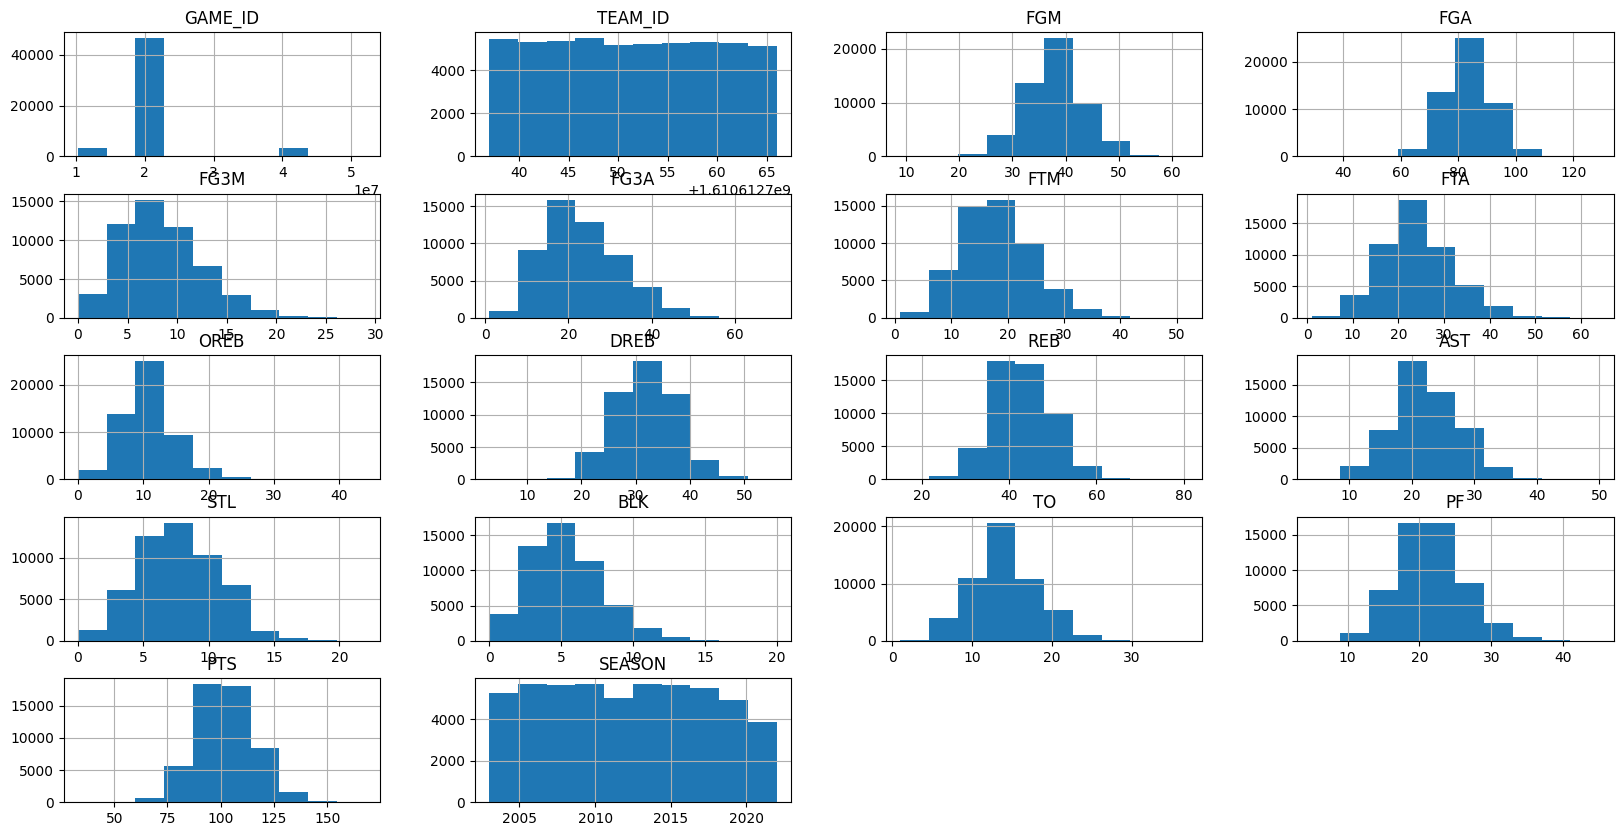

In [47]:
GDGT.hist(figsize=(20,10))
plt.show()

En la variable Seasson vemos que hubo un año que se jugó muy pocos partidos respecto al resto de los años. 
Buscando información sobre esta reducción de partidos, vemos que hubo un lockout que comenzó el 1 de julio de 2011 y acabó el 8 de diciembre de 2011. Retrasó el inicio de la temporada regular en la temporada 2011/2012 y obligó a la dirección de la NBA a contraer los partidos de 82 a 66 para adecuar el calendario\

Otros campos que no vamos a tener en cuenta son Game ID y Team ID que son identificadores\
El resto de campos cumplen una distribución normal

También hacemos histogramas junto a boxplots para tener una visualización más completa.

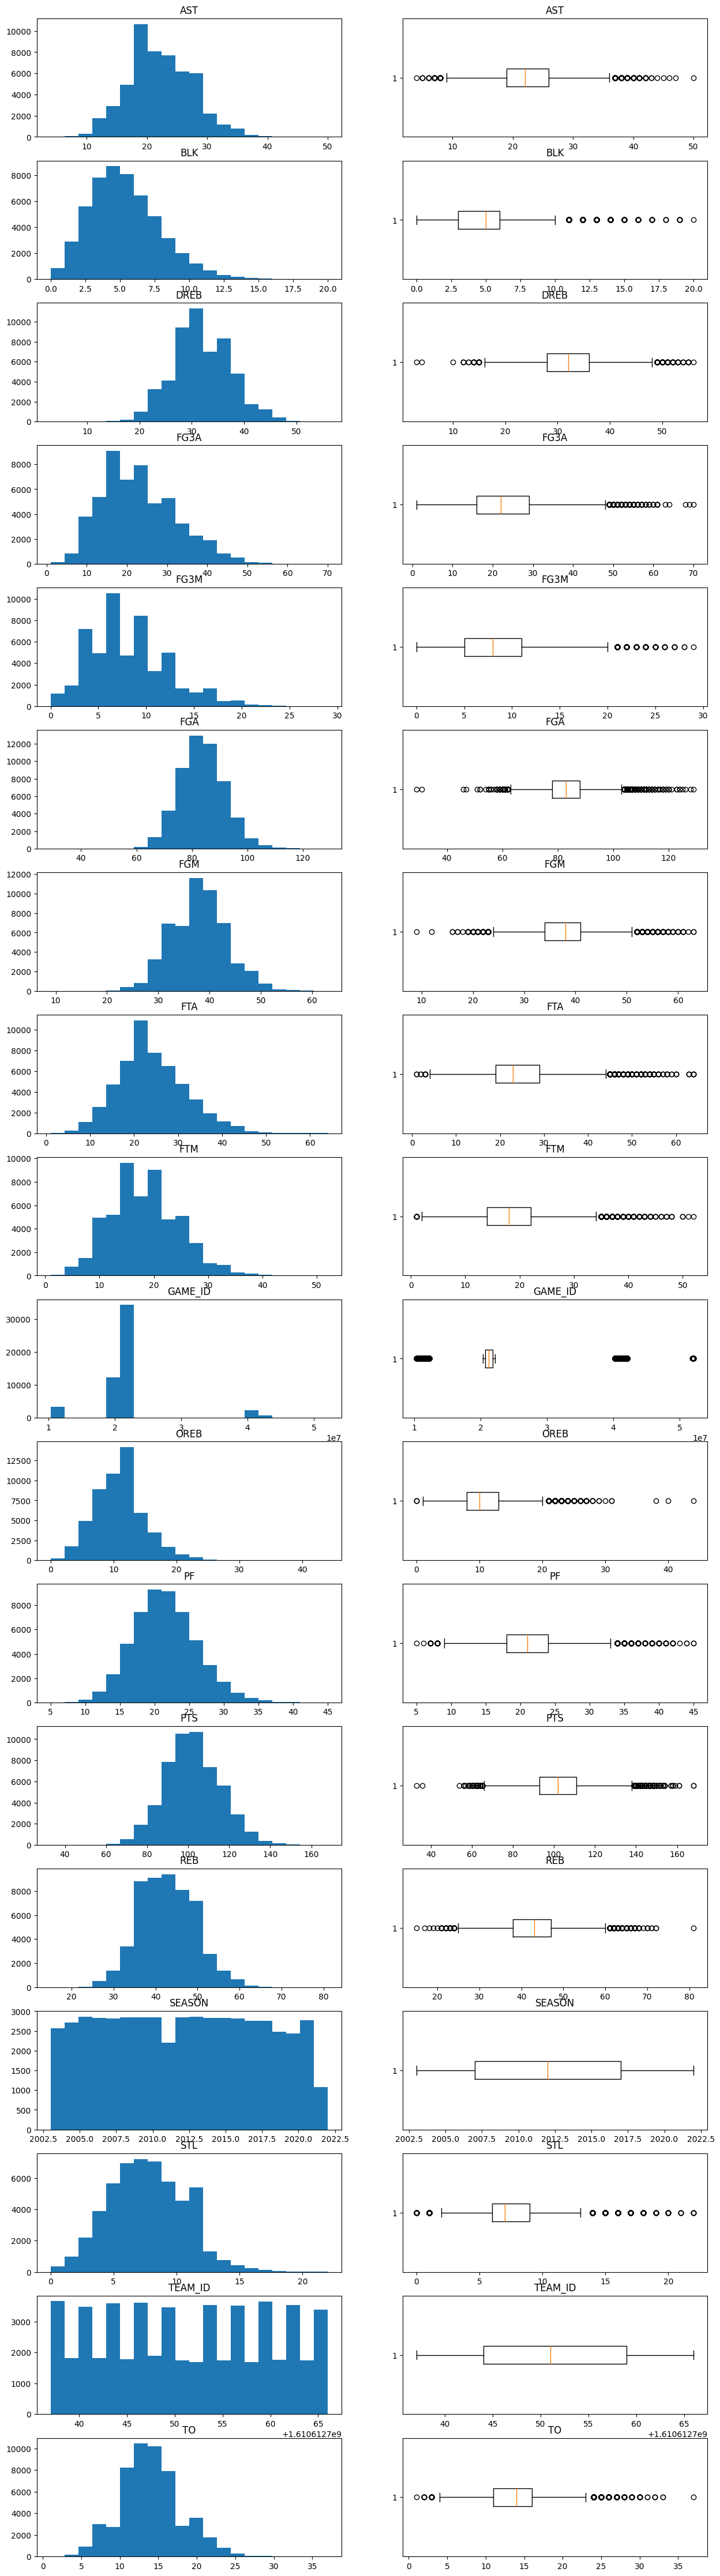

In [48]:
plt.figure(figsize=(15,70))
for i, var in enumerate(np.sort(GDGT.describe().columns)):
    plt.subplot(GDGT.columns.shape[0],2,2*i+1)
    plt.hist(GDGT[var], bins = 20)
    plt.xlabel('')
    plt.title(var)
    plt.subplot(GDGT.columns.shape[0],2,2*i+2)
    plt.boxplot(GDGT[var], vert=False)
    plt.xlabel('')
    plt.title(var)


### Variables categóricas

In [49]:
GDGT.describe(include='object')

NICKNAME           MIN VICTORY     HomeTeam
count      53042         53042   53042        53042
unique      3937         52927       2            2
top            0  555555555555      No  VisitorTeam
freq       49042            28   26521        26521

Las variables categóricas tienen dos unicos registros con las mismas cantidad de resultados cada uno
No tienen valores ausentes

In [50]:
GDGT

GAME_ID     TEAM_ID  \
0      10300001  1610612742   
1      10300001  1610612762   
2      10300002  1610612749   
3      10300002  1610612763   
4      10300003  1610612739   
...         ...         ...   
53037  52100131  1610612759   
53038  52100201  1610612737   
53039  52100201  1610612739   
53040  52100211  1610612740   
53041  52100211  1610612746   

                                                NICKNAME  \
0                                                      0   
1                                                      0   
2                                                      0   
3                                                      0   
4                                                      0   
...                                                  ...   
53037  DevinKeldonJakobJoshuaDejounteJoshZachTreLonni...   
53038  De'AndreDaniloClintKevinTraeBogdanDelonOnyekaT...   
53039  LauriEvanJarrettCarisDariusIsaacKevinRajonMose...   
53040  BrandonJaxsonJonasHerbertCJDevonte'LarryTreyNa...   
53041  NicolasMarcusIvicaTeranceReggieNormanIsaiahRob...   

                                                     MIN   FGM   FGA  FG3M  \
0                                            55555555555  34.0  76.0   2.0   
1                                    5555555555555555555  32.0  70.0   1.0   
2                                          5555555555555  32.0  75.0   2.0   
3                                        555555555555555  40.0  81.0   4.0   
4                                         55555555555555  38.0  77.0   4.0   
...                                                  ...   ...   ...   ...   
53037  36:5739:3731:1310:2633:5431:5116:4716:4916:305:56  37.0  91.0  13.0   
53038   28:1340:5013:2828:4740:1529:2720:3828:524:015:28  39.0  80.0   9.0   
53039           36:3137:2935:2939:5343:1821:5110:3014:58  37.0  81.0  13.0   
53040  42:3914:3325:0333:0442:223:3624:0623:519:4917:...  43.0  88.0   6.0   
53041        33:1243:1713:1836:4645:3023:435:3334:443:56  35.0  85.0   9.0   

       FG3A   FTM   FTA  OREB  DREB   REB   AST   STL  BLK    TO    PF    PTS  \
0       8.0  15.0  30.0  12.0  26.0  38.0  20.0   9.0  4.0  18.0  34.0   85.0   
1       7.0  25.0  34.0   9.0  32.0  41.0  23.0   8.0  4.0  18.0  26.0   90.0   
2      13.0  28.0  40.0  11.0  32.0  43.0  20.0   9.0  4.0  24.0  26.0   94.0   
3      15.0  21.0  34.0  14.0  34.0  48.0  25.0  18.0  7.0  25.0  35.0  105.0   
4       6.0  20.0  29.0  12.0  40.0  52.0  25.0  10.0  7.0  25.0  33.0  100.0   
...     ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   ...    ...   
53037  34.0  16.0  22.0   8.0  26.0  34.0  19.0   4.0  3.0   6.0  20.0  103.0   
53038  31.0  20.0  22.0  10.0  32.0  42.0  15.0   5.0  3.0  13.0  19.0  107.0   
53039  36.0  14.0  17.0   8.0  28.0  36.0  23.0   8.0  4.0  11.0  20.0  101.0   
53040  22.0  13.0  25.0  17.0  37.0  54.0  20.0   2.0  3.0   8.0  26.0  105.0   
53041  36.0  22.0  34.0  12.0  33.0  45.0  20.0   7.0  3.0   7.0  21.0  101.0   

      VICTORY  SEASON     HomeTeam  
0          No    2003  VisitorTeam  
1         Yes    2003     HomeTeam  
2          No    2003  VisitorTeam  
3         Yes    2003     HomeTeam  
4         Yes    2003  VisitorTeam  
...       ...     ...          ...  
53037      No    2021  VisitorTeam  
53038     Yes    2021  VisitorTeam  
53039      No    2021     HomeTeam  
53040     Yes    2021  VisitorTeam  
53041      No    2021     HomeTeam  

[53042 rows x 22 columns]

# 4.- Relación entre cada una de las variables predictoras y el target

En este apartado el objetivo es ver la relación de cada predictor con la variable objetivo. Como el target es una variable categórica, la vamos a convertir en numérica, utilizando la técnica de one-hot encoding que no es más que generar una dummy


In [51]:
GDGT = pd.get_dummies(GDGT, columns=['VICTORY'], drop_first=True)

Hacemos lo mismo con la otra variable categórica que tenemos, que es "HomeTeam".

In [52]:
GDGT=pd.get_dummies(GDGT, columns=['HomeTeam'],  drop_first=True)

In [53]:
GDGT.describe()

GAME_ID       TEAM_ID           FGM           FGA          FG3M  \
count  5.304200e+04  5.304200e+04  53042.000000  53042.000000  53042.000000   
mean   2.179746e+07  1.610613e+09     37.792919     83.161099      8.193337   
std    5.539557e+06  8.649905e+00      5.457137      8.046902      4.147241   
min    1.030000e+07  1.610613e+09      9.000000     29.000000      0.000000   
25%    2.070008e+07  1.610613e+09     34.000000     78.000000      5.000000   
50%    2.120080e+07  1.610613e+09     38.000000     83.000000      8.000000   
75%    2.180005e+07  1.610613e+09     41.000000     88.000000     11.000000   
max    5.210021e+07  1.610613e+09     63.000000    129.000000     29.000000   

              FG3A           FTM           FTA          OREB          DREB  \
count  53042.00000  53042.000000  53042.000000  53042.000000  53042.000000   
mean      23.01495     18.253780     24.056521     10.787979     31.949116   
std        9.33413      6.270778      7.773335      3.915015      5.559511   
min        1.00000      1.000000      1.000000      0.000000      3.000000   
25%       16.00000     14.000000     19.000000      8.000000     28.000000   
50%       22.00000     18.000000     23.000000     10.000000     32.000000   
75%       29.00000     22.000000     29.000000     13.000000     36.000000   
max       70.00000     52.000000     64.000000     44.000000     56.000000   

                REB           AST           STL           BLK            TO  \
count  53042.000000  53042.000000  53042.000000  53042.000000  53042.000000   
mean      42.737095     22.156480      7.597206      4.848328     13.904227   
std        6.610417      5.219662      2.928312      2.537874      3.989077   
min       15.000000      4.000000      0.000000      0.000000      1.000000   
25%       38.000000     19.000000      6.000000      3.000000     11.000000   
50%       43.000000     22.000000      7.000000      5.000000     14.000000   
75%       47.000000     26.000000      9.000000      6.000000     16.000000   
max       81.000000     50.000000     22.000000     20.000000     37.000000   

                 PF           PTS        SEASON  
count  53042.000000  53042.000000  53042.000000  
mean      21.058388    102.032861   2012.139889  
std        4.607958     13.436583      5.566293  
min        5.000000     33.000000   2003.000000  
25%       18.000000     93.000000   2007.000000  
50%       21.000000    102.000000   2012.000000  
75%       24.000000    111.000000   2017.000000  
max       45.000000    168.000000   2022.000000

In [54]:
GDGT.rename({'HomeTeam_VisitorTeam': 'VisitorTeam'}, axis=1,inplace=True)

## Variables numéricas

Visualicemos las variables numéricas, frente a la variable target (Victoria).\
Para esto vamos a utilizar visualizaciones de tipo boxplot para las victorias, es decir, 0 ó 1. Lo hacemos de golpe para todas las variables numéricas

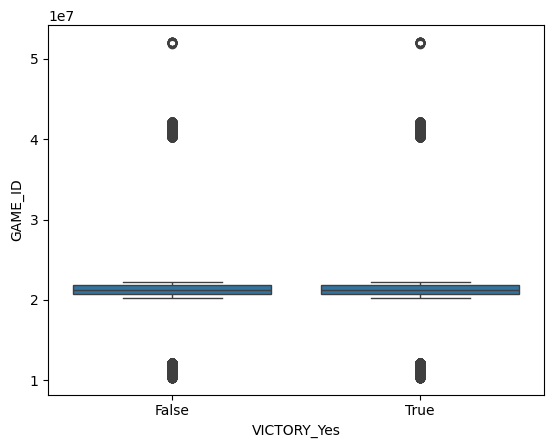

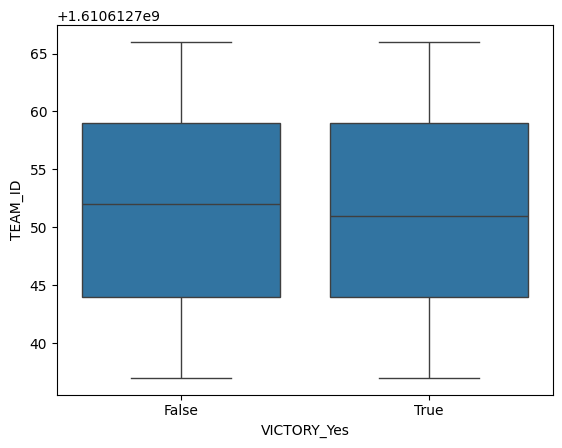

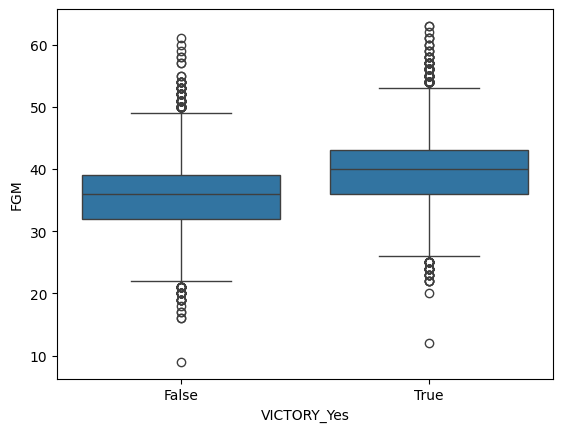

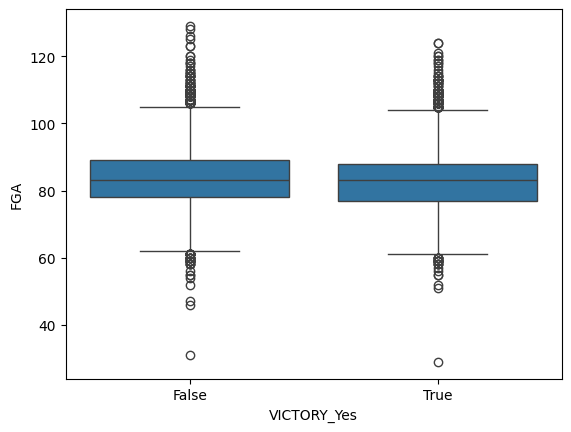

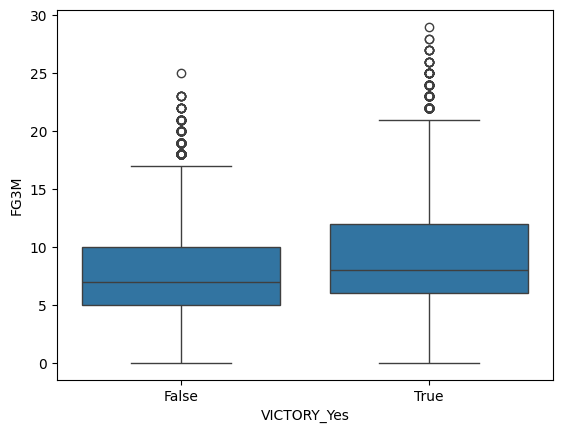

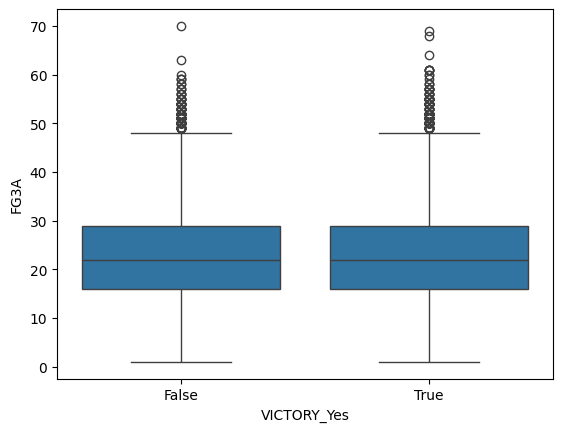

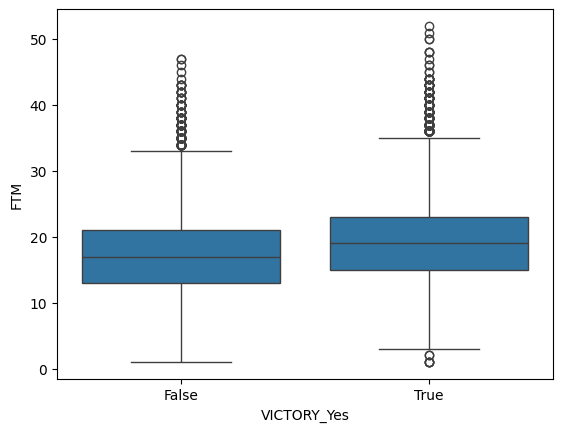

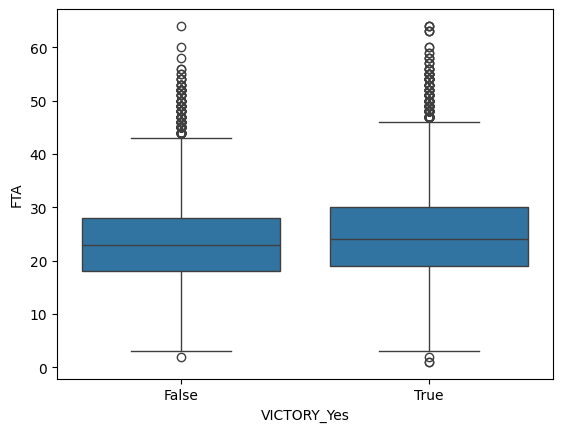

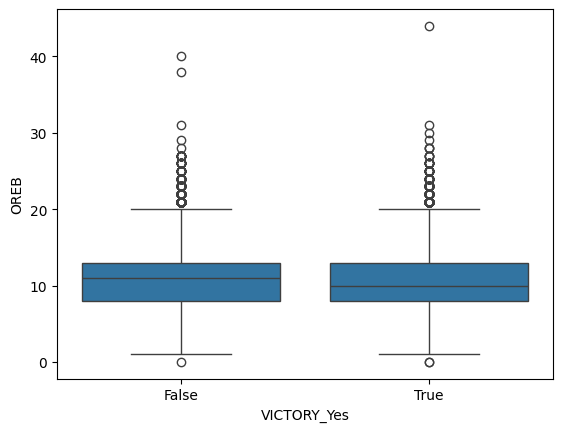

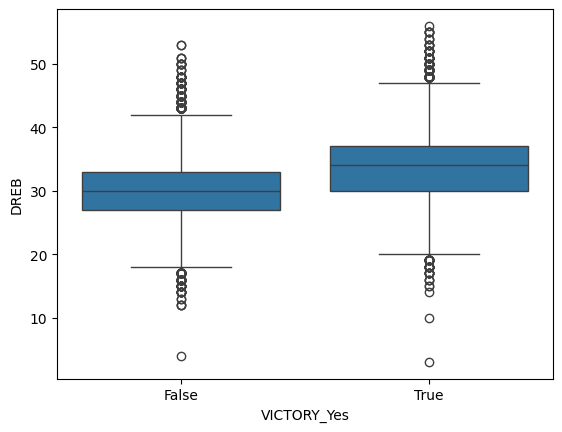

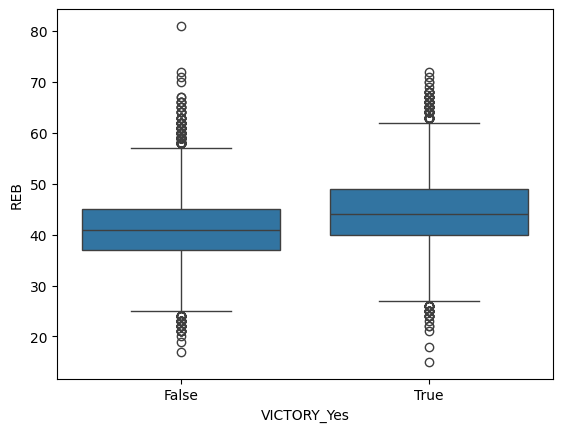

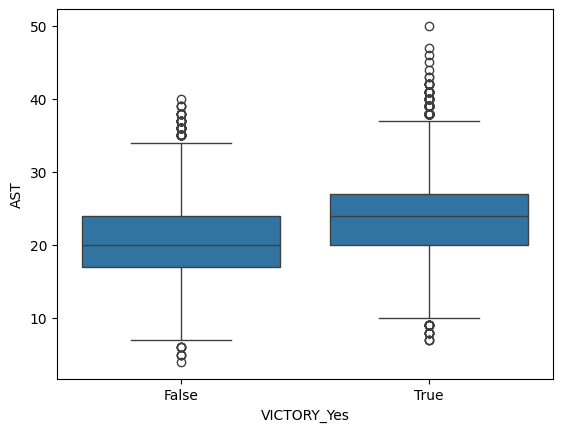

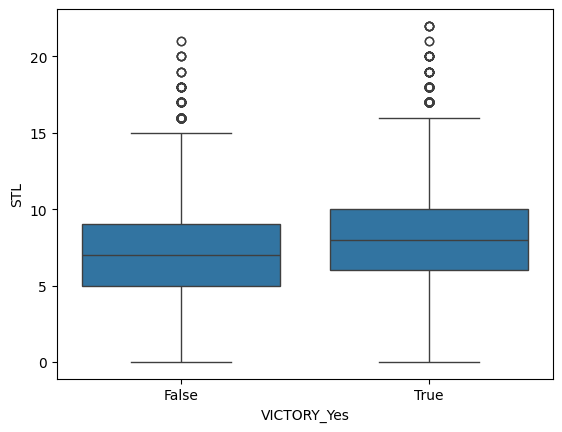

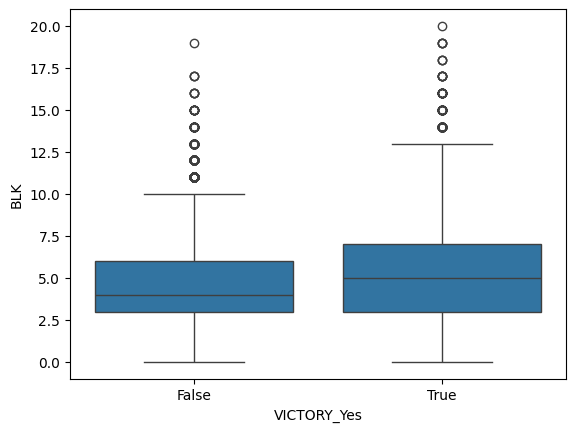

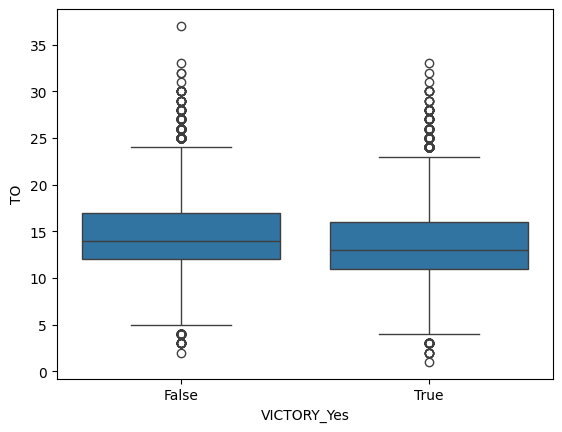

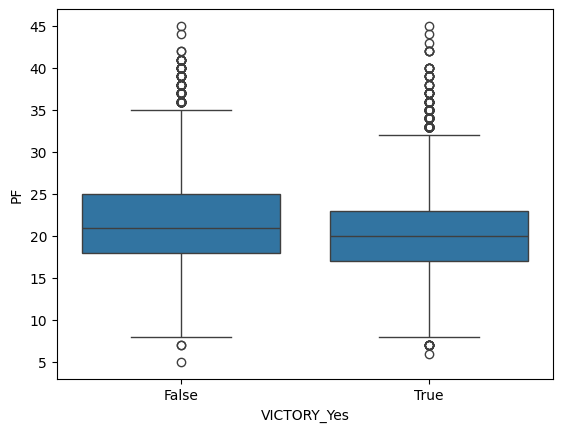

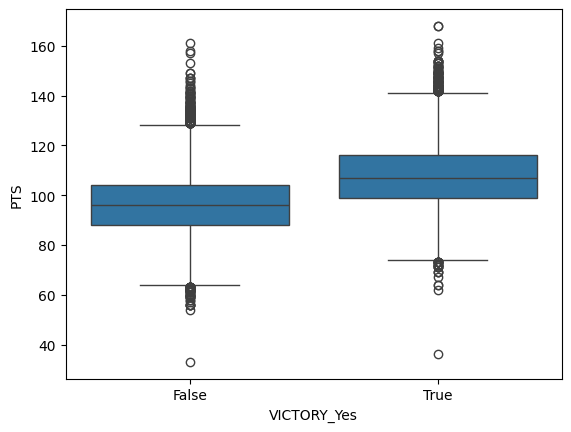

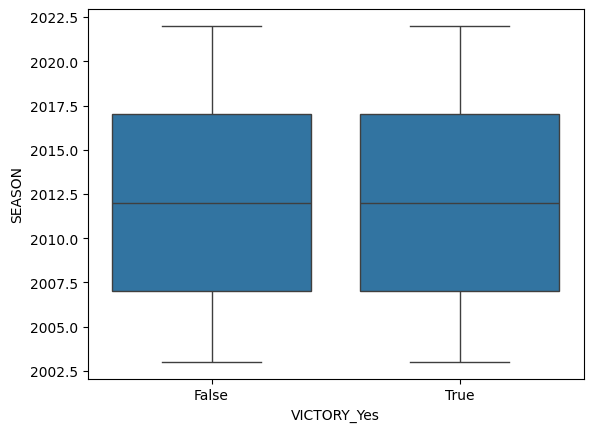

In [55]:
for i, var in enumerate(GDGT.describe().columns):
    sns.boxplot(data=GDGT, x = 'VICTORY_Yes', y = var)
    plt.show()

Tiene sentido la comparación de cada campo con el target\
Ej: Aquellos equipos que más puntos hacen acaban ganando más veces\
Aquellos equipos que más canastas realizadan más victorias consiguen
Aquellos equipos que más TO y más faltas hacen menos vistorias tienen\
Aquellos equipos que más tapones hacen acaban ganando más veces\
Aquellos equipos que más robos hacen acaban ganando más veces.\
A medida que aumenta los intentos de tiros de 3 se tiene más probabilidad de conseguir la victoria, aunque la diferencia no es muy grande. Mientras que FG3M tiene una tendencia ascendente en FGA la tendencia es descendente. Lo cual indica que la tendencia descendente son en los intentos de tiros de 2. Cuantos más intentos de tiros de 2 más probabilidad hay de perder el partido.
Llama la antencion los rebotes ofensivos cuantos más se hacen más equipos acaban perdiendo.

## Variables categóricas

En este caso lo que hacemos son diagramas de barras para la variable categórica que tenemos "HomeTeam_VisitorTeam"

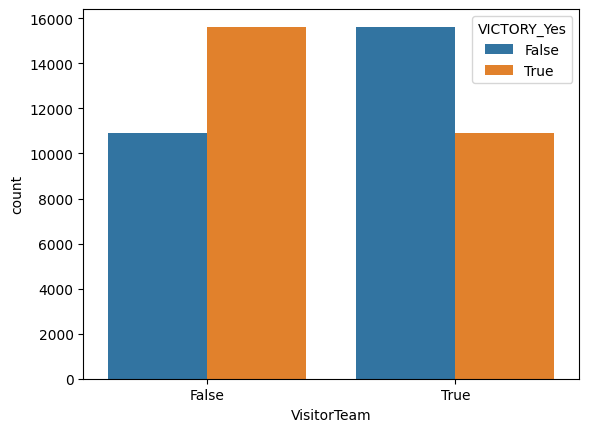

In [56]:
sns.countplot(data=GDGT, x='VisitorTeam', hue='VICTORY_Yes')
plt.show()

Se ve que los equipos que han jugado como local tienen más partidos ganados que los jugados como visitante

# 6. Matriz de correlaciones

Un aspecto importante es la correlación que pueda haber entre las variables, lo cual lo podemos visualizar de la siguiente manera (para los predictores):

En general tenemos correlaciones bajas y aquellas variables en las que hay correlaciones altas son variables que en sí esconden el mismo concepto, 

In [57]:
GDGT_corr=GDGT.drop(['NICKNAME', 'MIN'],axis=1)

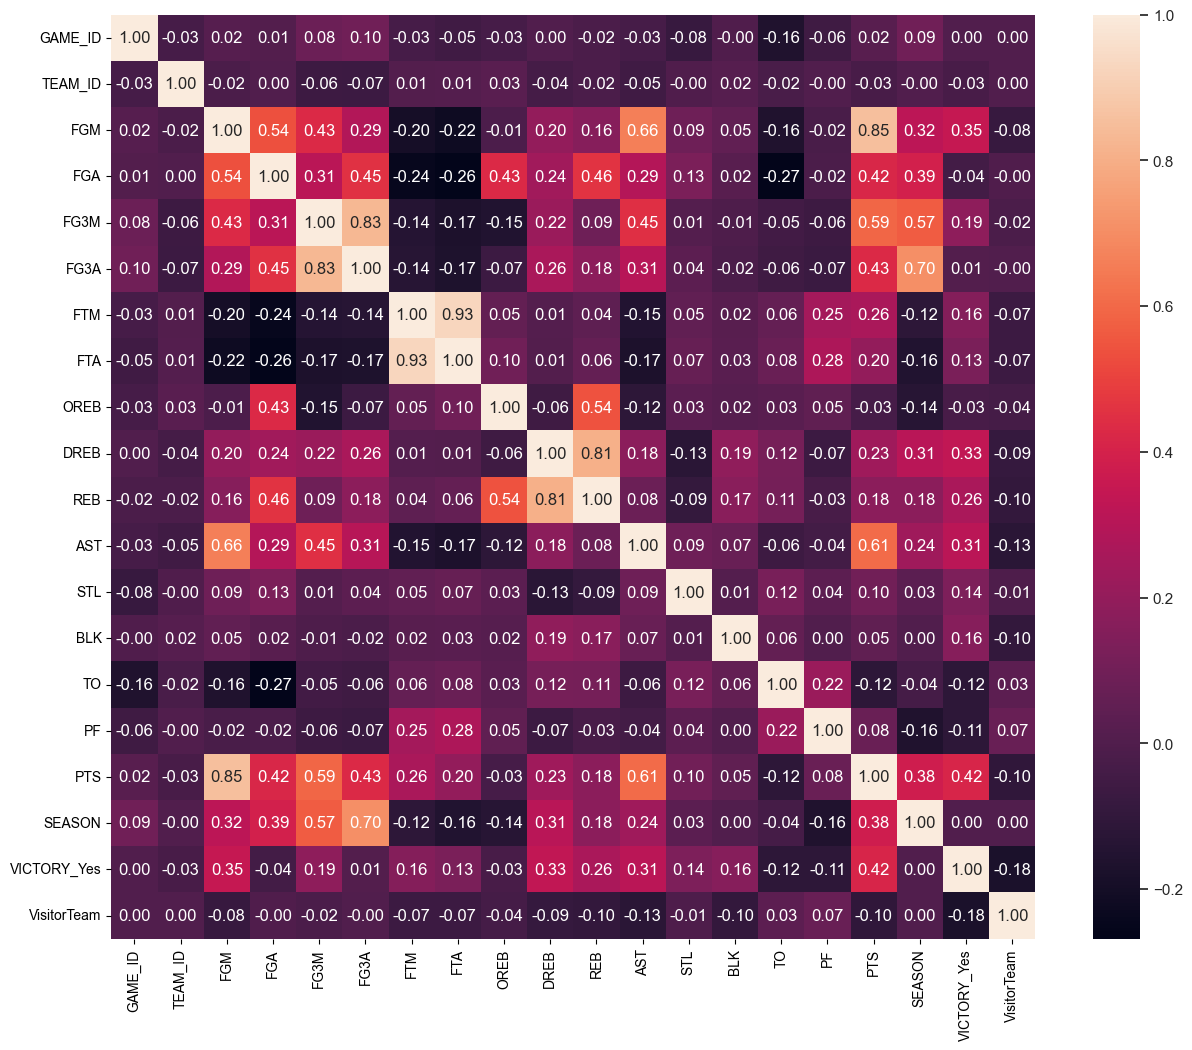

In [58]:
cm = GDGT_corr.corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.set(font_scale = 1)
hm = sns.heatmap(cm, cbar=True,annot=True, square=True, fmt='.2f')
plt.show()

# 7.- Creación de variables nuevas

Creamos unas variables nuevas, como transformaciones de las existentes así nuevas a partir de las primeras.

- Creación de ratios o variable combinada

Hacemos una tabla con los totales de los partidos para calcular las demás estadísticas

In [59]:
TG = GD.groupby(["GAME_ID"]).sum()
TG = TG.reset_index()
TG = TG.drop(['PLAYER_ID', 'FG_PCT','FG3_PCT','FT_PCT'],axis=1)

In [60]:
TG.head(10)

GAME_ID      TEAM_ID NICKNAME                             MIN   FGM  \
0  10300001  48318382640        0  555555555555555555555555555555  66.0   
1  10300002  45097157182        0    5555555555555555555555555555  72.0   
2  10300003  45097157056        0    5555555555555555555555555555  72.0   
3  10300004  41875931435        0      55555555555555555555555555  65.0   
4  10300005  40265318781        0       5555555555555555555555555  68.0   
5  10300007  40265318791        0       5555555555555555555555555  57.0   
6  10300008  37044093328        0         55555555555555555555555  64.0   
7  10300009  33822867786        0           555555555555555555555  67.0   
8  10300010  41875931708        0      55555555555555555555555555  68.0   
9  10300011  33822867497        0           555555555555555555555  60.0   

     FGA  FG3M  FG3A   FTM   FTA  OREB  DREB   REB   AST   STL   BLK    TO  \
0  146.0   3.0  15.0  40.0  64.0  21.0  58.0  79.0  43.0  17.0   8.0  36.0   
1  156.0   6.0  28.0  49.0  74.0  25.0  66.0  91.0  45.0  27.0  11.0  49.0   
2  164.0   8.0  15.0  44.0  69.0  24.0  65.0  89.0  44.0  25.0  10.0  38.0   
3  143.0   7.0  24.0  38.0  51.0  21.0  60.0  81.0  34.0  18.0  10.0  36.0   
4  134.0   7.0  19.0  37.0  56.0  22.0  44.0  66.0  31.0  26.0   5.0  44.0   
5  167.0   3.0  16.0  48.0  63.0  32.0  67.0  99.0  22.0  19.0   9.0  35.0   
6  155.0   6.0  28.0  44.0  58.0  22.0  60.0  82.0  38.0  18.0  10.0  31.0   
7  156.0   8.0  20.0  38.0  50.0  29.0  58.0  87.0  31.0  22.0  14.0  37.0   
8  153.0   8.0  26.0  44.0  58.0  27.0  53.0  80.0  44.0  19.0  12.0  35.0   
9  153.0   6.0  19.0  37.0  56.0  17.0  70.0  87.0  39.0  15.0  10.0  29.0   

     PF    PTS  
0  60.0  175.0  
1  61.0  199.0  
2  60.0  196.0  
3  54.0  175.0  
4  47.0  180.0  
5  60.0  165.0  
6  62.0  178.0  
7  41.0  180.0  
8  52.0  188.0  
9  52.0  163.0

A partir de aqui vamos a agregar estadísticas nuevas que se suelen calcular en cualquier partido de baloncesto para que nos ayuden a precisar la probabilidad que tiene un equipo de ganar a otro.

Calculamos el porcentaje de rebotes. \
Los rebotes totales de un equipo son de poco valor. Tomar un rebote ofensivo requiere diferentes habilidades que tomar uno defensivo, por lo que deben analizarse por separado.
Tomar en cuenta el número absoluto de rebotes conseguidos, o el promedio de rebotes por partido, nos puede llevar a errores, ya que los rebotes disponibles dependen de la efectividad: si un equipo erró poco, hay pocos rebotes por tomar. Ejemplo: el equipo A tomó en un juego 20 rebotes defensivos. Si  el equipo B erró 30 lanzamientos (o sea que hubo 30 rebotes en el aro defensivo de A) entonces A capturó 66% de los rebotes en su aro (20 de 30). Pero si B erró  25 tiros, A tomó 80% de los rebotes (20 de 25).

In [61]:
GDGT["FG_PCT"] = GDGT["FGM"]/GDGT["FGA"]*100
GDGT["FG3_PCT"] = GDGT["FG3M"]/GDGT["FG3A"]*100
GDGT["FT_PCT"] = GDGT["FTM"]/GDGT["FTA"]*100


In [62]:
GDGT = pd.merge(GDGT,TG[['OREB','DREB','FGA','FTA','TO','GAME_ID']],how="left",on="GAME_ID", suffixes=('','_Totales'))

In [63]:
GDGT

GAME_ID     TEAM_ID  \
0      10300001  1610612742   
1      10300001  1610612762   
2      10300002  1610612749   
3      10300002  1610612763   
4      10300003  1610612739   
...         ...         ...   
53037  52100131  1610612759   
53038  52100201  1610612737   
53039  52100201  1610612739   
53040  52100211  1610612740   
53041  52100211  1610612746   

                                                NICKNAME  \
0                                                      0   
1                                                      0   
2                                                      0   
3                                                      0   
4                                                      0   
...                                                  ...   
53037  DevinKeldonJakobJoshuaDejounteJoshZachTreLonni...   
53038  De'AndreDaniloClintKevinTraeBogdanDelonOnyekaT...   
53039  LauriEvanJarrettCarisDariusIsaacKevinRajonMose...   
53040  BrandonJaxsonJonasHerbertCJDevonte'LarryTreyNa...   
53041  NicolasMarcusIvicaTeranceReggieNormanIsaiahRob...   

                                                     MIN   FGM   FGA  FG3M  \
0                                            55555555555  34.0  76.0   2.0   
1                                    5555555555555555555  32.0  70.0   1.0   
2                                          5555555555555  32.0  75.0   2.0   
3                                        555555555555555  40.0  81.0   4.0   
4                                         55555555555555  38.0  77.0   4.0   
...                                                  ...   ...   ...   ...   
53037  36:5739:3731:1310:2633:5431:5116:4716:4916:305:56  37.0  91.0  13.0   
53038   28:1340:5013:2828:4740:1529:2720:3828:524:015:28  39.0  80.0   9.0   
53039           36:3137:2935:2939:5343:1821:5110:3014:58  37.0  81.0  13.0   
53040  42:3914:3325:0333:0442:223:3624:0623:519:4917:...  43.0  88.0   6.0   
53041        33:1243:1713:1836:4645:3023:435:3334:443:56  35.0  85.0   9.0   

       FG3A   FTM   FTA  OREB  DREB   REB   AST   STL  BLK    TO    PF    PTS  \
0       8.0  15.0  30.0  12.0  26.0  38.0  20.0   9.0  4.0  18.0  34.0   85.0   
1       7.0  25.0  34.0   9.0  32.0  41.0  23.0   8.0  4.0  18.0  26.0   90.0   
2      13.0  28.0  40.0  11.0  32.0  43.0  20.0   9.0  4.0  24.0  26.0   94.0   
3      15.0  21.0  34.0  14.0  34.0  48.0  25.0  18.0  7.0  25.0  35.0  105.0   
4       6.0  20.0  29.0  12.0  40.0  52.0  25.0  10.0  7.0  25.0  33.0  100.0   
...     ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   ...    ...   
53037  34.0  16.0  22.0   8.0  26.0  34.0  19.0   4.0  3.0   6.0  20.0  103.0   
53038  31.0  20.0  22.0  10.0  32.0  42.0  15.0   5.0  3.0  13.0  19.0  107.0   
53039  36.0  14.0  17.0   8.0  28.0  36.0  23.0   8.0  4.0  11.0  20.0  101.0   
53040  22.0  13.0  25.0  17.0  37.0  54.0  20.0   2.0  3.0   8.0  26.0  105.0   
53041  36.0  22.0  34.0  12.0  33.0  45.0  20.0   7.0  3.0   7.0  21.0  101.0   

       SEASON  VICTORY_Yes  VisitorTeam     FG_PCT    FG3_PCT     FT_PCT  \
0        2003        False         True  44.736842  25.000000  50.000000   
1        2003         True        False  45.714286  14.285714  73.529412   
2        2003        False         True  42.666667  15.384615  70.000000   
3        2003         True        False  49.382716  26.666667  61.764706   
4        2003         True         True  49.350649  66.666667  68.965517   
...       ...          ...          ...        ...        ...        ...   
53037    2021        False         True  40.659341  38.235294  72.727273   
53038    2021         True         True  48.750000  29.032258  90.909091   
53039    2021        False        False  45.679012  36.111111  82.352941   
53040    2021         True         True  48.863636  27.272727  52.000000   
53041    2021        False        False  41.176471  25.000000  64.705882   

       OREB_Totales  DREB_Totales  FGA_Totales  FTA_Totales  TO_Totales  
0              21

In [64]:
GDGT["DREB_PCT"] = GDGT["DREB"]/(GDGT["DREB"]+(GDGT["OREB_Totales"]-GDGT["OREB"]))*100

In [65]:
GDGT["OREB_PCT"] = GDGT["OREB"]/(GDGT["OREB"]+(GDGT["DREB_Totales"]-GDGT["DREB"]))*100

Porcentaje de tapones (BLK%):\
Volumen de tapones conseguidos sobre el total de lanzamientos.

In [66]:
GDGT["BLK%"] = GDGT["BLK"]/(GDGT["FGA_Totales"]-GDGT["FGA"])

In [67]:
GDGT.head(10)

GAME_ID     TEAM_ID NICKNAME                  MIN   FGM   FGA  FG3M  FG3A  \
0  10300001  1610612742        0          55555555555  34.0  76.0   2.0   8.0   
1  10300001  1610612762        0  5555555555555555555  32.0  70.0   1.0   7.0   
2  10300002  1610612749        0        5555555555555  32.0  75.0   2.0  13.0   
3  10300002  1610612763        0      555555555555555  40.0  81.0   4.0  15.0   
4  10300003  1610612739        0       55555555555555  38.0  77.0   4.0   6.0   
5  10300003  1610612765        0       55555555555555  34.0  87.0   4.0   9.0   
6  10300004  1610612742        0        5555555555555  40.0  82.0   1.0   6.0   
7  10300004  1610612753        0        5555555555555  25.0  61.0   6.0  18.0   
8  10300005  1610612745        0         555555555555  30.0  64.0   4.0  12.0   
9  10300005  1610612757        0        5555555555555  38.0  70.0   3.0   7.0   

    FTM   FTA  OREB  DREB   REB   AST   STL  BLK    TO    PF    PTS  SEASON  \
0  15.0  30.0  12.0  26.0  38.0  20.0   9.0  4.0  18.0  34.0   85.0    2003   
1  25.0  34.0   9.0  32.0  41.0  23.0   8.0  4.0  18.0  26.0   90.0    2003   
2  28.0  40.0  11.0  32.0  43.0  20.0   9.0  4.0  24.0  26.0   94.0    2003   
3  21.0  34.0  14.0  34.0  48.0  25.0  18.0  7.0  25.0  35.0  105.0    2003   
4  20.0  29.0  12.0  40.0  52.0  25.0  10.0  7.0  25.0  33.0  100.0    2003   
5  24.0  40.0  12.0  25.0  37.0  19.0  15.0  3.0  13.0  27.0   96.0    2003   
6  18.0  27.0  15.0  37.0  52.0  20.0   9.0  5.0  17.0  30.0   99.0    2003   
7  20.0  24.0   6.0  23.0  29.0  14.0   9.0  5.0  19.0  24.0   76.0    2003   
8  14.0  21.0  12.0  22.0  34.0  10.0   9.0  2.0  29.0  25.0   78.0    2003   
9  23.0  35.0  10.0  22.0  32.0  21.0  17.0  3.0  15.0  22.0  102.0    2003   

   VICTORY_Yes  VisitorTeam     FG_PCT    FG3_PCT     FT_PCT  OREB_Totales  \
0        False         True  44.736842  25.000000  50.000000          21.0   
1         True        False  45.714286  14.285714  73.529412          21.0   
2        False         True  42.666667  15.384615  70.000000          25.0   
3         True        False  49.382716  26.666667  61.764706          25.0   
4         True         True  49.350649  66.666667  68.965517          24.0   
5        False        False  39.080460  44.444444  60.000000          24.0   
6         True        False  48.780488  16.666667  66.666667          21.0   
7        False         True  40.983607  33.333333  83.333333          21.0   
8        False         True  46.875000  33.333333  66.666667          22.0   
9         True        False  54.285714  42.857143  65.714286          22.0   

   DREB_Totales  FGA_Totales  FTA_Totales  TO_Totales   DREB_PCT   OREB_PCT  \
0          58.0        146.0         64.0        36.0  74.285714  27.272727   
1          58.0        146.0         64.0        36.0  72.727273  25.714286   
2          66.0        156.0         74.0        49.0  69.565217  24.444444   
3          66.0        156.0         74.0        49.0  75.555556  30.434783   
4          65.0        164.0         69.0        38.0  76.923077  32.432432   
5          65.0        164.0         69.0        38.0  67.567568  23.076923   
6          60.0        143.0         51.0        36.0  86.046512  39.473684   
7          60.0        143.0         51.0        36.0  60.526316  13.953488   
8          44.0        134.0         56.0        44.0  68.750000  35.294118   
9          44.0        134.0         56.0        44.0  64.705882  31.250000   

       BLK%  
0  0.057143  
1  0.052632  
2  0.049383  
3  0.093333  
4  0.080460  
5  0.038961  
6  0.081967  
7  0.060976  
8  0.028571  
9  0.046875

Como los diferentes equipos, de acuerdo a su estilo, juegan a distintos ritmos, no podemos usar los promedios por partido para compararlos.
Para poder lograr las comparaciones hay definir el concepto de las posesiones, que es la base de estos cálculos. El básquet es un juego en el que ambos equipos se alternan la posesión de la pelota. El equipo que aproveche mejor sus posesiones será el equipo ganador.
Se entiende que una posesión termina con un tiro al aro, una pérdida de balón o un tiro libre. Allá el balón pasa al rival y la posesión se termina.
Qué ocurre si el equipo erra el lanzamiento de campo pero captura el rebote ofensivo? Hoy por hoy, la mayoría de los estadistas del baloncesto consideran que no se le debe anotar una nueva posesión al equipo, sino considerar que la misma posesión continúa.

Ritmo:\
Nos da una idea del ritmo de juego del equipo, expresado en cantidad de posesiones por juego que utiliza. Todos sabemos que hay equipos que corren más y equipos que prefieren el juego estacionado. Por eso las estadísticas por juego NO sirven para comparar equipos.\
La fórmula para calcularlo es:

Ritmo = puntos/posesiones*100

Las posesiones se calculan con la siguiente fórmula:

Pos = FGA - OR + TO + (FTA*0.4)\
Pos: posesiones\
FGA (field goal attempts): lanzamientos de campo (tanto de 2 y de 3)\
OR (ofensive rebounds): rebotes ofensivos\
TO (turnovers): pelotas perdidas\
FTA (free throw attempts): tiros libres lanzados\
Nota : está multiplicando el FTA por 0,4 para calcular mejor el número de intentos de tiros libres que terminan en posesión. Como se describió anteriormente , algunos tiros libres no terminan una posesión. . Según Dean Oliver , aproximadamente el 40 por ciento de todos los tiros libres finalizan en una posesión


In [68]:
GDGT["Possession"] = (GDGT["FGA"])-GDGT["OREB"]+GDGT["TO"]+(GDGT["FTA"]*0.4)

In [69]:
GDGT["EFF Possession"] = GDGT["PTS"]/(GDGT["Possession"])

Eficiencia ofensiva (eff of)\
Habitualmente se evalúa la ofensiva en puntos convertidos por juego, lo cual es una manera un tanto burda. Si pensamos el juego como una serie de posesiones, el equipo que más puntos convierta en sus posesiones, será el más efectivo. Se multiplica por 100 para expresar los puntos cada 100 posesiones, y no manejar números con decimales.

In [70]:
GDGT["EFF OF"] = (GDGT["PTS"]/GDGT["Possession"])*100

Eficiencia defensiva (DRtg)\
Para equipos, cantidad de puntos recibidos cada 100 posesiones. Para jugadores, cantidad de puntos que recibe un equipo cada 100 posesiones mientras ese jugador está en cancha.

Porcentaje de tiro efectivo (eFG%)\
Estadística que computa acierto en tiros de dos y tiros de tres, ajustando el hecho de que el tiro de tres otorga un punto extra.

In [71]:
GDGT["eFG%"] = (GDGT["FGM"]+0.5*GDGT["FG3M"])/GDGT["FGA"]

Porcentaje de tiro verdadero (TS%)\
Estadística que computa acierto en tiros de dos, tiros de de tres y tiros libres.

In [72]:
GDGT["TS%"] = GDGT["PTS"]/(2*(GDGT["FGA"]+0.44*GDGT["FTA"]))

Volumen de tiros de tres (3Par):\
Volumen de tiros de tres sobre el total de lanzamientos de campo intentados. Por ejemplo, si el dato es un 0.43 significa que el 43% de los tiros de campo de un equipo/jugador llegan desde el triple

In [73]:
GDGT["3Par"] = GDGT["FG3A"]/GDGT["FGA"]

Porcentaje asistencias (AST%):\
Para equipos, volumen de asistencias conseguidas sobre el total de canastas. 

In [74]:
GDGT["AST%"] = GDGT["AST"] / GDGT["FGM"]

Porcentaje de pérdidas (TOV%): Volumen de balones que se pierden cada 100 posesiones.

In [75]:
GDGT["TOV%"] = GDGT["TO"]/100

Porcentaje de recuperaciones (STL%):\
Volumen de recuperaciones sobre el total de posesiones del rival

In [76]:
GDGT["Possession_Rival"] = (GDGT["FGA_Totales"]-GDGT["FGA"])-(GDGT["OREB_Totales"]-GDGT["OREB"])+(GDGT["TO_Totales"]-GDGT["TO"])+((GDGT["FTA_Totales"]-GDGT["FTA"])*0.4)

In [77]:
GDGT["STL%"] = GDGT["TO"]/GDGT["Possession_Rival"]

In [78]:
GDGT=GDGT.drop(['OREB_Totales','DREB_Totales','FGA_Totales','TO_Totales','FTA_Totales','Possession_Rival'],axis=1)

Ratio de asistencias/pérdidas (AST/TO): ratio que computa el número de asistencias que se reparten por cada balón que se pierde.

In [79]:
GDGT["AST/TO"] = GDGT["AST"]/GDGT["TO"]

In [80]:
GDGT

GAME_ID     TEAM_ID  \
0      10300001  1610612742   
1      10300001  1610612762   
2      10300002  1610612749   
3      10300002  1610612763   
4      10300003  1610612739   
...         ...         ...   
53037  52100131  1610612759   
53038  52100201  1610612737   
53039  52100201  1610612739   
53040  52100211  1610612740   
53041  52100211  1610612746   

                                                NICKNAME  \
0                                                      0   
1                                                      0   
2                                                      0   
3                                                      0   
4                                                      0   
...                                                  ...   
53037  DevinKeldonJakobJoshuaDejounteJoshZachTreLonni...   
53038  De'AndreDaniloClintKevinTraeBogdanDelonOnyekaT...   
53039  LauriEvanJarrettCarisDariusIsaacKevinRajonMose...   
53040  BrandonJaxsonJonasHerbertCJDevonte'LarryTreyNa...   
53041  NicolasMarcusIvicaTeranceReggieNormanIsaiahRob...   

                                                     MIN   FGM   FGA  FG3M  \
0                                            55555555555  34.0  76.0   2.0   
1                                    5555555555555555555  32.0  70.0   1.0   
2                                          5555555555555  32.0  75.0   2.0   
3                                        555555555555555  40.0  81.0   4.0   
4                                         55555555555555  38.0  77.0   4.0   
...                                                  ...   ...   ...   ...   
53037  36:5739:3731:1310:2633:5431:5116:4716:4916:305:56  37.0  91.0  13.0   
53038   28:1340:5013:2828:4740:1529:2720:3828:524:015:28  39.0  80.0   9.0   
53039           36:3137:2935:2939:5343:1821:5110:3014:58  37.0  81.0  13.0   
53040  42:3914:3325:0333:0442:223:3624:0623:519:4917:...  43.0  88.0   6.0   
53041        33:1243:1713:1836:4645:3023:435:3334:443:56  35.0  85.0   9.0   

       FG3A   FTM   FTA  OREB  DREB   REB   AST   STL  BLK    TO    PF    PTS  \
0       8.0  15.0  30.0  12.0  26.0  38.0  20.0   9.0  4.0  18.0  34.0   85.0   
1       7.0  25.0  34.0   9.0  32.0  41.0  23.0   8.0  4.0  18.0  26.0   90.0   
2      13.0  28.0  40.0  11.0  32.0  43.0  20.0   9.0  4.0  24.0  26.0   94.0   
3      15.0  21.0  34.0  14.0  34.0  48.0  25.0  18.0  7.0  25.0  35.0  105.0   
4       6.0  20.0  29.0  12.0  40.0  52.0  25.0  10.0  7.0  25.0  33.0  100.0   
...     ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   ...    ...   
53037  34.0  16.0  22.0   8.0  26.0  34.0  19.0   4.0  3.0   6.0  20.0  103.0   
53038  31.0  20.0  22.0  10.0  32.0  42.0  15.0   5.0  3.0  13.0  19.0  107.0   
53039  36.0  14.0  17.0   8.0  28.0  36.0  23.0   8.0  4.0  11.0  20.0  101.0   
53040  22.0  13.0  25.0  17.0  37.0  54.0  20.0   2.0  3.0   8.0  26.0  105.0   
53041  36.0  22.0  34.0  12.0  33.0  45.0  20.0   7.0  3.0   7.0  21.0  101.0   

       SEASON  VICTORY_Yes  VisitorTeam     FG_PCT    FG3_PCT     FT_PCT  \
0        2003        False         True  44.736842  25.000000  50.000000   
1        2003         True        False  45.714286  14.285714  73.529412   
2        2003        False         True  42.666667  15.384615  70.000000   
3        2003         True        False  49.382716  26.666667  61.764706   
4        2003         True         True  49.350649  66.666667  68.965517   
...       ...          ...          ...        ...        ...        ...   
53037    2021        False         True  40.659341  38.235294  72.727273   
53038    2021         True         True  48.750000  29.032258  90.909091   
53039    2021        False        False  45.679012  36.111111  82.352941   
53040    2021         True         True  48.863636  27.272727  52.000000   
53041    2021        False        False  41.176471  25.000000  64.705882   

        DREB_PCT   OREB_PCT      BLK%  Possession  EFF Possession      EFF OF  \
0      74.

In [81]:
GDGT.describe()

GAME_ID       TEAM_ID           FGM           FGA          FG3M  \
count  5.304200e+04  5.304200e+04  53042.000000  53042.000000  53042.000000   
mean   2.179746e+07  1.610613e+09     37.792919     83.161099      8.193337   
std    5.539557e+06  8.649905e+00      5.457137      8.046902      4.147241   
min    1.030000e+07  1.610613e+09      9.000000     29.000000      0.000000   
25%    2.070008e+07  1.610613e+09     34.000000     78.000000      5.000000   
50%    2.120080e+07  1.610613e+09     38.000000     83.000000      8.000000   
75%    2.180005e+07  1.610613e+09     41.000000     88.000000     11.000000   
max    5.210021e+07  1.610613e+09     63.000000    129.000000     29.000000   

              FG3A           FTM           FTA          OREB          DREB  \
count  53042.00000  53042.000000  53042.000000  53042.000000  53042.000000   
mean      23.01495     18.253780     24.056521     10.787979     31.949116   
std        9.33413      6.270778      7.773335      3.915015      5.559511   
min        1.00000      1.000000      1.000000      0.000000      3.000000   
25%       16.00000     14.000000     19.000000      8.000000     28.000000   
50%       22.00000     18.000000     23.000000     10.000000     32.000000   
75%       29.00000     22.000000     29.000000     13.000000     36.000000   
max       70.00000     52.000000     64.000000     44.000000     56.000000   

                REB           AST           STL           BLK            TO  \
count  53042.000000  53042.000000  53042.000000  53042.000000  53042.000000   
mean      42.737095     22.156480      7.597206      4.848328     13.904227   
std        6.610417      5.219662      2.928312      2.537874      3.989077   
min       15.000000      4.000000      0.000000      0.000000      1.000000   
25%       38.000000     19.000000      6.000000      3.000000     11.000000   
50%       43.000000     22.000000      7.000000      5.000000     14.000000   
75%       47.000000     26.000000      9.000000      6.000000     16.000000   
max       81.000000     50.000000     22.000000     20.000000     37.000000   

                 PF           PTS        SEASON        FG_PCT       FG3_PCT  \
count  53042.000000  53042.000000  53042.000000  53042.000000  53042.000000   
mean      21.058388    102.032861   2012.139889     45.528609     35.298441   
std        4.607958     13.436583      5.566293      5.633949     11.039358   
min        5.000000     33.000000   2003.000000     24.358974      0.000000   
25%       18.000000     93.000000   2007.000000     41.666667     28.205128   
50%       21.000000    102.000000   2012.000000     45.454545     35.294118   
75%       24.000000    111.000000   2017.000000     49.367089     42.307692   
max       45.000000    168.000000   2022.000000     68.674699    100.000000   

             FT_PCT      DREB_PCT      OREB_PCT          BLK%    Possession  \
count  53042.000000  53042.000000  53042.000000  53042.000000  53042.000000   
mean      75.972576     74.909390     25.090610      0.058160     95.899955   
std       10.180738      7.820999      7.820999      0.029745      6.854755   
min       14.285714      6.976744      0.000000      0.000000     42.200000   
25%       69.565217     69.767442     19.565217      0.036585     91.200000   
50%       76.470588     75.000000     25.000000      0.054945     95.600000   
75%       83.333333     80.434783     30.232558      0.076087    100.200000   
max      100.000000    100.000000     93.023256      0.256410    144.000000   

       EFF Possession        EFF OF          eFG%           TS%          3Par  \
count    53042.000000  53042.000000  53042.000000  53042.000000  53042.000000   
mean         1.064045    106.404508      0.504249      0.544914      0.274391   
std          0.118766     11.876597      0.067354      0.062228      0.101885   
min          0.593561     59.356137      0.262195      0.316388      0.011905   
25%          0.983087     98.308668      0.457895      0

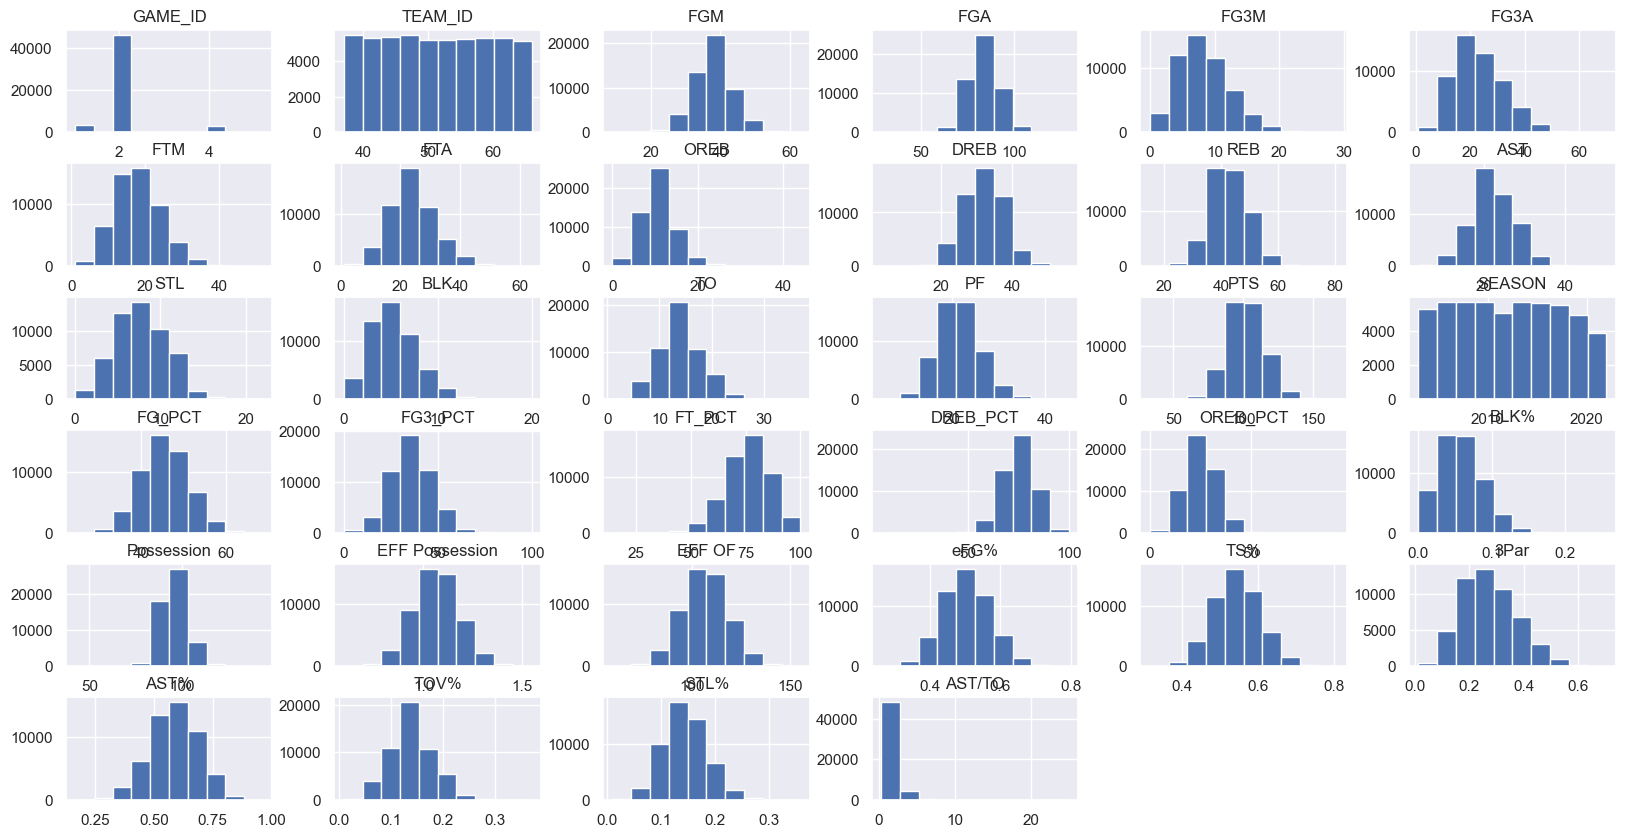

In [82]:
GDGT.hist(figsize=(20,10))
plt.show()

# 8.- Tratamiento de valores atípicos ***(outliers)***

El tratamiento de outliers tiene sentido en las variables continuas. Uno de los tratamientos ya lo hemos realizado de forma indirecta en el momento en que:

- Hemos creado variables categóricas de tal manera que cada categoría eran tramos de la variable numérica y los valores extremos formaban parte de una categoría.
- Cuando hemos creado variables numéricas con el valor medio de la variable objetivo en cada categoría de las variables mencionadas en el bullet point anterior.

Los outliers los hemos dejado en el modelo porque hemos pensado que por las características de nuestro proyecto no iban a impactar negativamente.

# 9- Normalización de los datos para que estén todos en la misma escala
La normalización se aplica a los algoritmos de aprendizaje automático que trabajan con datos numéricos, especialmente cuando estos datos tienen diferentes escalas. Algunos de los algoritmos que suelen requerir normalización, por eso vamos a normalizar los campos seleccionados

Para que funcionen mejor muchos algoritmos de Machine Learning usados en Data Science, hay que normalizar las variables de entrada al algoritmo. Normalizar significa, en este caso, comprimir o extender los valores de la variable para que estén en un rango definido. Sin embargo, una mala aplicación de la normalización, o una elección descuidada del método de normalización puede arruinar tus datos, y con ello tu análisis.

In [83]:
GDGT_norm=GDGT.drop(['SEASON','VICTORY_Yes','VisitorTeam','TEAM_ID','GAME_ID','NICKNAME','MIN'],axis=1)

In [84]:
GDGT_norm.var()

FGM                29.780348
FGA                64.752633
FG3M               17.199606
FG3A               87.125981
FTM                39.322654
FTA                60.424738
OREB               15.327343
DREB               30.908159
REB                43.697607
AST                27.244871
STL                 8.575014
BLK                 6.440806
TO                 15.912737
PF                 21.233276
PTS               180.541764
FG_PCT             31.741386
FG3_PCT           121.867423
FT_PCT            103.647428
DREB_PCT           61.168027
OREB_PCT           61.168027
BLK%                0.000885
Possession         46.987665
EFF Possession      0.014105
EFF OF            141.053557
eFG%                0.004537
TS%                 0.003872
3Par                0.010381
AST%                0.010827
TOV%                0.001591
STL%                0.001605
AST/TO              0.624522
dtype: float64

In [85]:
mad_serie = np.abs(GDGT_norm - GDGT_norm.mean()).mean()

In [86]:
mad_serie

FGM                4.342556
FGA                6.376492
FG3M               3.324400
FG3A               7.587070
FTM                5.000871
FTA                6.178369
OREB               3.109992
DREB               4.427802
REB                5.270859
AST                4.157185
STL                2.340118
BLK                2.005202
TO                 3.160799
PF                 3.629722
PTS               10.703330
FG_PCT             4.502195
FG3_PCT            8.627887
FT_PCT             8.051917
DREB_PCT           6.258346
OREB_PCT           6.258346
BLK%               0.023605
Possession         5.414896
EFF Possession     0.094847
EFF OF             9.484741
eFG%               0.053759
TS%                0.049675
3Par               0.082761
AST%               0.083201
TOV%               0.031608
STL%               0.031908
AST/TO             0.565075
dtype: float64

In [87]:
def minmax_norm(df_input):
    return (GDGT_norm - GDGT_norm.min()) / ( GDGT_norm.max() - GDGT_norm.min())

GDGT_minmax_norm = minmax_norm(GDGT_norm)

print(GDGT_minmax_norm)

            FGM   FGA      FG3M      FG3A       FTM       FTA      OREB  \
0      0.462963  0.47  0.068966  0.101449  0.274510  0.460317  0.272727   
1      0.425926  0.41  0.034483  0.086957  0.470588  0.523810  0.204545   
2      0.425926  0.46  0.068966  0.173913  0.529412  0.619048  0.250000   
3      0.574074  0.52  0.137931  0.202899  0.392157  0.523810  0.318182   
4      0.537037  0.48  0.137931  0.072464  0.372549  0.444444  0.272727   
...         ...   ...       ...       ...       ...       ...       ...   
53037  0.518519  0.62  0.448276  0.478261  0.294118  0.333333  0.181818   
53038  0.555556  0.51  0.310345  0.434783  0.372549  0.333333  0.227273   
53039  0.518519  0.52  0.448276  0.507246  0.254902  0.253968  0.181818   
53040  0.629630  0.59  0.206897  0.304348  0.235294  0.380952  0.386364   
53041  0.481481  0.56  0.310345  0.507246  0.411765  0.523810  0.272727   

           DREB       REB       AST       STL   BLK        TO     PF  \
0      0.433962  0.348485  

In [88]:
GDGT_minmax_norm.insert(0,'TEAM_ID',GDGT[['TEAM_ID']])
GDGT_minmax_norm.insert(1,'SEASON',GDGT[['SEASON']])
GDGT_minmax_norm.insert(2,'VICTORY_Yes',GDGT[['VICTORY_Yes']])
GDGT_minmax_norm.insert(3,'VisitorTeam',GDGT[['VisitorTeam']])
GDGT_minmax_norm.insert(3,'GAME_ID',GDGT[['GAME_ID']])

In [89]:
GDGT_minmax_norm.describe()

TEAM_ID        SEASON       GAME_ID           FGM           FGA  \
count  5.304200e+04  53042.000000  5.304200e+04  53042.000000  53042.000000   
mean   1.610613e+09   2012.139889  2.179746e+07      0.533202      0.541611   
std    8.649905e+00      5.566293  5.539557e+06      0.101058      0.080469   
min    1.610613e+09   2003.000000  1.030000e+07      0.000000      0.000000   
25%    1.610613e+09   2007.000000  2.070008e+07      0.462963      0.490000   
50%    1.610613e+09   2012.000000  2.120080e+07      0.537037      0.540000   
75%    1.610613e+09   2017.000000  2.180005e+07      0.592593      0.590000   
max    1.610613e+09   2022.000000  5.210021e+07      1.000000      1.000000   

               FG3M          FG3A           FTM           FTA          OREB  \
count  53042.000000  53042.000000  53042.000000  53042.000000  53042.000000   
mean       0.282529      0.319057      0.338309      0.365977      0.245181   
std        0.143008      0.135277      0.122956      0.123386      0.088978   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.172414      0.217391      0.254902      0.285714      0.181818   
50%        0.275862      0.304348      0.333333      0.349206      0.227273   
75%        0.379310      0.405797      0.411765      0.444444      0.295455   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

               DREB           REB           AST           STL           BLK  \
count  53042.000000  53042.000000  53042.000000  53042.000000  53042.000000   
mean       0.546210      0.420259      0.394706      0.345328      0.242416   
std        0.104896      0.100158      0.113471      0.133105      0.126894   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.471698      0.348485      0.326087      0.272727      0.150000   
50%        0.547170      0.424242      0.391304      0.318182      0.250000   
75%        0.622642      0.484848      0.478261      0.409091      0.300000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

                 TO            PF           PTS        FG_PCT       FG3_PCT  \
count  53042.000000  53042.000000  53042.000000  53042.000000  53042.000000   
mean       0.358451      0.401460      0.511355      0.477700      0.352984   
std        0.110808      0.115199      0.099530      0.127132      0.110394   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.277778      0.325000      0.444444      0.390554      0.282051   
50%        0.361111      0.400000      0.511111      0.476029      0.352941   
75%        0.416667      0.475000      0.577778      0.564317      0.423077   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

             FT_PCT      DREB_PCT      OREB_PCT          BLK%    Possession  \
count  53042.000000  53042.000000  53042.000000  53042.000000  53042.000000   
mean       0.719680      0.730276      0.269724      0.226825      0.527504   
std        0.118775      0.084076      0.084076      0.116005      0.067336   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.644928      0.675000      0.210326      0.142683      0.481336   
50%        0.725490      0.731250      0.268750      0.214286      0.524558   
75%        0.805556      0.789674      0.325000      0.296739      0.569745   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

       EFF Possession        EFF OF          eFG%           TS%          3Par  \
count    53042.000000  53042.000000  53042.000000  53042.000000  53042.000000   
mean         0.491293      0.491293      0.454147      0.464394      0.378646   
std          0.124019      0.124019      0.126371      0.126455      0.146973   
min          0.000000      0.000000      0.000000      0.000000      0.000000   
25%          0.406754      0.406754      0.3671

# 10. Reducción de dimensionalidad

Como su nombre lo indica, la reducción de la dimensionalidad es el proceso de reducir el número de variables aleatorias del conjunto de datos bajo consideración, mediante la obtención de un conjunto de variables principales.

¿Por qué es importante la reducción de la dimensionalidad?
Considera este escenario en que necesitas muchas variables de indicadores en el conjunto de datos para alcanzar un resultado más preciso del modelo de Machine Learning, luego tiende a agregar tantas características como sea posible al principio. Sin embargo, después de cierto punto, el rendimiento del modelo disminuirá con el creciente número de elementos. Este fenómeno se conoce como “la maldición de la dimensionalidad”.

La maldición de la dimensionalidad ocurre porque la densidad de la muestra disminuye exponencialmente con el aumento de la dimensionalidad. Cuando seguimos añadiendo características sin aumentar el número de muestras de entrenamiento, la dimensionalidad del espacio de características crece y se vuelve más y más dispersa. Debido a esta escasez, resulta mucho más fácil encontrar una solución perfecta para el modelo de Machine Learning, lo que muy probablemente conduce a un sobreajuste.

El sobreajuste ocurre cuando el modelo se corresponde demasiado con un conjunto particular de datos y no se generaliza bien. Un modelo sobredimensionado funcionaría demasiado bien en el conjunto de datos de formación para que falle en datos futuros y haga que la predicción sea poco fiable.


Antes de aplicar diferentes técnicas de reducción, vamos a quedarnos con las variables sobre las que lo aplicaremos. Van a ser todas numéricas (y sin valore ausentes). Hay que tener en cuenta que de aquellas variables categóricas creamos variables numéricas de tal manera que a cada categoría le aplicábamos el valor medio del target.

In [90]:
# veamos las variables numéricas

var_numericas = GDGT_minmax_norm.describe().columns
var_numericas

Index(['TEAM_ID', 'SEASON', 'GAME_ID', 'FGM', 'FGA', 'FG3M', 'FG3A', 'FTM',
       'FTA', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PF', 'PTS',
       'FG_PCT', 'FG3_PCT', 'FT_PCT', 'DREB_PCT', 'OREB_PCT', 'BLK%',
       'Possession', 'EFF Possession', 'EFF OF', 'eFG%', 'TS%', '3Par', 'AST%',
       'TOV%', 'STL%', 'AST/TO'],
      dtype='object')

In [91]:
# Quitamos las varaibles SEASSON,Team_ID y Game_ID
var_a_estudiar = ['TEAM_ID','GAME_ID','FGM', 'FGA', 'FG3M', 'FG3A', 'FTM', 'FTA', 'OREB', 'DREB', 'REB',
       'AST', 'STL', 'BLK', 'TO', 'PF', 'PTS', 'FG_PCT', 'FG3_PCT', 'FT_PCT', 'DREB_PCT', 'OREB_PCT',
       'BLK%', 'Possession', 'EFF Possession', 'EFF OF', 'eFG%', 'TS%', '3Par',
       'AST%', 'TOV%', 'STL%', 'AST/TO','VisitorTeam']

In [92]:
var_a_estudiar_con_Target = ['TEAM_ID','GAME_ID','FGM', 'FGA', 'FG3M', 'FG3A', 'FTM', 'FTA', 'OREB', 'DREB', 'REB',
       'AST', 'STL', 'BLK', 'TO', 'PF', 'PTS', 'FG_PCT', 'FG3_PCT', 'FT_PCT', 'DREB_PCT', 'OREB_PCT',
       'BLK%', 'Possession', 'EFF Possession', 'EFF OF', 'eFG%', 'TS%', '3Par',
       'AST%', 'TOV%', 'STL%', 'AST/TO','VisitorTeam','VICTORY_Yes']

## Selección de atributos: 

El objetivo de la selección de atributos es triple: mejorar la capacidad predictiva de nuestro modelo, proporcionando modelos predictivos más rápidos y eficientes, y proporcionar una mejor comprensión del proceso subyacente que generó los datos.
Otros beneficios adicionales que nos proporciona una buena selección de atributos antes de comenzar con el armado del modelo, son: 
Reduce el sobreentrenamiento: Menos datos redundantes significan menos oportunidades para tomar decisiones sobre la base de ruido.
Mejora la precisión: Menos datos engañosos se convierten en una mejora en la exactitud del modelo.
Reduce el tiempo de entrenamiento: Menos datos significa que los algoritmos aprenden más rápidamente.


### Selección estadística

De este modo se utilizan diferentes técnicas que relacionan cada variable con la variable objetivo. Para ello:

- Definimos una matriz con las variables predictoras -> X
- Otra matriz con el target -> y
- Aplicamos la función con diferentes métodos, para el 50% de las variables, y hacemos un ranking.

2.1	MÉTODOS DE SELECCIÓN DE CARACTERÍSTICAS

Existen diferentes métodos de selección de características. Primero, se les puede diferenciar entre aquellos que realizan un estudio de cada característica con independencia del resto de características del conjunto de datos, métodos univariantes, y los que sí que tienen en consideración las demás características o subconjunto de éstas, métodos multivariantes. Por otro lado, hay métodos que evalúan a cada una de las características, clasificándolas en un ranking, mientras que otros métodos evalúan subconjuntos de características.

La evaluación individual de características, clasificándolas en un ranking, puede conllevar la no eliminación de características redundantes, por tener estas una misma clasificación en el ranking. Mientras que, la evaluación de subconjuntos de características puede hacer frente a la redundancia, se encuentran con el problema de no poder hacer un estudio exhaustivo de todos los subconjuntos existentes, debido al alto coste computacional que conlleva localizarlos dentro del conjunto de datos.

De manera estructural, los métodos de selección de características se pueden clasificar en:

•	Métodos de filtro.
 
•	Métodos wrapper.
•	Métodos empotrados.
•	Métodos híbridos o combinación de métodos.


2.1.1	Métodos de filtro


Los métodos de filtro realizan una selección de características de manera independiente al algoritmo de aprendizaje que será utilizado y se realiza como un paso previo a la utilización del método de aprendizaje a utilizar. Estos métodos realizan una clasificación de las características mediante una función que evalúa cada una de éstas asignándolas un valor. Aquellas características que obtengan una mayor valoración serán más significativas. Posteriormente, las características se ordenan de mayor a menor y serán seleccionadas aquellas que tengan una mayor puntación para ser utilizadas en el método de aprendizaje.

Este tipo de métodos tiene un coste computacional muy bajo, respecto a los demás métodos, además de ser simples y rápidos de calcular. Se caracterizan por tener una gran capacidad de generalización. Encontramos métodos de filtro univariantes y multivariantes, siendo éstos últimos los que más recursos computacionales consumen. Los métodos de filtro son utilizados para la selección de características en aquellos conjuntos de datos que tienen un gran número de características.


2.1.2	Métodos wrapper


Este tipo de métodos se basan en la utilización de un algoritmo de aprendizaje que mide la eficacia de las características según el nivel de predicción que se obtiene en éste. Consisten en escoger un subconjunto de características y asignarles una valoración, que se obtienen en función de su capacidad de predicción en el algoritmo de aprendizaje. El resultado será el subconjunto de características que obtenga la mejor evaluación.

Este es un proceso que consume muchos recursos computacionales, principalmente debido a que el algoritmo es aplicado varias veces para cada uno de los subconjuntos. Este tipo de métodos son utilizados cuando los costes computacionales no suponen un problema.


2.1.3	Métodos empotrados


La selección de características en los métodos empotrados se realiza en el propio algoritmo de aprendizaje, dónde la búsqueda de las características más significativas es
 
guiada por el propio proceso, es decir, la selección de características no es un paso previo al modelo de aprendizaje.

Los métodos empotrados realizan la selección de características en el proceso de entrenamiento del algoritmo de aprendizaje y esta selección es propia y específica de cada algoritmo. Realizan una búsqueda de las características más significativas entre los distintos subconjuntos de características e hipótesis. De este modo, este tipo de métodos localiza dependencias con un menor coste computacional que los métodos wrapper.


2.1.4	Métodos híbridos


La combinación en la utilización de métodos de filtro y métodos wrapper nos da como resultado los métodos híbridos de selección de características. Este tipo de métodos busca obtener las ventajas de los métodos de filtro y wrapper. Por un lado, los métodos de filtro son rápidos y sencillos de calcular, pero no siempre se obtienen unos resultados que satisfagan el modelo. Por otra parte, los métodos wrapper ofrecen buenos resultados, pero su coste computacional y temporal es excesivo ante un gran volumen de características, debido a la complejidad que conlleva la selección de subconjuntos de características para su estudio.

Los métodos híbridos obtienen mejores resultados que los métodos de filtro, pero no llegan a ser tan rápidos como éstos. También tenemos que, los métodos híbridos tienen un menor coste computacional comparados con los métodos wrapper. Este tipo de métodos suele aplicar primero, al conjunto de características, un método de filtro y al conjunto seleccionado se le aplicará un método wrapper. Los métodos híbridos de selección de características ofrecen buenos resultados ante conjuntos de datos que disponen un gran volumen de características.


In [93]:
X = GDGT_minmax_norm[var_a_estudiar]
y = GDGT_minmax_norm.VICTORY_Yes
print(X.shape)
print(y.shape)

(53042, 34)
(53042,)


Ahora aplicamos para que se quede con el 50% de las variables que tienen mayor relación con la variable target

### Método f_classif

In [94]:
bestfeatures_met_f_classif = SelectPercentile(score_func=f_classif, percentile=50)

fit = bestfeatures_met_f_classif.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores_f_classif = pd.concat([dfcolumns,dfscores],axis=1)
featureScores_f_classif.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores_f_classif.nlargest(dfcolumns.shape[0],'Score'))  #print 10 best features

             Specs         Score
25          EFF OF  1.957948e+04
24  EFF Possession  1.957948e+04
27             TS%  1.524568e+04
17          FG_PCT  1.298674e+04
26            eFG%  1.291320e+04
16             PTS  1.104349e+04
2              FGM  7.419253e+03
9             DREB  6.599705e+03
11             AST  5.803372e+03
18         FG3_PCT  5.171865e+03
10             REB  3.914788e+03
32          AST/TO  3.345867e+03
4             FG3M  1.884167e+03
33     VisitorTeam  1.744832e+03
13             BLK  1.373256e+03
6              FTM  1.345639e+03
22            BLK%  1.332201e+03
12             STL  1.004458e+03
31            STL%  9.440942e+02
29            AST%  9.142884e+02
7              FTA  8.726389e+02
14              TO  7.171183e+02
30            TOV%  7.171183e+02
15              PF  7.084739e+02
21        OREB_PCT  6.620434e+02
20        DREB_PCT  6.620434e+02
19          FT_PCT  5.449117e+02
3              FGA  9.377578e+01
23      Possession  9.306463e+01
8         

c:\Users\aam05683h\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\aam05683h\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


Como podemos ver, tenemos el listado de las primeras variables que bajo el método f_classif tienen mayor relación con el target, de las cuales se repiten bastantes como por ejemplo es la de EFF Possession

### Método mutual_info_classif

In [95]:
bestfeatures_mutual_info_classif = SelectPercentile(score_func=mutual_info_classif, percentile=50)

fit = bestfeatures_mutual_info_classif.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores_mutual_info_classif = pd.concat([dfcolumns,dfscores],axis=1)
featureScores_mutual_info_classif.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores_mutual_info_classif.nlargest(dfcolumns.shape[0],'Score'))  #print 10 best features

             Specs     Score
24  EFF Possession  0.157488
25          EFF OF  0.156524
27             TS%  0.130127
26            eFG%  0.111658
17          FG_PCT  0.108471
16             PTS  0.097950
2              FGM  0.063341
9             DREB  0.055895
18         FG3_PCT  0.053810
11             AST  0.051954
29            AST%  0.050518
32          AST/TO  0.047259
21        OREB_PCT  0.040100
20        DREB_PCT  0.038957
10             REB  0.037671
33     VisitorTeam  0.019580
4             FG3M  0.017005
22            BLK%  0.012924
31            STL%  0.012015
19          FT_PCT  0.011866
7              FTA  0.011624
6              FTM  0.010684
30            TOV%  0.010070
13             BLK  0.009328
12             STL  0.008887
14              TO  0.004542
0          TEAM_ID  0.004516
15              PF  0.004022
5             FG3A  0.003058
23      Possession  0.002573
28            3Par  0.000000
1          GAME_ID  0.000000
8             OREB  0.000000
3             

En este caso la EFF OF y EFF Possession siguen siendo de las más importantes\
Ahora probamos con el método de chi2, pero en este caso las variables no pueden tomar valores negativos. Vemos que ninguna variable tiene valores negativos

### Método chi2

In [96]:
bestfeatures_chi2 = SelectPercentile(score_func=chi2, percentile=50)

fit = bestfeatures_chi2.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores_chi2 = pd.concat([dfcolumns,dfscores],axis=1)
featureScores_chi2.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores_chi2.nlargest(dfcolumns.shape[0],'Score'))  #print 10 best features

             Specs       Score
33     VisitorTeam  844.662305
24  EFF Possession  447.708448
25          EFF OF  447.708448
27             TS%  407.768398
26            eFG%  365.180961
17          FG_PCT  352.977219
16             PTS  177.076137
11             AST  170.643536
18         FG3_PCT  162.696961
4             FG3M  131.712588
2              FGM  124.669275
9             DREB  118.239526
13             BLK   88.915332
10             REB   87.024688
22            BLK%   77.102351
6              FTM   58.646830
32          AST/TO   54.318491
12             STL   50.576685
7              FTA   35.713805
31            STL%   32.029747
29            AST%   28.693037
14              TO   24.236893
30            TOV%   24.236893
15              PF   23.111305
21        OREB_PCT   17.136775
19          FT_PCT   10.573238
20        DREB_PCT    6.329389
8             OREB    1.512020
28            3Par    1.239684
3              FGA    1.119184
23      Possession    0.798534
5       

### Entrenamos un modelo para ver el orden de importancia de los atributos

In [97]:
# Extraer valores para sklearn y crear los conjuntos de entrenamiento y test:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [98]:
# Entrenar un random forest:
forest = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
forest.fit(X_train, y_train)
forest.score(X_test, y_test)

0.829070571231069

In [99]:
# Ordenar los atributos por importancia:
importances = forest.feature_importances_
imp_series = pd.Series(importances, index = X.columns).sort_values()[::-1]

In [100]:
# Imprimir la lista de los 30 atributos más informativos sobre la clase:
print(imp_series[:30])

EFF OF            0.099215
EFF Possession    0.088202
DREB              0.075210
TS%               0.057638
REB               0.056799
FG_PCT            0.044746
eFG%              0.040648
STL               0.038132
GAME_ID           0.031174
BLK%              0.030537
PTS               0.029783
Possession        0.028873
FG3_PCT           0.025531
AST/TO            0.023322
3Par              0.022728
FGA               0.022358
PF                0.021653
DREB_PCT          0.021470
FGM               0.021148
OREB_PCT          0.020439
FG3A              0.020419
AST%              0.020283
FT_PCT            0.018724
STL%              0.018404
AST               0.017664
FTA               0.016957
FTM               0.016650
BLK               0.014378
FG3M              0.013052
OREB              0.012910
dtype: float64


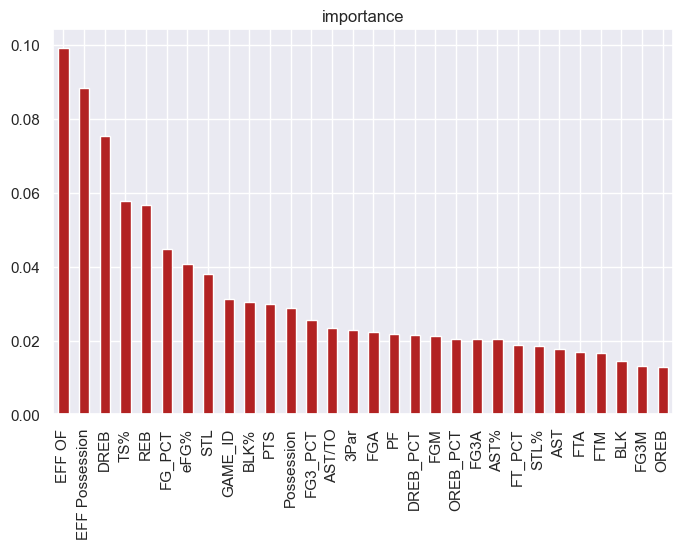

In [101]:
# Gráfica con los 30 atributos más importantes:
h = imp_series[:30].plot(kind = 'bar', figsize = (8, 5), title = "importance", color='firebrick')

A continuación, creamos una instancia de la clase RandomForestClassifier y definimos un rango de valores para el número de árboles en el bosque. Luego, usamos la función validation_curve para calcular la exactitud de entrenamiento y validación para cada valor en el rango y almacenamos los resultados en las matrices train_scores y test_scores:

### Los juntamos todos

Como hemos obtenido una priorización, ahora creamos una dataframe en el que tengamos las variables ordenadas por importancia según cada método

In [102]:
filter_chi = featureScores_chi2.sort_values(by='Score',ascending=False)['Specs'].values
filter_f_classif = featureScores_f_classif.sort_values(by='Score',ascending=False)['Specs'].values
filter_mutual_info_classiff = featureScores_mutual_info_classif.sort_values(by='Score',ascending=False)['Specs'].values
# wrapper_RF = featureScores_RF.sort_values(by='Score',ascending=True)['Specs'].values


In [103]:
ranking_todos = pd.DataFrame((filter_chi,filter_f_classif,filter_mutual_info_classiff)).T
ranking_todos.columns = ['filter_chi','filter_f_classif','filter_mutual_info_classiff']
ranking_todos

filter_chi filter_f_classif filter_mutual_info_classiff
0      VisitorTeam           EFF OF              EFF Possession
1   EFF Possession   EFF Possession                      EFF OF
2           EFF OF              TS%                         TS%
3              TS%           FG_PCT                        eFG%
4             eFG%             eFG%                      FG_PCT
5           FG_PCT              PTS                         PTS
6              PTS              FGM                         FGM
7              AST             DREB                        DREB
8          FG3_PCT              AST                     FG3_PCT
9             FG3M          FG3_PCT                         AST
10             FGM              REB                        AST%
11            DREB           AST/TO                      AST/TO
12             BLK             FG3M                    OREB_PCT
13             REB      VisitorTeam                    DREB_PCT
14            BLK%              BLK                         REB
15             FTM              FTM                 VisitorTeam
16          AST/TO             BLK%                        FG3M
17             STL              STL                        BLK%
18             FTA             STL%                        STL%
19            STL%             AST%                      FT_PCT
20            AST%              FTA                         FTA
21              TO               TO                         FTM
22            TOV%             TOV%                        TOV%
23              PF               PF                         BLK
24        OREB_PCT         OREB_PCT                         STL
25          FT_PCT         DREB_PCT                          TO
26        DREB_PCT           FT_PCT                     TEAM_ID
27            OREB              FGA                          PF
28            3Par       Possession                        FG3A
29             FGA             OREB                  Possession
30      Possession             3Par                        3Par
31            FG3A             FG3A                     GAME_ID
32         TEAM_ID          GAME_ID                        OREB
33         GAME_ID          TEAM_ID                         FGA

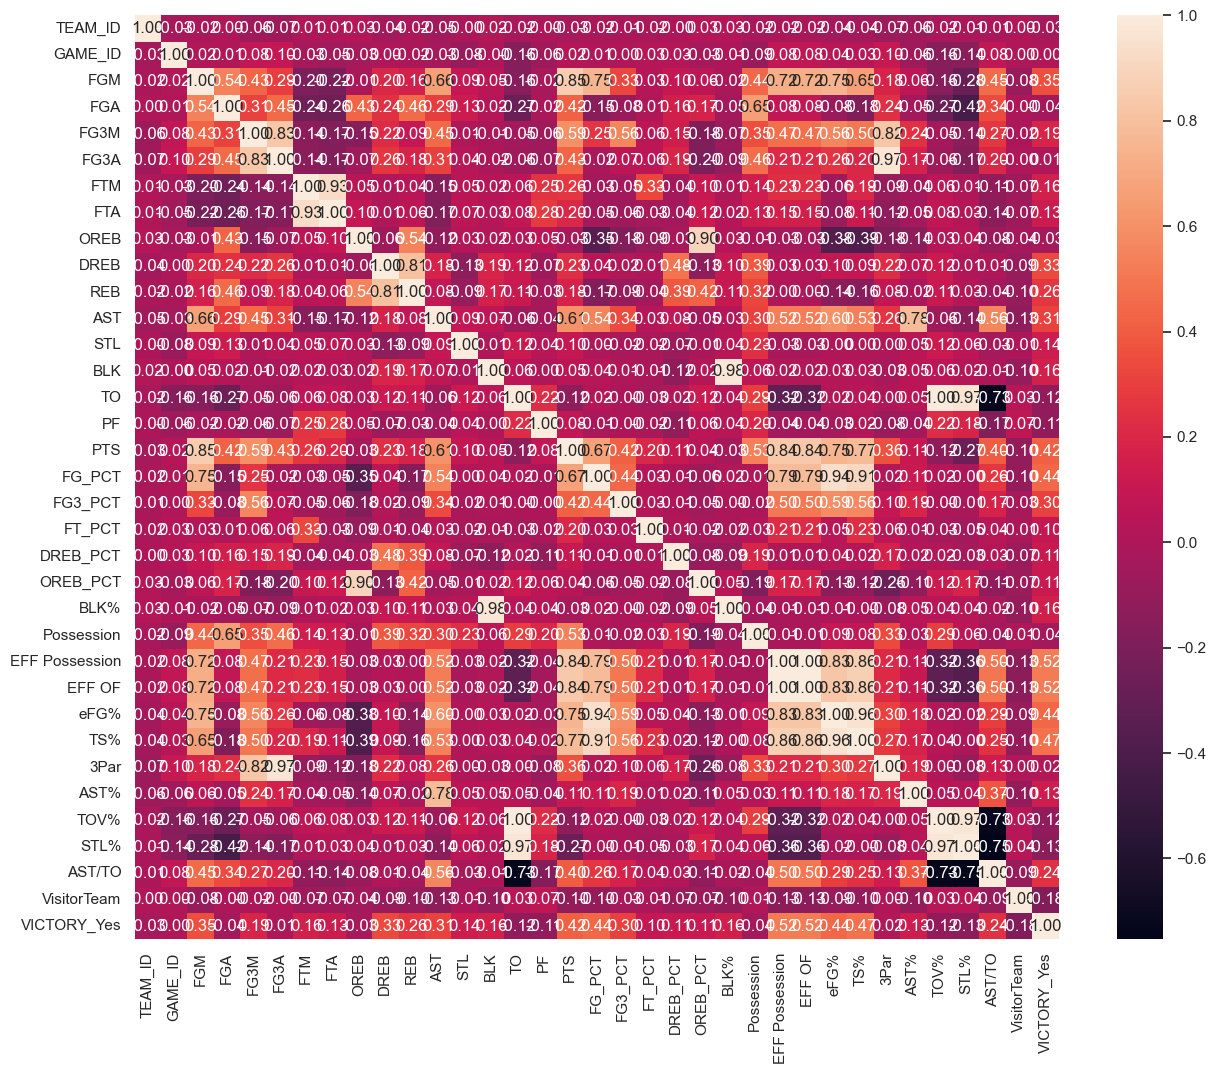

In [104]:
cm = GDGT_minmax_norm[var_a_estudiar_con_Target].corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.set(font_scale = 1)
hm = sns.heatmap(cm, cbar=True,annot=True, square=True, fmt='.2f')
plt.show()

Como el objetivo del estudio es predecir el porcentaje de victoria de cada equipo, el análisis de cada variable se hace también en relación a la variable target "Victoria". Analizando los datos de esta forma, se pueden empezar a extraer ideas sobre qué variables están más relacionadas con la variable Victoria y de qué forma.

Correlación variables numéricas
Algunos modelos (LM, GLM, ...) se ven perjudicados si incorporan predictores altamente correlacionados. Por esta razón, es conveniente estudiar el grado de correlación entre las variables disponibles.

In [105]:
# Matriz de correlación
# ==============================================================================
corr_matrix = GDGT_minmax_norm[var_a_estudiar_con_Target].corr(method='pearson')


In [106]:
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy.
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

tidy_corr_matrix(corr_matrix)


variable_1      variable_2             r         abs_r
1064            TOV%              TO  1.000000e+00  1.000000e+00
520               TO            TOV%  1.000000e+00  1.000000e+00
899           EFF OF  EFF Possession  1.000000e+00  1.000000e+00
865   EFF Possession          EFF OF  1.000000e+00  1.000000e+00
477              BLK            BLK%  9.778640e-01  9.778640e-01
...              ...             ...           ...           ...
446              STL            eFG% -1.463345e-04  1.463345e-04
69           GAME_ID     VICTORY_Yes  2.240134e-15  2.240134e-15
1191     VICTORY_Yes         GAME_ID  2.240134e-15  2.240134e-15
68           GAME_ID     VisitorTeam  1.396973e-15  1.396973e-15
1156     VisitorTeam         GAME_ID  1.396973e-15  1.396973e-15

[1190 rows x 4 columns]

### Elegimos variables

El criterio que vamos a adoptar es escoger una unica por concepto y que esté lo antes en la lista. 
Para ello vamos a ver cual es el número óptimo de variables.
Vamos a utilizar la validación cruzada para evaluar su rendimiento con diferentes números de variables predictoras

In [107]:
# Calcular media y desviación estándar de los puntajes de entrenamiento y validación
# train_mean = np.mean(train_scores, axis=1)
# train_std = np.std(train_scores, axis=1)
# test_mean = np.mean(test_scores, axis=1)
# test_std = np.std(test_scores, axis=1)

In [108]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir diferentes números de variables predictoras
num_predictors = [2, 5, 10, 15, 20, 25, 30]

In [109]:
# Loop a través de diferentes números de variables predictoras
for n in num_predictors:
    # Crear un modelo de Random Forest con n variables predictoras
    model = RandomForestClassifier(n_estimators=100, max_features=n, random_state=42)
    
    # Realizar validación cruzada con 5-fold
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
    
    # Calcular la media de las puntuaciones de validación cruzada
    mean_cv_score = cv_scores.mean()
    
    # Ajustar el modelo en el conjunto de entrenamiento completo
    model.fit(X_train, y_train)
    
    # Evaluar el modelo en el conjunto de prueba
    test_score = model.score(X_test, y_test)
    
    # Imprimir los resultados
    print(f"Número de variables predictoras: {n}")
    print(f"Puntuación media de validación cruzada: {mean_cv_score:.3f}")
    print(f"Puntuación de prueba: {test_score:.3f}")
    print("=" * 50)

Número de variables predictoras: 2
Puntuación media de validación cruzada: 0.816
Puntuación de prueba: 0.817
Número de variables predictoras: 5
Puntuación media de validación cruzada: 0.826
Puntuación de prueba: 0.828
Número de variables predictoras: 10
Puntuación media de validación cruzada: 0.834
Puntuación de prueba: 0.834
Número de variables predictoras: 15
Puntuación media de validación cruzada: 0.835
Puntuación de prueba: 0.838
Número de variables predictoras: 20
Puntuación media de validación cruzada: 0.834
Puntuación de prueba: 0.838
Número de variables predictoras: 25
Puntuación media de validación cruzada: 0.834
Puntuación de prueba: 0.837
Número de variables predictoras: 30
Puntuación media de validación cruzada: 0.833
Puntuación de prueba: 0.835


### Graficar curva de validación

Graficamos la curva de validación para los diferentes números de variables predictoras:\
La curva de validación mostrará la relación entre el número de variables predictoras y la exactitud del modelo. Se debe buscar el punto en la curva donde la exactitud de validación es máxima, que indica el número óptimo de variables predictoras a utilizar en el modelo.

In [110]:
model = RandomForestClassifier(n_estimators=100)

In [111]:
num_variables = range(1, len(X.columns) + 1)

In [112]:
train_scores, val_scores = validation_curve(model, X_train, y_train, 
                                            param_name='max_features', 
                                            param_range=num_variables, cv=5)

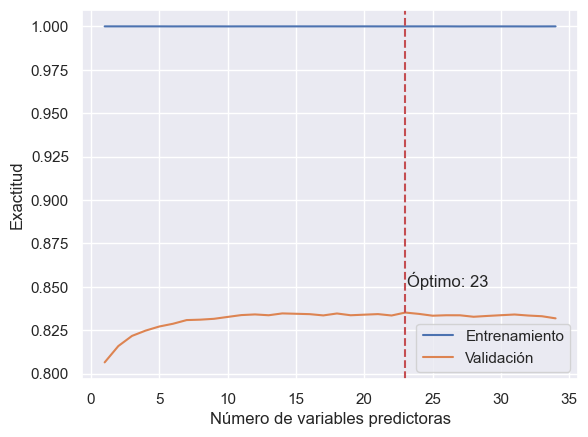

In [113]:
train_mean = np.mean(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)

plt.plot(num_variables, train_mean, label='Entrenamiento')
plt.plot(num_variables, val_mean, label='Validación')
plt.xlabel('Número de variables predictoras')
plt.ylabel('Exactitud')
plt.legend(loc='best')

best_num_variables = num_variables[np.argmax(val_mean)]
plt.axvline(x=best_num_variables, color='r', linestyle='--')
plt.text(best_num_variables+0.1, 0.85, 'Óptimo: %d' % best_num_variables)

plt.show()

Tenemos las variables que más score nos están dando el los diferentes métodos. Vamos a seleccionarlas y para que no hay overfitting vamos a ir quitando las variables que más correlación tenga con estas.

La colinealidad en los datos de entrada se refiere a la alta correlación entre dos o más variables. Esta alta correlación puede tener un impacto negativo en algunos modelos de aprendizaje automático, ya que puede llevar a una disminución en la estabilidad de las estimaciones y una disminución en la capacidad del modelo para generalizar a datos no vistos.

A continuación se presentan algunos modelos de aprendizaje automático que pueden verse afectados por la colinealidad:

Regresión lineal: La regresión lineal es un modelo que intenta ajustar una línea recta a los datos de entrada. Si las variables de entrada están altamente correlacionadas, la regresión lineal puede tener dificultades para estimar los coeficientes adecuados para cada variable.

Análisis de componentes principales (PCA): El PCA es una técnica de reducción de la dimensionalidad que se utiliza para identificar patrones en los datos de entrada. Si las variables de entrada están altamente correlacionadas, el PCA puede tener dificultades para identificar patrones en los datos.

Naive Bayes: El algoritmo Naive Bayes es un clasificador que asume que todas las variables de entrada son independientes entre sí. Si las variables de entrada están altamente correlacionadas, este supuesto puede no ser válido y puede disminuir la precisión del modelo.

Redes neuronales: Las redes neuronales son un modelo de aprendizaje profundo que utilizan múltiples capas para aprender patrones en los datos de entrada. Si las variables de entrada están altamente correlacionadas, las capas pueden tener dificultades para aprender patrones precisos y puede disminuir la precisión del modelo.

EFF Possession: Sale en varios metodos como una de las mejores. Tiene un 0.52 de correlación con el target, que es de las más altas. Por lo que vamos a quitarnos las variables que tengan mucha correlación con está variable. Por ejemplo, EFF OF tiene un 1 de correlación, por lo que entendemos que aporta la misma información. PTS tiene un 0.83 y tiene un 0.42 con el target. La quitamos. 
Otras que tiene mucha correlación con EFF Possession sería eFG%, TS%, FG_PCT y FG3_PCT. Tiene un 0.86

AST: Tiene una correlacción alta con AST%. Por lo que aporta la misma información. La quitamos tambien.

DREB: Está tambien de las más altas. Quitamos las que están correlacionadas con esta y aportan la misma información. Por ejemplo REB.

FGM: Tiene correlación con algunas que ya hemos quitado anteriormente.

FG3M: Tiene correlación con FG3A y 3Par. Que además tienen muy poco correlación con el target.

FTM: tiene correlación con FTA. Así que quitamos esta última.

AST/TO:

BLK: quitamos BLK% que está bastante correlacionada y tienen la misma correlación con el target.

OREB_PCT: Quitamos OREB por estar bastante correlacionada.

In [114]:
# Quitamos las varaibles comentadas arriba.
var_a_estudiar = ['TEAM_ID','GAME_ID','EFF Possession','DREB','BLK','AST','FG3_PCT','AST/TO', 'STL','FG3M', 'FTM','PF','FT_PCT','VisitorTeam']
varConTarget = ['TEAM_ID','GAME_ID','EFF Possession','DREB','BLK','AST','FG3_PCT','AST/TO', 'STL','FG3M', 'FTM','PF','FT_PCT','VisitorTeam','VICTORY_Yes']

In [115]:
GDGT_minmax_norm[var_a_estudiar]

TEAM_ID   GAME_ID  EFF Possession      DREB   BLK       AST  \
0      1610612742  10300001        0.324436  0.433962  0.20  0.347826   
1      1610612762  10300001        0.395096  0.547170  0.20  0.413043   
2      1610612749  10300002        0.324009  0.547170  0.20  0.347826   
3      1610612763  10300002        0.418482  0.584906  0.35  0.456522   
4      1610612739  10300003        0.407971  0.698113  0.35  0.456522   
...           ...       ...             ...       ...   ...       ...   
53037  1610612759  52100131        0.479937  0.433962  0.15  0.326087   
53038  1610612737  52100201        0.597316  0.547170  0.15  0.239130   
53039  1610612739  52100201        0.541719  0.471698  0.20  0.413043   
53040  1610612740  52100211        0.612142  0.641509  0.15  0.347826   
53041  1610612746  52100211        0.506972  0.566038  0.15  0.347826   

        FG3_PCT    AST/TO       STL      FG3M       FTM     PF    FT_PCT  \
0      0.250000  0.033069  0.409091  0.068966  0.274510  0.725  0.416667   
1      0.142857  0.039815  0.363636  0.034483  0.470588  0.525  0.691176   
2      0.153846  0.021825  0.409091  0.068966  0.529412  0.525  0.650000   
3      0.266667  0.028571  0.818182  0.137931  0.392157  0.750  0.553922   
4      0.666667  0.028571  0.454545  0.137931  0.372549  0.700  0.637931   
...         ...       ...       ...       ...       ...    ...       ...   
53037  0.382353  0.116270  0.181818  0.448276  0.294118  0.375  0.681818   
53038  0.290323  0.034799  0.227273  0.310345  0.372549  0.350  0.893939   
53039  0.361111  0.072727  0.363636  0.448276  0.254902  0.375  0.794118   
53040  0.272727  0.089286  0.090909  0.206897  0.235294  0.525  0.440000   
53041  0.250000  0.103741  0.318182  0.310345  0.411765  0.400  0.588235   

       VisitorTeam  
0             True  
1            False  
2             True  
3            False  
4             True  
...            ...  
53037         True  
53038         True  
53039        False  
53040         True  
53041        False  

[53042 rows x 14 columns]

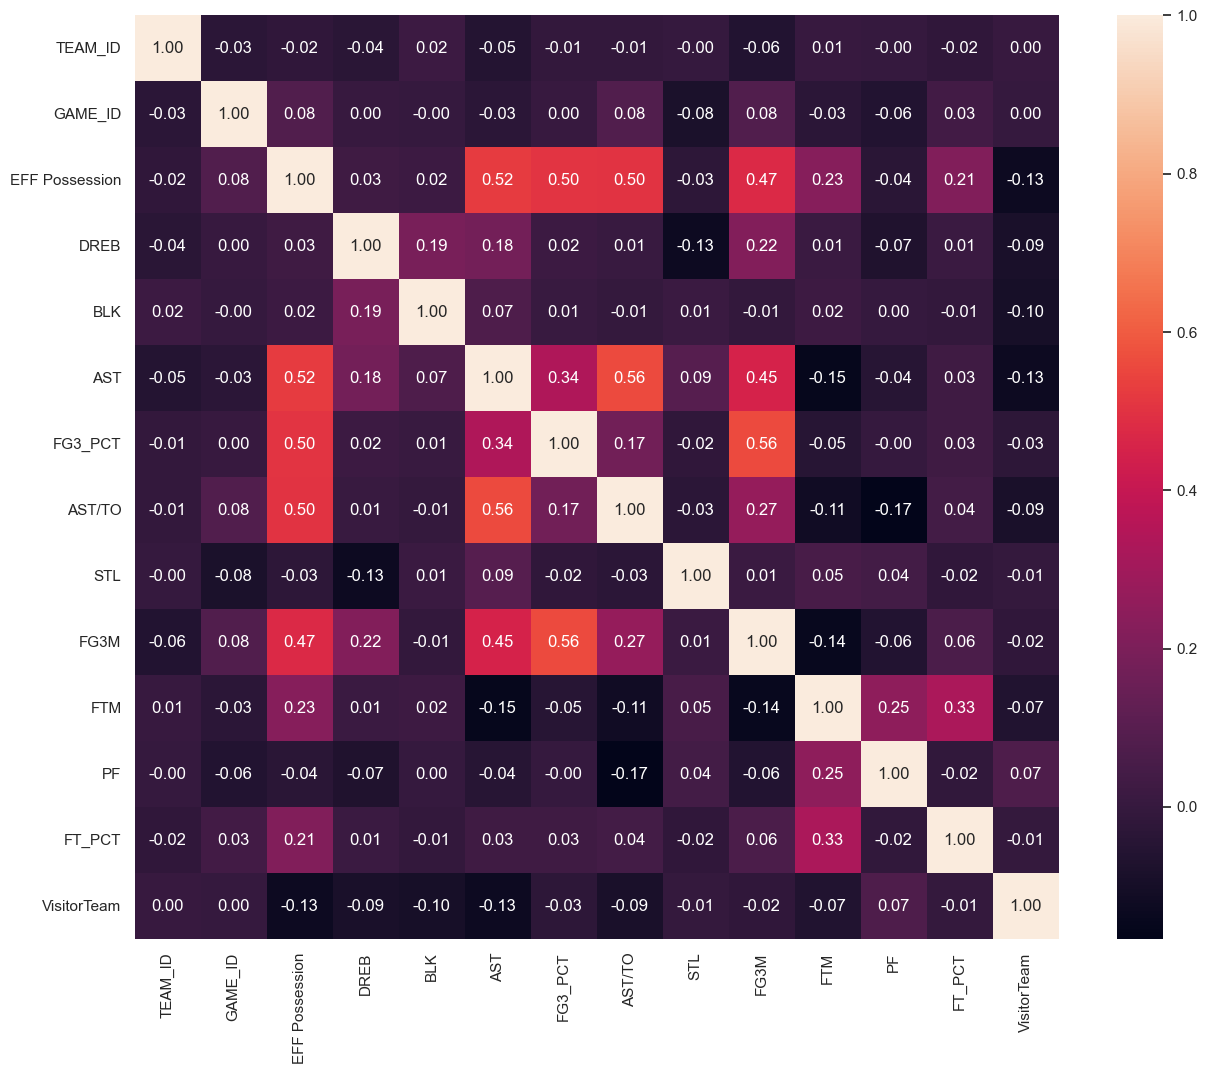

In [116]:
cm = GDGT_minmax_norm[var_a_estudiar].corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.set(font_scale = 1)
hm = sns.heatmap(cm, cbar=True,annot=True, square=True, fmt='.2f')
plt.show()

Juntamos las variables del equipo local con el visitante en la misma línea para que al hacer el test, el modelo sepa que equipo ha ganado y que equipo ha perdido con las estadísticas de cada uno de ellos.

In [117]:
home = GDGT_minmax_norm[varConTarget]['VisitorTeam'] == 0
tablaHome = GDGT_minmax_norm[varConTarget][home]

In [118]:
tablaHome

TEAM_ID   GAME_ID  EFF Possession      DREB   BLK       AST  \
1      1610612762  10300001        0.395096  0.547170  0.20  0.413043   
3      1610612763  10300002        0.418482  0.584906  0.35  0.456522   
5      1610612765  10300003        0.344090  0.415094  0.15  0.326087   
6      1610612742  10300004        0.470679  0.641509  0.25  0.347826   
9      1610612757  10300005        0.576943  0.358491  0.15  0.369565   
...           ...       ...             ...       ...   ...       ...   
53032  1610612737  52100111        0.731542  0.735849  0.30  0.586957   
53035  1610612750  52100121        0.556023  0.641509  0.10  0.326087   
53036  1610612740  52100131        0.619660  0.792453  0.35  0.456522   
53039  1610612739  52100201        0.541719  0.471698  0.20  0.413043   
53041  1610612746  52100211        0.506972  0.566038  0.15  0.347826   

        FG3_PCT    AST/TO       STL      FG3M       FTM     PF    FT_PCT  \
1      0.142857  0.039815  0.363636  0.034483  0.470588  0.525  0.691176   
3      0.266667  0.028571  0.818182  0.137931  0.392157  0.750  0.553922   
5      0.444444  0.047253  0.681818  0.137931  0.450980  0.550  0.533333   
6      0.166667  0.035714  0.409091  0.034483  0.333333  0.625  0.611111   
9      0.428571  0.044762  0.772727  0.103448  0.431373  0.425  0.600000   
...         ...       ...       ...       ...       ...    ...       ...   
53032  0.500000  0.113571  0.227273  0.551724  0.333333  0.500  0.673333   
53035  0.400000  0.058009  0.454545  0.482759  0.431373  0.525  0.558559   
53036  0.400000  0.065934  0.181818  0.275862  0.313725  0.425  0.695652   
53039  0.361111  0.072727  0.363636  0.448276  0.254902  0.375  0.794118   
53041  0.250000  0.103741  0.318182  0.310345  0.411765  0.400  0.588235   

       VisitorTeam  VICTORY_Yes  
1            False         True  
3            False         True  
5            False        False  
6            False         True  
9            False         True  
...            ...          ...  
53032        False         True  
53035        False         True  
53036        False         True  
53039        False        False  
53041        False        False  

[26521 rows x 15 columns]

In [119]:
visitor = GDGT_minmax_norm[varConTarget]['VisitorTeam'] == 1
tablaVisitor = GDGT_minmax_norm[varConTarget][visitor]
tablaVisitor

TEAM_ID   GAME_ID  EFF Possession      DREB   BLK       AST  \
0      1610612742  10300001        0.324436  0.433962  0.20  0.347826   
2      1610612749  10300002        0.324009  0.547170  0.20  0.347826   
4      1610612739  10300003        0.407971  0.698113  0.35  0.456522   
7      1610612753  10300004        0.329485  0.377358  0.25  0.217391   
8      1610612745  10300005        0.291259  0.358491  0.10  0.130435   
...           ...       ...             ...       ...   ...       ...   
53033  1610612766  52100111        0.408442  0.509434  0.20  0.391304   
53034  1610612746  52100121        0.479375  0.547170  0.25  0.326087   
53037  1610612759  52100131        0.479937  0.433962  0.15  0.326087   
53038  1610612737  52100201        0.597316  0.547170  0.15  0.239130   
53040  1610612740  52100211        0.612142  0.641509  0.15  0.347826   

        FG3_PCT    AST/TO       STL      FG3M       FTM     PF    FT_PCT  \
0      0.250000  0.033069  0.409091  0.068966  0.274510  0.725  0.416667   
2      0.153846  0.021825  0.409091  0.068966  0.529412  0.525  0.650000   
4      0.666667  0.028571  0.454545  0.137931  0.372549  0.700  0.637931   
7      0.333333  0.017920  0.409091  0.206897  0.372549  0.475  0.805556   
8      0.333333  0.002053  0.409091  0.137931  0.254902  0.500  0.611111   
...         ...       ...       ...       ...       ...    ...       ...   
53033  0.317073  0.051701  0.181818  0.448276  0.411765  0.475  0.718391   
53034  0.457143  0.033333  0.227273  0.551724  0.372549  0.575  0.697531   
53037  0.382353  0.116270  0.181818  0.448276  0.294118  0.375  0.681818   
53038  0.290323  0.034799  0.227273  0.310345  0.372549  0.350  0.893939   
53040  0.272727  0.089286  0.090909  0.206897  0.235294  0.525  0.440000   

       VisitorTeam  VICTORY_Yes  
0             True        False  
2             True        False  
4             True         True  
7             True        False  
8             True        False  
...            ...          ...  
53033         True        False  
53034         True        False  
53037         True        False  
53038         True         True  
53040         True         True  

[26521 rows x 15 columns]

In [120]:
tablaUnion =tablaHome.merge(tablaVisitor, left_on='GAME_ID', right_on='GAME_ID',
          suffixes=('_Home','_Visitor'))

In [121]:
tablaUnion

TEAM_ID_Home   GAME_ID  EFF Possession_Home  DREB_Home  BLK_Home  \
0        1610612762  10300001             0.395096   0.547170      0.20   
1        1610612763  10300002             0.418482   0.584906      0.35   
2        1610612765  10300003             0.344090   0.415094      0.15   
3        1610612742  10300004             0.470679   0.641509      0.25   
4        1610612757  10300005             0.576943   0.358491      0.15   
...             ...       ...                  ...        ...       ...   
26516    1610612737  52100111             0.731542   0.735849      0.30   
26517    1610612750  52100121             0.556023   0.641509      0.10   
26518    1610612740  52100131             0.619660   0.792453      0.35   
26519    1610612739  52100201             0.541719   0.471698      0.20   
26520    1610612746  52100211             0.506972   0.566038      0.15   

       AST_Home  FG3_PCT_Home  AST/TO_Home  STL_Home  FG3M_Home  FTM_Home  \
0      0.413043      0.142857     0.039815  0.363636   0.034483  0.470588   
1      0.456522      0.266667     0.028571  0.818182   0.137931  0.392157   
2      0.326087      0.444444     0.047253  0.681818   0.137931  0.450980   
3      0.347826      0.166667     0.035714  0.409091   0.034483  0.333333   
4      0.369565      0.428571     0.044762  0.772727   0.103448  0.431373   
...         ...           ...          ...       ...        ...       ...   
26516  0.586957      0.500000     0.113571  0.227273   0.551724  0.333333   
26517  0.326087      0.400000     0.058009  0.454545   0.482759  0.431373   
26518  0.456522      0.400000     0.065934  0.181818   0.275862  0.313725   
26519  0.413043      0.361111     0.072727  0.363636   0.448276  0.254902   
26520  0.347826      0.250000     0.103741  0.318182   0.310345  0.411765   

       PF_Home  FT_PCT_Home  VisitorTeam_Home  VICTORY_Yes_Home  \
0        0.525     0.691176             False              True   
1        0.750     0.553922             False              True   
2        0.550     0.533333             False             False   
3        0.625     0.611111             False              True   
4        0.425     0.600000             False              True   
...        ...          ...               ...               ...   
26516    0.500     0.673333             False              True   
26517    0.525     0.558559             False              True   
26518    0.425     0.695652             False              True   
26519    0.375     0.794118             False             False   
26520    0.400     0.588235             False             False   

       TEAM_ID_Visitor  EFF Possession_Visitor  DREB_Visitor  BLK_Visitor  \
0           1610612742                0.324436      0.433962         0.20   
1           1610612749                0.324009      0.547170         0.20   
2           1610612739                0.407971      0.698113         0.35   
3           1610612753                0.329485      0.377358         0.25   
4           1610612745                0.291259      0.358491         0.10   
...                ...                     ...           ...          ...   
26516       1610612766                0.408442      0.509434         0.20   
26517       1610612746                0.479375      0.547170         0.25   
26518       1610612759                0.479937      0.433962         0.15   
26519       1610612737                0.597316      0.547170         0.15   
26520       1610612740                0.612142      0.641509         0.15   

       AST_Visitor  FG3_PCT_Visitor  AST/TO_Visitor  STL_Visitor  \
0         0.347826         0.250000        0.033069     0.409091   
1         0.347826         0.153846        0.021825     0.409091   
2         0.456522         0.666667        0.028571     0.454545   
3         0.217391         0.333333        0.017920     0.409091   
4         0.130435         0.333333        0.002053     0.409091   
...            ...              ...        

Creamos una tabla índice para tener los equipos y el game ID

In [122]:
TablaIndice = tablaUnion.drop(['EFF Possession_Home','DREB_Home','BLK_Home','AST_Home','FG3_PCT_Home','AST/TO_Home','STL_Home','FG3M_Home','FTM_Home','PF_Home','FT_PCT_Home','EFF Possession_Visitor','DREB_Visitor','BLK_Visitor','AST_Visitor','FG3_PCT_Visitor','AST/TO_Visitor','STL_Visitor','FG3M_Visitor','FTM_Visitor','PF_Visitor','FT_PCT_Visitor','VisitorTeam_Home','VisitorTeam_Visitor'], axis=1)

In [123]:
TablaIndice

TEAM_ID_Home   GAME_ID  VICTORY_Yes_Home  TEAM_ID_Visitor  \
0        1610612762  10300001              True       1610612742   
1        1610612763  10300002              True       1610612749   
2        1610612765  10300003             False       1610612739   
3        1610612742  10300004              True       1610612753   
4        1610612757  10300005              True       1610612745   
...             ...       ...               ...              ...   
26516    1610612737  52100111              True       1610612766   
26517    1610612750  52100121              True       1610612746   
26518    1610612740  52100131              True       1610612759   
26519    1610612739  52100201             False       1610612737   
26520    1610612746  52100211             False       1610612740   

       VICTORY_Yes_Visitor  
0                    False  
1                    False  
2                     True  
3                    False  
4                    False  
...                    ...  
26516                False  
26517                False  
26518                False  
26519                 True  
26520                 True  

[26521 rows x 5 columns]

# 11- Preparación de conjunto de datos para entrenamiento

In [124]:
tablaUnion = tablaUnion.drop(['VICTORY_Yes_Visitor', 'GAME_ID'], axis=1)

In [125]:
tablaUnion

TEAM_ID_Home  EFF Possession_Home  DREB_Home  BLK_Home  AST_Home  \
0        1610612762             0.395096   0.547170      0.20  0.413043   
1        1610612763             0.418482   0.584906      0.35  0.456522   
2        1610612765             0.344090   0.415094      0.15  0.326087   
3        1610612742             0.470679   0.641509      0.25  0.347826   
4        1610612757             0.576943   0.358491      0.15  0.369565   
...             ...                  ...        ...       ...       ...   
26516    1610612737             0.731542   0.735849      0.30  0.586957   
26517    1610612750             0.556023   0.641509      0.10  0.326087   
26518    1610612740             0.619660   0.792453      0.35  0.456522   
26519    1610612739             0.541719   0.471698      0.20  0.413043   
26520    1610612746             0.506972   0.566038      0.15  0.347826   

       FG3_PCT_Home  AST/TO_Home  STL_Home  FG3M_Home  FTM_Home  PF_Home  \
0          0.142857     0.039815  0.363636   0.034483  0.470588    0.525   
1          0.266667     0.028571  0.818182   0.137931  0.392157    0.750   
2          0.444444     0.047253  0.681818   0.137931  0.450980    0.550   
3          0.166667     0.035714  0.409091   0.034483  0.333333    0.625   
4          0.428571     0.044762  0.772727   0.103448  0.431373    0.425   
...             ...          ...       ...        ...       ...      ...   
26516      0.500000     0.113571  0.227273   0.551724  0.333333    0.500   
26517      0.400000     0.058009  0.454545   0.482759  0.431373    0.525   
26518      0.400000     0.065934  0.181818   0.275862  0.313725    0.425   
26519      0.361111     0.072727  0.363636   0.448276  0.254902    0.375   
26520      0.250000     0.103741  0.318182   0.310345  0.411765    0.400   

       FT_PCT_Home  VisitorTeam_Home  VICTORY_Yes_Home  TEAM_ID_Visitor  \
0         0.691176             False              True       1610612742   
1         0.553922             False              True       1610612749   
2         0.533333             False             False       1610612739   
3         0.611111             False              True       1610612753   
4         0.600000             False              True       1610612745   
...            ...               ...               ...              ...   
26516     0.673333             False              True       1610612766   
26517     0.558559             False              True       1610612746   
26518     0.695652             False              True       1610612759   
26519     0.794118             False             False       1610612737   
26520     0.588235             False             False       1610612740   

       EFF Possession_Visitor  DREB_Visitor  BLK_Visitor  AST_Visitor  \
0                    0.324436      0.433962         0.20     0.347826   
1                    0.324009      0.547170         0.20     0.347826   
2                    0.407971      0.698113         0.35     0.456522   
3                    0.329485      0.377358         0.25     0.217391   
4                    0.291259      0.358491         0.10     0.130435   
...                       ...           ...          ...          ...   
26516                0.408442      0.509434         0.20     0.391304   
26517                0.479375      0.547170         0.25     0.326087   
26518                0.479937      0.433962         0.15     0.326087   
26519                0.597316      0.547170         0.15     0.239130   
26520                0.612142      0.641509         0.15     0.347826   

       FG3_PCT_Visitor  AST/TO_Visitor  STL_Visitor  FG3M_Visitor  \
0             0.250000        0.033069     0.409091      0.068966   
1             0.153846        0.021825     0.409091      0.068966   
2             0.666667        0.028571     0.454545      0.137931   
3             0.333333        0.017920     0.409091      0.206897   
4             0.333333        0.002053     0.409091      0.137931   
.

Quitamos los identificadores de los equipos porque no son una variable.

In [126]:
tablaUnion = tablaUnion.drop(['TEAM_ID_Visitor', 'TEAM_ID_Home'], axis=1)

In [127]:
tablaUnion["VICTORY_Yes_Home"]

0         True
1         True
2        False
3         True
4         True
         ...  
26516     True
26517     True
26518     True
26519    False
26520    False
Name: VICTORY_Yes_Home, Length: 26521, dtype: bool

Movemos la varible dependiente al final del dataset

In [128]:
VICTORY_Yes_Home=tablaUnion["VICTORY_Yes_Home"]

In [129]:
tablaUnion=tablaUnion.drop(['VICTORY_Yes_Home'] , axis=1)

In [130]:
tablaUnion

EFF Possession_Home  DREB_Home  BLK_Home  AST_Home  FG3_PCT_Home  \
0                 0.395096   0.547170      0.20  0.413043      0.142857   
1                 0.418482   0.584906      0.35  0.456522      0.266667   
2                 0.344090   0.415094      0.15  0.326087      0.444444   
3                 0.470679   0.641509      0.25  0.347826      0.166667   
4                 0.576943   0.358491      0.15  0.369565      0.428571   
...                    ...        ...       ...       ...           ...   
26516             0.731542   0.735849      0.30  0.586957      0.500000   
26517             0.556023   0.641509      0.10  0.326087      0.400000   
26518             0.619660   0.792453      0.35  0.456522      0.400000   
26519             0.541719   0.471698      0.20  0.413043      0.361111   
26520             0.506972   0.566038      0.15  0.347826      0.250000   

       AST/TO_Home  STL_Home  FG3M_Home  FTM_Home  PF_Home  FT_PCT_Home  \
0         0.039815  0.363636   0.034483  0.470588    0.525     0.691176   
1         0.028571  0.818182   0.137931  0.392157    0.750     0.553922   
2         0.047253  0.681818   0.137931  0.450980    0.550     0.533333   
3         0.035714  0.409091   0.034483  0.333333    0.625     0.611111   
4         0.044762  0.772727   0.103448  0.431373    0.425     0.600000   
...            ...       ...        ...       ...      ...          ...   
26516     0.113571  0.227273   0.551724  0.333333    0.500     0.673333   
26517     0.058009  0.454545   0.482759  0.431373    0.525     0.558559   
26518     0.065934  0.181818   0.275862  0.313725    0.425     0.695652   
26519     0.072727  0.363636   0.448276  0.254902    0.375     0.794118   
26520     0.103741  0.318182   0.310345  0.411765    0.400     0.588235   

       VisitorTeam_Home  EFF Possession_Visitor  DREB_Visitor  BLK_Visitor  \
0                 False                0.324436      0.433962         0.20   
1                 False                0.324009      0.547170         0.20   
2                 False                0.407971      0.698113         0.35   
3                 False                0.329485      0.377358         0.25   
4                 False                0.291259      0.358491         0.10   
...                 ...                     ...           ...          ...   
26516             False                0.408442      0.509434         0.20   
26517             False                0.479375      0.547170         0.25   
26518             False                0.479937      0.433962         0.15   
26519             False                0.597316      0.547170         0.15   
26520             False                0.612142      0.641509         0.15   

       AST_Visitor  FG3_PCT_Visitor  AST/TO_Visitor  STL_Visitor  \
0         0.347826         0.250000        0.033069     0.409091   
1         0.347826         0.153846        0.021825     0.409091   
2         0.456522         0.666667        0.028571     0.454545   
3         0.217391         0.333333        0.017920     0.409091   
4         0.130435         0.333333        0.002053     0.409091   
...            ...              ...             ...          ...   
26516     0.391304         0.317073        0.051701     0.181818   
26517     0.326087         0.457143        0.033333     0.227273   
26518     0.326087         0.382353        0.116270     0.181818   
26519     0.239130         0.290323        0.034799     0.227273   
26520     0.347826         0.272727        0.089286     0.090909   

       FG3M_Visitor  FTM_Visitor  PF_Visitor  FT_PCT_Visitor  \
0          0.068966     0.274510       0.725        0.416667   
1          0.068966     0.529412       0.525        0.650000   
2          0.137931     0.372549       0.700        0.637931   
3          0.206897     0.372549       0.475        0.805556   
4          0.137931     0.254902       0.500        0.611111   
...             ...          ...         ...             ...   
265

In [131]:
tablaUnion['VICTORY_Yes_Home'] = VICTORY_Yes_Home

In [132]:
tablaUnion

EFF Possession_Home  DREB_Home  BLK_Home  AST_Home  FG3_PCT_Home  \
0                 0.395096   0.547170      0.20  0.413043      0.142857   
1                 0.418482   0.584906      0.35  0.456522      0.266667   
2                 0.344090   0.415094      0.15  0.326087      0.444444   
3                 0.470679   0.641509      0.25  0.347826      0.166667   
4                 0.576943   0.358491      0.15  0.369565      0.428571   
...                    ...        ...       ...       ...           ...   
26516             0.731542   0.735849      0.30  0.586957      0.500000   
26517             0.556023   0.641509      0.10  0.326087      0.400000   
26518             0.619660   0.792453      0.35  0.456522      0.400000   
26519             0.541719   0.471698      0.20  0.413043      0.361111   
26520             0.506972   0.566038      0.15  0.347826      0.250000   

       AST/TO_Home  STL_Home  FG3M_Home  FTM_Home  PF_Home  FT_PCT_Home  \
0         0.039815  0.363636   0.034483  0.470588    0.525     0.691176   
1         0.028571  0.818182   0.137931  0.392157    0.750     0.553922   
2         0.047253  0.681818   0.137931  0.450980    0.550     0.533333   
3         0.035714  0.409091   0.034483  0.333333    0.625     0.611111   
4         0.044762  0.772727   0.103448  0.431373    0.425     0.600000   
...            ...       ...        ...       ...      ...          ...   
26516     0.113571  0.227273   0.551724  0.333333    0.500     0.673333   
26517     0.058009  0.454545   0.482759  0.431373    0.525     0.558559   
26518     0.065934  0.181818   0.275862  0.313725    0.425     0.695652   
26519     0.072727  0.363636   0.448276  0.254902    0.375     0.794118   
26520     0.103741  0.318182   0.310345  0.411765    0.400     0.588235   

       VisitorTeam_Home  EFF Possession_Visitor  DREB_Visitor  BLK_Visitor  \
0                 False                0.324436      0.433962         0.20   
1                 False                0.324009      0.547170         0.20   
2                 False                0.407971      0.698113         0.35   
3                 False                0.329485      0.377358         0.25   
4                 False                0.291259      0.358491         0.10   
...                 ...                     ...           ...          ...   
26516             False                0.408442      0.509434         0.20   
26517             False                0.479375      0.547170         0.25   
26518             False                0.479937      0.433962         0.15   
26519             False                0.597316      0.547170         0.15   
26520             False                0.612142      0.641509         0.15   

       AST_Visitor  FG3_PCT_Visitor  AST/TO_Visitor  STL_Visitor  \
0         0.347826         0.250000        0.033069     0.409091   
1         0.347826         0.153846        0.021825     0.409091   
2         0.456522         0.666667        0.028571     0.454545   
3         0.217391         0.333333        0.017920     0.409091   
4         0.130435         0.333333        0.002053     0.409091   
...            ...              ...             ...          ...   
26516     0.391304         0.317073        0.051701     0.181818   
26517     0.326087         0.457143        0.033333     0.227273   
26518     0.326087         0.382353        0.116270     0.181818   
26519     0.239130         0.290323        0.034799     0.227273   
26520     0.347826         0.272727        0.089286     0.090909   

       FG3M_Visitor  FTM_Visitor  PF_Visitor  FT_PCT_Visitor  \
0          0.068966     0.274510       0.725        0.416667   
1          0.068966     0.529412       0.525        0.650000   
2          0.137931     0.372549       0.700        0.637931   
3          0.206897     0.372549       0.475        0.805556   
4          0.137931     0.254902       0.500        0.611111   
...             ...          ...         ...             ...   
265

In [133]:
# Hacemos el split
X_train, X_test, y_train, y_test=train_test_split(tablaUnion.iloc[:,:-1], tablaUnion["VICTORY_Yes_Home"], test_size=0.3)

## Comparación de varios modelos

Ahora comparamos varios modelos para quedarnos con un tipo de algoritmo y luego pasamos a ajustar parámetros . Fijarse:

- A través del primer chunk hacemos validación cruzada con varios modelos sobre la muestra de traning y visualizamos los resultados a través de boxplots. 


LR: 0.957660 (0.003529)
LDA: 0.957660 (0.004288)
DTC: 0.940422 (0.007936)
KNN: 0.894311 (0.008237)
RFC: 0.958252 (0.002929)


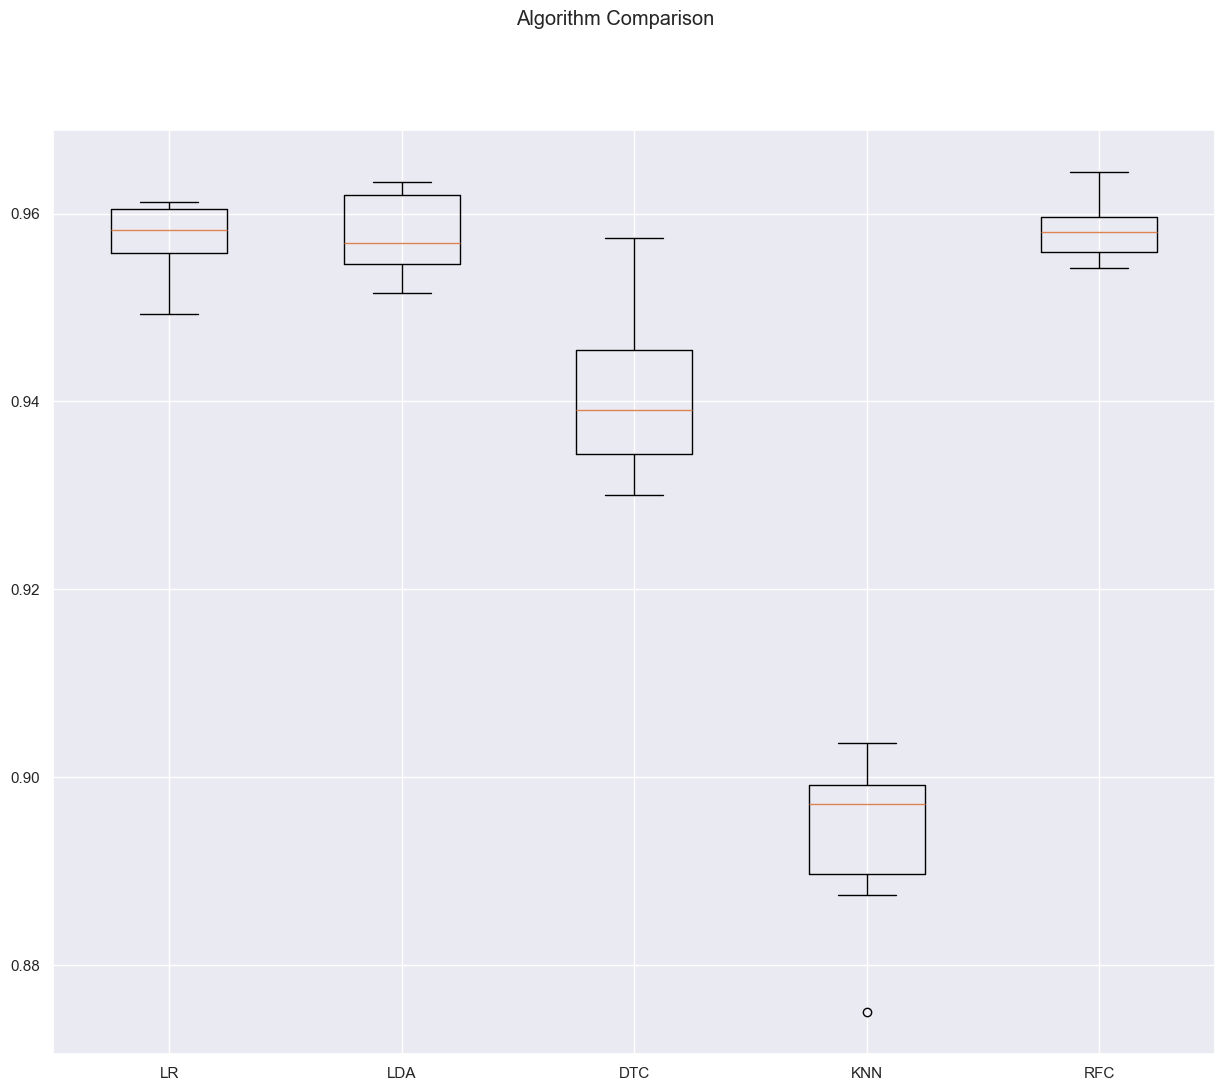

In [134]:
X = X_train
Y = y_train


seed = 7

models = []
models.append(('LR'  , LogisticRegression        ()))
models.append(('LDA' , LinearDiscriminantAnalysis()))
models.append(('DTC' , DecisionTreeClassifier    ()))
models.append(('KNN' , KNeighborsClassifier      ()))
models.append(('RFC' , RandomForestClassifier    ()))


results = []
names   = []
scoring = "accuracy"

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

fig = plt.figure()
fig.set_size_inches(15, 12)
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# 10. Reducción de dimensionalidad Sin Normalizar

In [135]:
# veamos las variables numéricas

var_numericas = GDGT.describe().columns
var_numericas

Index(['GAME_ID', 'TEAM_ID', 'FGM', 'FGA', 'FG3M', 'FG3A', 'FTM', 'FTA',
       'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PF', 'PTS', 'SEASON',
       'FG_PCT', 'FG3_PCT', 'FT_PCT', 'DREB_PCT', 'OREB_PCT', 'BLK%',
       'Possession', 'EFF Possession', 'EFF OF', 'eFG%', 'TS%', '3Par', 'AST%',
       'TOV%', 'STL%', 'AST/TO'],
      dtype='object')

## Selección de atributos: 

El objetivo de la selección de atributos es triple: mejorar la capacidad predictiva de nuestro modelo, proporcionando modelos predictivos más rápidos y eficientes, y proporcionar una mejor comprensión del proceso subyacente que generó los datos.
Otros beneficios adicionales que nos proporciona una buena selección de atributos antes de comenzar con el armado del modelo, son: 
Reduce el sobreentrenamiento: Menos datos redundantes significan menos oportunidades para tomar decisiones sobre la base de ruido.
Mejora la precisión: Menos datos engañosos se convierten en una mejora en la exactitud del modelo.
Reduce el tiempo de entrenamiento: Menos datos significa que los algoritmos aprenden más rápidamente.


### aproximación filter


### Selección estadística

De este modo se utilizan diferentes técnicas que relacionan cada variable con la variable objetivo. Para ello:

- Definimos una matriz con las variables predictoras -> X
- Otra matriz con el target -> y
- Aplicamos la función con diferentes métodos, para el 50% de las variables, y hacemos un ranking.

In [136]:
# Quitamos las varaibles SEASSON,Team_ID y Game_ID
var_a_estudiar2 = ['TEAM_ID','GAME_ID','FGM', 'FGA', 'FG3M', 'FG3A', 'FTM', 'FTA', 'OREB', 'DREB', 'REB',
       'AST', 'STL', 'BLK', 'TO', 'PF', 'PTS', 'FG_PCT', 'FG3_PCT', 'FT_PCT', 'DREB_PCT', 'OREB_PCT',
       'BLK%', 'Possession', 'EFF Possession', 'EFF OF', 'eFG%', 'TS%', '3Par',
       'AST%', 'TOV%', 'STL%', 'AST/TO','VisitorTeam']

In [137]:
var_a_estudiar_con_Target2 = ['TEAM_ID','GAME_ID','FGM', 'FGA', 'FG3M', 'FG3A', 'FTM', 'FTA', 'OREB', 'DREB', 'REB',
       'AST', 'STL', 'BLK', 'TO', 'PF', 'PTS', 'FG_PCT', 'FG3_PCT', 'FT_PCT', 'DREB_PCT', 'OREB_PCT',
       'BLK%', 'Possession', 'EFF Possession', 'EFF OF', 'eFG%', 'TS%', '3Par',
       'AST%', 'TOV%', 'STL%', 'AST/TO','VisitorTeam','VICTORY_Yes']

In [138]:
X2 = GDGT[var_a_estudiar2]
y2 = GDGT.VICTORY_Yes
print(X2.shape)
print(y2.shape)

(53042, 34)
(53042,)


Ahora aplicamos para que se quede con el 50% de las variables que tienen mayor relación con la variable target

### Método f_classif

In [139]:
bestfeatures_met_f_classif = SelectPercentile(score_func=f_classif, percentile=50)

fit = bestfeatures_met_f_classif.fit(X2,y2)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X2.columns)
featureScores_f_classif = pd.concat([dfcolumns,dfscores],axis=1)
featureScores_f_classif.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores_f_classif.nlargest(dfcolumns.shape[0],'Score'))  #print 10 best features

             Specs         Score
24  EFF Possession  1.957948e+04
25          EFF OF  1.957948e+04
27             TS%  1.524568e+04
17          FG_PCT  1.298674e+04
26            eFG%  1.291320e+04
16             PTS  1.104349e+04
2              FGM  7.419253e+03
9             DREB  6.599705e+03
11             AST  5.803372e+03
18         FG3_PCT  5.171865e+03
10             REB  3.914788e+03
32          AST/TO  3.345867e+03
4             FG3M  1.884167e+03
33     VisitorTeam  1.744832e+03
13             BLK  1.373256e+03
6              FTM  1.345639e+03
22            BLK%  1.332201e+03
12             STL  1.004458e+03
31            STL%  9.440942e+02
29            AST%  9.142884e+02
7              FTA  8.726389e+02
14              TO  7.171183e+02
30            TOV%  7.171183e+02
15              PF  7.084739e+02
21        OREB_PCT  6.620434e+02
20        DREB_PCT  6.620434e+02
19          FT_PCT  5.449117e+02
3              FGA  9.377578e+01
23      Possession  9.306463e+01
8         

c:\Users\aam05683h\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\aam05683h\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


### Método mutual_info_classif

In [140]:
bestfeatures_mutual_info_classif = SelectPercentile(score_func=mutual_info_classif, percentile=50)

fit = bestfeatures_mutual_info_classif.fit(X2,y2)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X2.columns)
featureScores_mutual_info_classif = pd.concat([dfcolumns,dfscores],axis=1)
featureScores_mutual_info_classif.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores_mutual_info_classif.nlargest(dfcolumns.shape[0],'Score'))  #print 10 best features

             Specs     Score
25          EFF OF  0.159722
24  EFF Possession  0.159449
27             TS%  0.129092
17          FG_PCT  0.109182
26            eFG%  0.107947
16             PTS  0.098898
2              FGM  0.062309
9             DREB  0.059830
11             AST  0.054856
18         FG3_PCT  0.052303
32          AST/TO  0.051388
29            AST%  0.045969
10             REB  0.039666
20        DREB_PCT  0.039199
21        OREB_PCT  0.033077
33     VisitorTeam  0.020956
4             FG3M  0.016468
22            BLK%  0.015401
6              FTM  0.014822
7              FTA  0.013500
13             BLK  0.011848
12             STL  0.011122
15              PF  0.010084
14              TO  0.009543
31            STL%  0.009308
30            TOV%  0.008637
19          FT_PCT  0.007089
0          TEAM_ID  0.006368
3              FGA  0.003855
8             OREB  0.003335
23      Possession  0.003035
28            3Par  0.001741
5             FG3A  0.001303
1          GAM

### Método chi2

In [141]:
bestfeatures_chi2 = SelectPercentile(score_func=chi2, percentile=50)

fit = bestfeatures_chi2.fit(X2,y2)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X2.columns)
featureScores_chi2 = pd.concat([dfcolumns,dfscores],axis=1)
featureScores_chi2.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores_chi2.nlargest(dfcolumns.shape[0],'Score'))  #print 10 best features

             Specs         Score
25          EFF OF  18957.614950
18         FG3_PCT  16269.696107
16             PTS  16173.708646
17          FG_PCT   7273.333607
11             AST   6432.481736
9             DREB   5678.256523
2              FGM   5128.949844
4             FG3M   3819.665039
10             REB   3727.712297
6              FTM   2827.132514
7              FTA   2156.441220
13             BLK   1778.306632
21        OREB_PCT   1594.118608
32          AST/TO   1117.573613
12             STL   1112.687079
33     VisitorTeam    844.662305
14              TO    809.775411
19          FT_PCT    735.863107
15              PF    704.954812
20        DREB_PCT    533.943849
24  EFF Possession    189.576149
26            eFG%     93.430913
27             TS%     84.153413
3              FGA     72.890161
8             OREB     66.528898
23      Possession     45.519445
22            BLK%     19.769834
29            AST%     16.626582
5             FG3A     14.101228
31        

### Entrenamos un modelo para ver el orden de importancia de los atributos

In [142]:
# Extraer valores para sklearn y crear los conjuntos de entrenamiento y test:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=0)

In [143]:
# Entrenar un random forest:
forest2 = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
forest2.fit(X2_train, y2_train)
forest2.score(X2_test, y2_test)

0.829070571231069

In [144]:
# Ordenar los atributos por importancia:
importances2 = forest2.feature_importances_
imp_series2 = pd.Series(importances2, index = X2.columns).sort_values()[::-1]

In [145]:
# Imprimir la lista de los 30 atributos más informativos sobre la clase:
print(imp_series2[:30])

EFF OF            0.099215
EFF Possession    0.088202
DREB              0.075210
TS%               0.057638
REB               0.056799
FG_PCT            0.044746
eFG%              0.040648
STL               0.038132
GAME_ID           0.031174
BLK%              0.030537
PTS               0.029783
Possession        0.028873
FG3_PCT           0.025531
AST/TO            0.023322
3Par              0.022728
FGA               0.022358
PF                0.021653
DREB_PCT          0.021470
FGM               0.021148
OREB_PCT          0.020439
FG3A              0.020419
AST%              0.020283
FT_PCT            0.018724
STL%              0.018404
AST               0.017664
FTA               0.016957
FTM               0.016650
BLK               0.014378
FG3M              0.013052
OREB              0.012910
dtype: float64


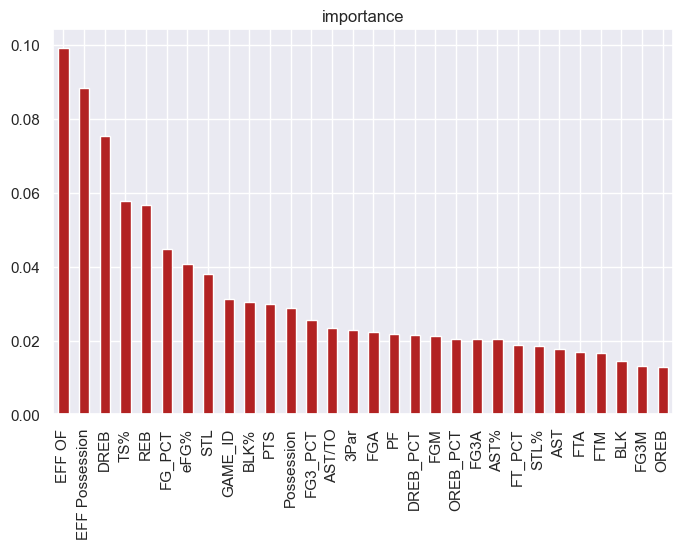

In [146]:
# Gráfica con los 30 atributos más importantes:
h = imp_series2[:30].plot(kind = 'bar', figsize = (8, 5), title = "importance", color='firebrick')

### Los juntamos todos

Como hemos obtenido una priorización, ahora creamos una dataframe en el que tengamos las variables ordenadas por importancia según cada método

In [147]:
filter_chi2 = featureScores_chi2.sort_values(by='Score',ascending=False)['Specs'].values
filter_f_classif2 = featureScores_f_classif.sort_values(by='Score',ascending=False)['Specs'].values
filter_mutual_info_classiff2 = featureScores_mutual_info_classif.sort_values(by='Score',ascending=False)['Specs'].values
# wrapper_RF = featureScores_RF.sort_values(by='Score',ascending=True)['Specs'].values


In [148]:
ranking_todos = pd.DataFrame((filter_chi2,filter_f_classif2,filter_mutual_info_classiff2)).T
ranking_todos.columns = ['filter_chi','filter_f_classif','filter_mutual_info_classiff']
ranking_todos

filter_chi filter_f_classif filter_mutual_info_classiff
0           EFF OF   EFF Possession                      EFF OF
1          FG3_PCT           EFF OF              EFF Possession
2              PTS              TS%                         TS%
3           FG_PCT           FG_PCT                      FG_PCT
4              AST             eFG%                        eFG%
5             DREB              PTS                         PTS
6              FGM              FGM                         FGM
7             FG3M             DREB                        DREB
8              REB              AST                         AST
9              FTM          FG3_PCT                     FG3_PCT
10             FTA              REB                      AST/TO
11             BLK           AST/TO                        AST%
12        OREB_PCT             FG3M                         REB
13          AST/TO      VisitorTeam                    DREB_PCT
14             STL              BLK                    OREB_PCT
15     VisitorTeam              FTM                 VisitorTeam
16              TO             BLK%                        FG3M
17          FT_PCT              STL                        BLK%
18              PF             STL%                         FTM
19        DREB_PCT             AST%                         FTA
20  EFF Possession              FTA                         BLK
21            eFG%               TO                         STL
22             TS%             TOV%                          PF
23             FGA               PF                          TO
24            OREB         OREB_PCT                        STL%
25      Possession         DREB_PCT                        TOV%
26            BLK%           FT_PCT                      FT_PCT
27            AST%              FGA                     TEAM_ID
28            FG3A       Possession                         FGA
29            STL%             OREB                        OREB
30            TOV%             3Par                  Possession
31            3Par             FG3A                        3Par
32         TEAM_ID          GAME_ID                        FG3A
33         GAME_ID          TEAM_ID                     GAME_ID

Quitamos TEAM_ID Y GAME_ID para revisar la correlación.

In [149]:
var_a_estudiar_Corr = ['FGM', 'FGA', 'FG3M', 'FG3A', 'FTM', 'FTA', 'OREB', 'DREB', 'REB',
       'AST', 'STL', 'BLK', 'TO', 'PF', 'PTS', 'FG_PCT', 'FG3_PCT', 'FT_PCT', 'DREB_PCT', 'OREB_PCT',
       'BLK%', 'Possession', 'EFF Possession', 'EFF OF', 'eFG%', 'TS%', '3Par',
       'AST%', 'TOV%', 'STL%', 'AST/TO','VisitorTeam','VICTORY_Yes']

In [150]:
GDGT[var_a_estudiar_Corr]

FGM   FGA  FG3M  FG3A   FTM   FTA  OREB  DREB   REB   AST   STL  BLK  \
0      34.0  76.0   2.0   8.0  15.0  30.0  12.0  26.0  38.0  20.0   9.0  4.0   
1      32.0  70.0   1.0   7.0  25.0  34.0   9.0  32.0  41.0  23.0   8.0  4.0   
2      32.0  75.0   2.0  13.0  28.0  40.0  11.0  32.0  43.0  20.0   9.0  4.0   
3      40.0  81.0   4.0  15.0  21.0  34.0  14.0  34.0  48.0  25.0  18.0  7.0   
4      38.0  77.0   4.0   6.0  20.0  29.0  12.0  40.0  52.0  25.0  10.0  7.0   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
53037  37.0  91.0  13.0  34.0  16.0  22.0   8.0  26.0  34.0  19.0   4.0  3.0   
53038  39.0  80.0   9.0  31.0  20.0  22.0  10.0  32.0  42.0  15.0   5.0  3.0   
53039  37.0  81.0  13.0  36.0  14.0  17.0   8.0  28.0  36.0  23.0   8.0  4.0   
53040  43.0  88.0   6.0  22.0  13.0  25.0  17.0  37.0  54.0  20.0   2.0  3.0   
53041  35.0  85.0   9.0  36.0  22.0  34.0  12.0  33.0  45.0  20.0   7.0  3.0   

         TO    PF    PTS     FG_PCT    FG3_PCT     FT_PCT   DREB_PCT  \
0      18.0  34.0   85.0  44.736842  25.000000  50.000000  74.285714   
1      18.0  26.0   90.0  45.714286  14.285714  73.529412  72.727273   
2      24.0  26.0   94.0  42.666667  15.384615  70.000000  69.565217   
3      25.0  35.0  105.0  49.382716  26.666667  61.764706  75.555556   
4      25.0  33.0  100.0  49.350649  66.666667  68.965517  76.923077   
...     ...   ...    ...        ...        ...        ...        ...   
53037   6.0  20.0  103.0  40.659341  38.235294  72.727273  76.470588   
53038  13.0  19.0  107.0  48.750000  29.032258  90.909091  80.000000   
53039  11.0  20.0  101.0  45.679012  36.111111  82.352941  73.684211   
53040   8.0  26.0  105.0  48.863636  27.272727  52.000000  75.510204   
53041   7.0  21.0  101.0  41.176471  25.000000  64.705882  66.000000   

        OREB_PCT      BLK%  Possession  EFF Possession      EFF OF      eFG%  \
0      27.272727  0.057143        94.0        0.904255   90.425532  0.460526   
1      25.714286  0.052632        92.6        0.971922   97.192225  0.464286   
2      24.444444  0.049383       104.0        0.903846   90.384615  0.440000   
3      30.434783  0.093333       105.6        0.994318   99.431818  0.518519   
4      32.432432  0.080460       101.6        0.984252   98.425197  0.519481   
...          ...       ...         ...             ...         ...       ...   
53037  15.094340  0.037037        97.8        1.053170  105.316973  0.478022   
53038  26.315789  0.037037        91.8        1.165577  116.557734  0.543750   
53039  20.000000  0.050000        90.8        1.112335  111.233480  0.537037   
53040  34.000000  0.035294        89.0        1.179775  117.977528  0.522727   
53041  24.489796  0.034091        93.6        1.079060  107.905983  0.464706   

            TS%      3Par      AST%  TOV%      STL%    AST/TO  VisitorTeam  \
0      0.476457  0.105263  0.588235  0.18  0.194384  1.111111         True   
1      0.529661  0.100000  0.718750  0.18  0.191489  1.277778        False   
2      0.507559  0.173333  0.625000  0.24  0.227273  0.833333         True   
3      0.547103  0.185185  0.625000  0.25  0.240385  1.000000        False   
4      0.557041  0.077922  0.657895  0.25  0.240385  1.000000         True   
...         ...       ...       ...   ...       ...       ...          ...   
53037  0.511522  0.373626  0.513514  0.06  0.063025  3.166667         True   
53038  0.596566  0.387500  0.384615  0.13  0.143172  1.153846         True   
53039  0.570750  0.444444  0.621622  0.11  0.119826  2.090909        False   
53040  0.530303  0.250000  0.465116  0.08  0.085470  2.500000         True   
53041  0.505202  0.423529  0.571429  0.07  0.078652  2.857143        False   

       VICTORY_Yes  
0            False  
1             True  
2            False  
3             True  
4             True  
...            ...  
53037        False  
53038         True  
53039        False  
53040         True  
53041        False  

[53042 rows x 33 columns]

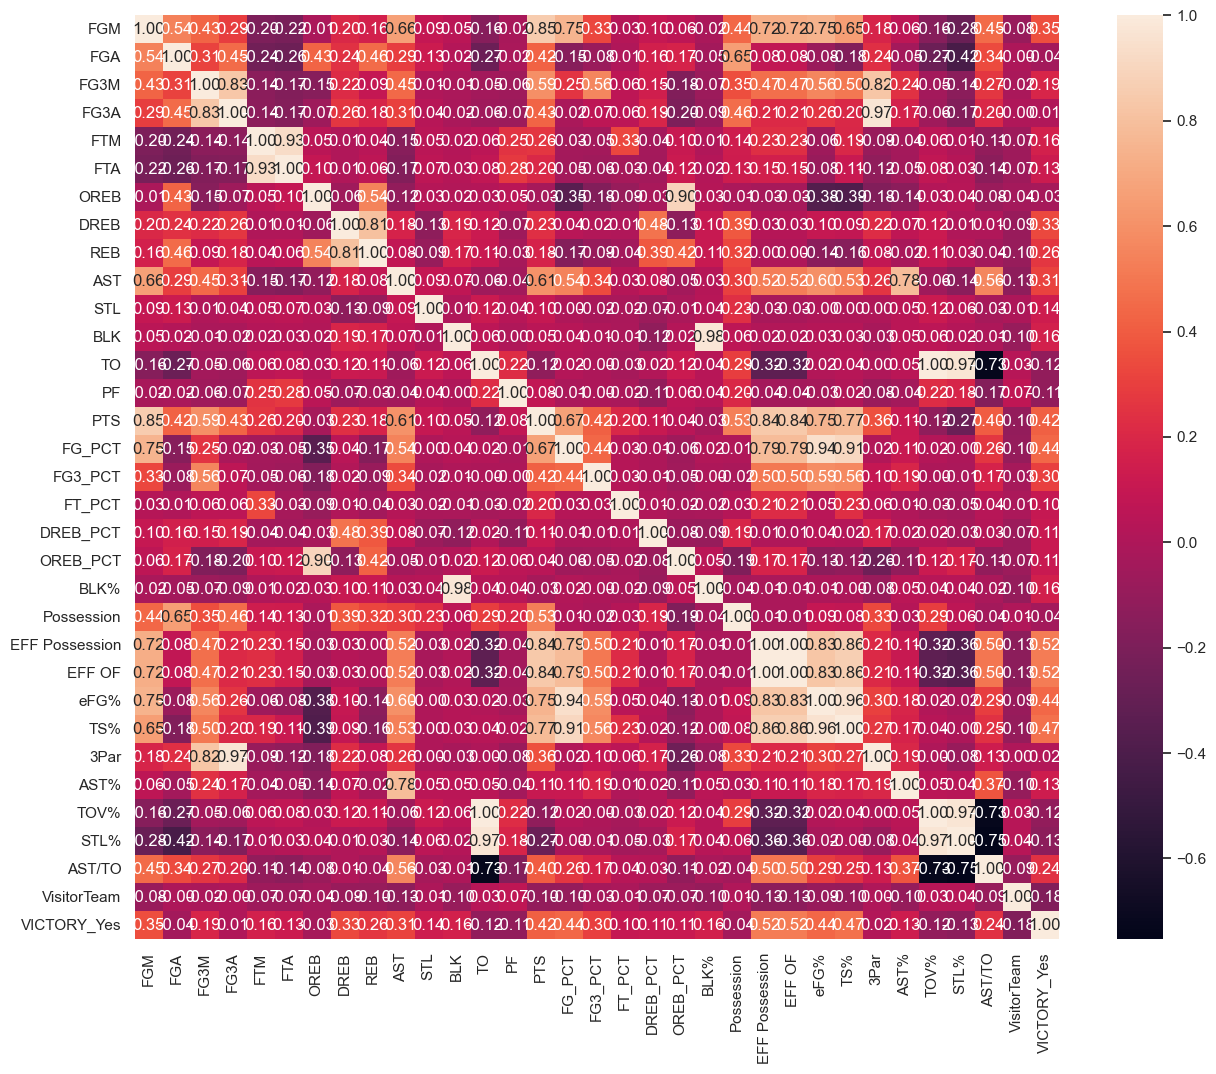

In [151]:
cm = GDGT[var_a_estudiar_Corr].corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.set(font_scale = 1)
hm = sns.heatmap(cm, cbar=True,annot=True, square=True, fmt='.2f')
plt.show()

### Elegimos variables

El criterio que vamos a adoptar es escoger una unica por concepto y que esté lo antes en la lista. 
Para ello vamos a ver cual es el número óptimo de variables.
La correlación es la misma que los datos normalizados. Por lo que elgimos las mismas variables.

In [152]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Definir diferentes números de variables predictoras
num_predictors2 = [2, 5, 10, 15, 20, 25, 30]

In [153]:
# Loop a través de diferentes números de variables predictoras
for n in num_predictors2:
    # Crear un modelo de Random Forest con n variables predictoras
    model = RandomForestClassifier(n_estimators=100, max_features=n, random_state=42)
    
    # Realizar validación cruzada con 5-fold
    cv_scores = cross_val_score(model, X2_train, y2_train, cv=5, scoring="accuracy")
    
    # Calcular la media de las puntuaciones de validación cruzada
    mean_cv_score = cv_scores.mean()
    
    # Ajustar el modelo en el conjunto de entrenamiento completo
    model.fit(X2_train, y2_train)
    
    # Evaluar el modelo en el conjunto de prueba
    test_score = model.score(X2_test, y2_test)
    
    # Imprimir los resultados
    print(f"Número de variables predictoras: {n}")
    print(f"Puntuación media de validación cruzada: {mean_cv_score:.3f}")
    print(f"Puntuación de prueba: {test_score:.3f}")
    print("=" * 50)

Número de variables predictoras: 2
Puntuación media de validación cruzada: 0.817
Puntuación de prueba: 0.816
Número de variables predictoras: 5
Puntuación media de validación cruzada: 0.826
Puntuación de prueba: 0.827
Número de variables predictoras: 10
Puntuación media de validación cruzada: 0.834
Puntuación de prueba: 0.834
Número de variables predictoras: 15
Puntuación media de validación cruzada: 0.834
Puntuación de prueba: 0.837
Número de variables predictoras: 20
Puntuación media de validación cruzada: 0.834
Puntuación de prueba: 0.838
Número de variables predictoras: 25
Puntuación media de validación cruzada: 0.835
Puntuación de prueba: 0.837
Número de variables predictoras: 30
Puntuación media de validación cruzada: 0.833
Puntuación de prueba: 0.835


Nos quedamos con las varibles que seleccionamos cuando normalizamos. Ya que la correlación es la misma entre todas las variables

In [154]:
varSinTarget2 = ['TEAM_ID','GAME_ID','EFF Possession','DREB','BLK','AST','FG3_PCT','AST/TO', 'STL','FG3M', 'FTM','PF','FT_PCT','VisitorTeam']
varConTarget2 = ['TEAM_ID','GAME_ID','EFF Possession','DREB','BLK','AST','FG3_PCT','AST/TO', 'STL','FG3M', 'FTM','PF','FT_PCT','VisitorTeam','VICTORY_Yes']

Juntamos las variables del equipo local con el visitante en la misma línea para que al hacer el test, el modelo sepa que equipo ha ganado y que equipo ha perdido con las estadísticas de cada uno de ellos.

In [155]:
home2 = GDGT[varConTarget2]['VisitorTeam'] == 0
tablaHome2 = GDGT[varConTarget2][home2]

In [156]:
tablaHome2

TEAM_ID   GAME_ID  EFF Possession  DREB  BLK   AST    FG3_PCT  \
1      1610612762  10300001        0.971922  32.0  4.0  23.0  14.285714   
3      1610612763  10300002        0.994318  34.0  7.0  25.0  26.666667   
5      1610612765  10300003        0.923077  25.0  3.0  19.0  44.444444   
6      1610612742  10300004        1.044304  37.0  5.0  20.0  16.666667   
9      1610612757  10300005        1.146067  22.0  3.0  21.0  42.857143   
...           ...       ...             ...   ...  ...   ...        ...   
53032  1610612737  52100111        1.294118  42.0  6.0  31.0  50.000000   
53035  1610612750  52100121        1.126033  37.0  2.0  19.0  40.000000   
53036  1610612740  52100131        1.186975  45.0  7.0  25.0  40.000000   
53039  1610612739  52100201        1.112335  28.0  4.0  23.0  36.111111   
53041  1610612746  52100211        1.079060  33.0  3.0  20.0  25.000000   

         AST/TO   STL  FG3M   FTM    PF     FT_PCT  VisitorTeam  VICTORY_Yes  
1      1.277778   8.0   1.0  25.0  26.0  73.529412        False         True  
3      1.000000  18.0   4.0  21.0  35.0  61.764706        False         True  
5      1.461538  15.0   4.0  24.0  27.0  60.000000        False        False  
6      1.176471   9.0   1.0  18.0  30.0  66.666667        False         True  
9      1.400000  17.0   3.0  23.0  22.0  65.714286        False         True  
...         ...   ...   ...   ...   ...        ...          ...          ...  
53032  3.100000   5.0  16.0  18.0  25.0  72.000000        False         True  
53035  1.727273  10.0  14.0  23.0  26.0  62.162162        False         True  
53036  1.923077   4.0   8.0  17.0  22.0  73.913043        False         True  
53039  2.090909   8.0  13.0  14.0  20.0  82.352941        False        False  
53041  2.857143   7.0   9.0  22.0  21.0  64.705882        False        False  

[26521 rows x 15 columns]

In [157]:
visitor2 = GDGT[varConTarget2]['VisitorTeam'] == 1
tablaVisitor2 = GDGT[varConTarget2][visitor2]
tablaVisitor2

TEAM_ID   GAME_ID  EFF Possession  DREB  BLK   AST    FG3_PCT  \
0      1610612742  10300001        0.904255  26.0  4.0  20.0  25.000000   
2      1610612749  10300002        0.903846  32.0  4.0  20.0  15.384615   
4      1610612739  10300003        0.984252  40.0  7.0  25.0  66.666667   
7      1610612753  10300004        0.909091  23.0  5.0  14.0  33.333333   
8      1610612745  10300005        0.872483  22.0  2.0  10.0  33.333333   
...           ...       ...             ...   ...  ...   ...        ...   
53033  1610612766  52100111        0.984704  30.0  4.0  22.0  31.707317   
53034  1610612746  52100121        1.052632  32.0  5.0  19.0  45.714286   
53037  1610612759  52100131        1.053170  26.0  3.0  19.0  38.235294   
53038  1610612737  52100201        1.165577  32.0  3.0  15.0  29.032258   
53040  1610612740  52100211        1.179775  37.0  3.0  20.0  27.272727   

         AST/TO   STL  FG3M   FTM    PF     FT_PCT  VisitorTeam  VICTORY_Yes  
0      1.111111   9.0   2.0  15.0  34.0  50.000000         True        False  
2      0.833333   9.0   2.0  28.0  26.0  70.000000         True        False  
4      1.000000  10.0   4.0  20.0  33.0  68.965517         True         True  
7      0.736842   9.0   6.0  20.0  24.0  83.333333         True        False  
8      0.344828   9.0   4.0  14.0  25.0  66.666667         True        False  
...         ...   ...   ...   ...   ...        ...          ...          ...  
53033  1.571429   4.0  13.0  22.0  24.0  75.862069         True        False  
53034  1.117647   5.0  16.0  20.0  28.0  74.074074         True        False  
53037  3.166667   4.0  13.0  16.0  20.0  72.727273         True        False  
53038  1.153846   5.0   9.0  20.0  19.0  90.909091         True         True  
53040  2.500000   2.0   6.0  13.0  26.0  52.000000         True         True  

[26521 rows x 15 columns]

In [158]:
tablaUnion2 =tablaHome2.merge(tablaVisitor2, left_on='GAME_ID', right_on='GAME_ID',
          suffixes=('_Home','_Visitor'))

In [159]:
tablaUnion2

TEAM_ID_Home   GAME_ID  EFF Possession_Home  DREB_Home  BLK_Home  \
0        1610612762  10300001             0.971922       32.0       4.0   
1        1610612763  10300002             0.994318       34.0       7.0   
2        1610612765  10300003             0.923077       25.0       3.0   
3        1610612742  10300004             1.044304       37.0       5.0   
4        1610612757  10300005             1.146067       22.0       3.0   
...             ...       ...                  ...        ...       ...   
26516    1610612737  52100111             1.294118       42.0       6.0   
26517    1610612750  52100121             1.126033       37.0       2.0   
26518    1610612740  52100131             1.186975       45.0       7.0   
26519    1610612739  52100201             1.112335       28.0       4.0   
26520    1610612746  52100211             1.079060       33.0       3.0   

       AST_Home  FG3_PCT_Home  AST/TO_Home  STL_Home  FG3M_Home  FTM_Home  \
0          23.0     14.285714     1.277778       8.0        1.0      25.0   
1          25.0     26.666667     1.000000      18.0        4.0      21.0   
2          19.0     44.444444     1.461538      15.0        4.0      24.0   
3          20.0     16.666667     1.176471       9.0        1.0      18.0   
4          21.0     42.857143     1.400000      17.0        3.0      23.0   
...         ...           ...          ...       ...        ...       ...   
26516      31.0     50.000000     3.100000       5.0       16.0      18.0   
26517      19.0     40.000000     1.727273      10.0       14.0      23.0   
26518      25.0     40.000000     1.923077       4.0        8.0      17.0   
26519      23.0     36.111111     2.090909       8.0       13.0      14.0   
26520      20.0     25.000000     2.857143       7.0        9.0      22.0   

       PF_Home  FT_PCT_Home  VisitorTeam_Home  VICTORY_Yes_Home  \
0         26.0    73.529412             False              True   
1         35.0    61.764706             False              True   
2         27.0    60.000000             False             False   
3         30.0    66.666667             False              True   
4         22.0    65.714286             False              True   
...        ...          ...               ...               ...   
26516     25.0    72.000000             False              True   
26517     26.0    62.162162             False              True   
26518     22.0    73.913043             False              True   
26519     20.0    82.352941             False             False   
26520     21.0    64.705882             False             False   

       TEAM_ID_Visitor  EFF Possession_Visitor  DREB_Visitor  BLK_Visitor  \
0           1610612742                0.904255          26.0          4.0   
1           1610612749                0.903846          32.0          4.0   
2           1610612739                0.984252          40.0          7.0   
3           1610612753                0.909091          23.0          5.0   
4           1610612745                0.872483          22.0          2.0   
...                ...                     ...           ...          ...   
26516       1610612766                0.984704          30.0          4.0   
26517       1610612746                1.052632          32.0          5.0   
26518       1610612759                1.053170          26.0          3.0   
26519       1610612737                1.165577          32.0          3.0   
26520       1610612740                1.179775          37.0          3.0   

       AST_Visitor  FG3_PCT_Visitor  AST/TO_Visitor  STL_Visitor  \
0             20.0        25.000000        1.111111          9.0   
1             20.0        15.384615        0.833333          9.0   
2             25.0        66.666667        1.000000         10.0   
3             14.0        33.333333        0.736842          9.0   
4             10.0        33.333333        0.344828          9.0   
...            ...              ...        

Quitamos los identificadores de los equipos porque no son una variable.

In [160]:
tablaUnion2 = tablaUnion2.drop(['TEAM_ID_Visitor', 'TEAM_ID_Home'], axis=1)

In [161]:
tablaUnion2["VICTORY_Yes_Home"]

0         True
1         True
2        False
3         True
4         True
         ...  
26516     True
26517     True
26518     True
26519    False
26520    False
Name: VICTORY_Yes_Home, Length: 26521, dtype: bool

Movemos la varible dependiente al final del dataset

In [162]:
VICTORY_Yes_Home2=tablaUnion2["VICTORY_Yes_Home"]

In [163]:
tablaUnion2=tablaUnion2.drop(['VICTORY_Yes_Home'] , axis=1)

In [164]:
tablaUnion2['VICTORY_Yes_Home'] = VICTORY_Yes_Home2

In [165]:
tablaUnion2

GAME_ID  EFF Possession_Home  DREB_Home  BLK_Home  AST_Home  \
0      10300001             0.971922       32.0       4.0      23.0   
1      10300002             0.994318       34.0       7.0      25.0   
2      10300003             0.923077       25.0       3.0      19.0   
3      10300004             1.044304       37.0       5.0      20.0   
4      10300005             1.146067       22.0       3.0      21.0   
...         ...                  ...        ...       ...       ...   
26516  52100111             1.294118       42.0       6.0      31.0   
26517  52100121             1.126033       37.0       2.0      19.0   
26518  52100131             1.186975       45.0       7.0      25.0   
26519  52100201             1.112335       28.0       4.0      23.0   
26520  52100211             1.079060       33.0       3.0      20.0   

       FG3_PCT_Home  AST/TO_Home  STL_Home  FG3M_Home  FTM_Home  PF_Home  \
0         14.285714     1.277778       8.0        1.0      25.0     26.0   
1         26.666667     1.000000      18.0        4.0      21.0     35.0   
2         44.444444     1.461538      15.0        4.0      24.0     27.0   
3         16.666667     1.176471       9.0        1.0      18.0     30.0   
4         42.857143     1.400000      17.0        3.0      23.0     22.0   
...             ...          ...       ...        ...       ...      ...   
26516     50.000000     3.100000       5.0       16.0      18.0     25.0   
26517     40.000000     1.727273      10.0       14.0      23.0     26.0   
26518     40.000000     1.923077       4.0        8.0      17.0     22.0   
26519     36.111111     2.090909       8.0       13.0      14.0     20.0   
26520     25.000000     2.857143       7.0        9.0      22.0     21.0   

       FT_PCT_Home  VisitorTeam_Home  EFF Possession_Visitor  DREB_Visitor  \
0        73.529412             False                0.904255          26.0   
1        61.764706             False                0.903846          32.0   
2        60.000000             False                0.984252          40.0   
3        66.666667             False                0.909091          23.0   
4        65.714286             False                0.872483          22.0   
...            ...               ...                     ...           ...   
26516    72.000000             False                0.984704          30.0   
26517    62.162162             False                1.052632          32.0   
26518    73.913043             False                1.053170          26.0   
26519    82.352941             False                1.165577          32.0   
26520    64.705882             False                1.179775          37.0   

       BLK_Visitor  AST_Visitor  FG3_PCT_Visitor  AST/TO_Visitor  STL_Visitor  \
0              4.0         20.0        25.000000        1.111111          9.0   
1              4.0         20.0        15.384615        0.833333          9.0   
2              7.0         25.0        66.666667        1.000000         10.0   
3              5.0         14.0        33.333333        0.736842          9.0   
4              2.0         10.0        33.333333        0.344828          9.0   
...            ...          ...              ...             ...          ...   
26516          4.0         22.0        31.707317        1.571429          4.0   
26517          5.0         19.0        45.714286        1.117647          5.0   
26518          3.0         19.0        38.235294        3.166667          4.0   
26519          3.0         15.0        29.032258        1.153846          5.0   
26520          3.0         20.0        27.272727        2.500000          2.0   

       FG3M_Visitor  FTM_Visitor  PF_Visitor  FT_PCT_Visitor  \
0               2.0         15.0        34.0       50.000000   
1               2.0         28.0        26.0       70.000000   
2               4.0         20.0        33.0       68.965517   
3               6.0         20.0        24.0       83.333333   
4           

In [166]:
tablaUnion2=tablaUnion2.drop(['VICTORY_Yes_Visitor','GAME_ID'] , axis=1)

In [167]:
# Hacemos el split
X2_train, X2_test, y2_train, y2_test=train_test_split(tablaUnion2.iloc[:,:-1], tablaUnion2["VICTORY_Yes_Home"], test_size=0.3)

## Comparación de varios modelos

c:\Users\aam05683h\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\aam05683h\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lear

LR: 0.889194 (0.004347)
LDA: 0.957337 (0.003156)
DTC: 0.939830 (0.004407)
KNN: 0.805377 (0.008470)
RFC: 0.959384 (0.003558)


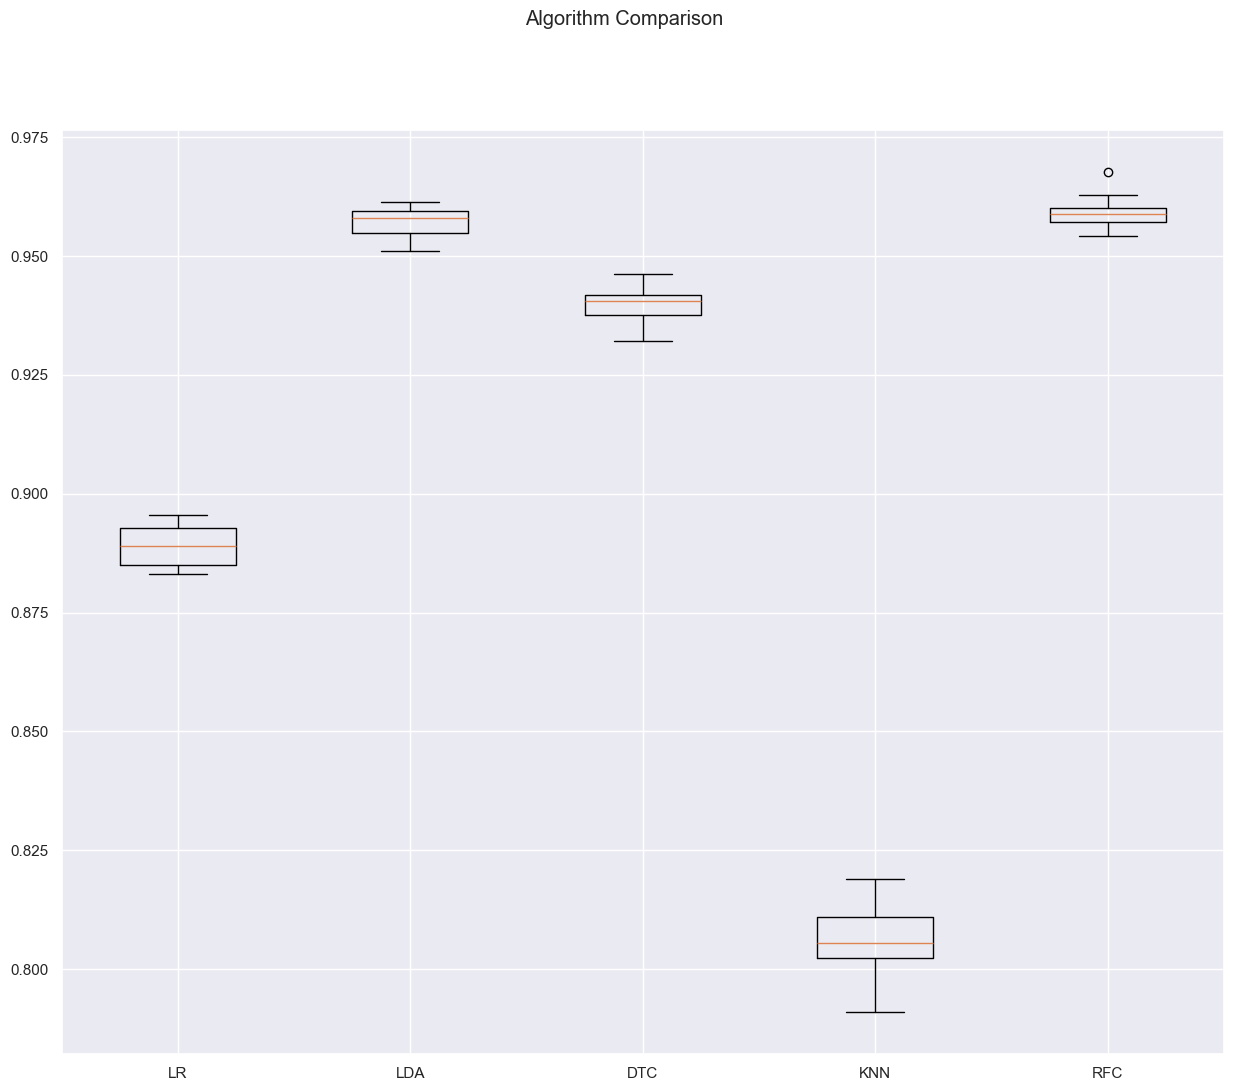

In [168]:
X2 = X2_train
Y2 = y2_train


seed = 7

models = []
models.append(('LR'  , LogisticRegression        ()))
models.append(('LDA' , LinearDiscriminantAnalysis()))
models.append(('DTC' , DecisionTreeClassifier    ()))
models.append(('KNN' , KNeighborsClassifier      ()))
models.append(('RFC' , RandomForestClassifier    ()))


results = []
names   = []
scoring = "accuracy"

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True )
    cv_results = model_selection.cross_val_score(model, X2, Y2, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

fig = plt.figure()
fig.set_size_inches(15, 12)
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# ELECCIÓN DE PREDICTOR

Tomamos RandomForestClassifier ya que es el mejor predictor y realizamos un grid de parámetros para ajustarlo mejor. Definimos una lista de valores que queremos probar para los hiperparámetros de RandomForestClassifier. 

Estamos buscando optimizar los hiperparámetros del modelo RandomForestClassifier GridSearchCV. 

Es una técnica de búsqueda sistemática que te permite especificar un conjunto de hiperparámetros que deseas ajustar y una cuadrícula de valores para cada hiperparámetro. GridSearchCV realiza una búsqueda exhaustiva a través de todas las combinaciones posibles de hiperparámetros, utilizando la validación cruzada para evaluar el rendimiento de cada combinación.

Esto te ayudará a encontrar la combinación de hiperparámetros que produzca el mejor rendimiento para tu problema de clasificación. 

In [169]:
# Creamos una instancia de RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

Definimos nuestro modelo rf_classifier:

In [170]:
param_grid = {
    'n_estimators': [10, 50, 100],  # Número de árboles en el bosque
    'max_depth': [None, 10, 20, 30],    # Profundidad máxima de los árboles
    'min_samples_split': [2, 5, 10],  # Número mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 4],    # Número mínimo de muestras por hoja
    'bootstrap': [True, False],       # Uso de bootstrap
    'max_features': ['auto', 'sqrt', 'log2'],  # Número de características a considerar en cada división
    'criterion': ['gini', 'entropy'],  # Función de impureza para medir la calidad de una división
}


'n_estimators': Este hiperparámetro representa el número de árboles en el bosque aleatorio. Los valores [10, 50, 100] indican que se probarán tres opciones diferentes para el número de árboles en el bosque: 10, 50 y 100.

'max_depth': Este hiperparámetro controla la profundidad máxima de los árboles de decisión individuales en el bosque. None significa que los árboles no tienen restricción en la profundidad. Los valores [None, 10, 20, 30] indican que se probarán cuatro opciones diferentes para la profundidad máxima: sin restricción, 10, 20 y 30.

'min_samples_split': Este hiperparámetro especifica el número mínimo de muestras requeridas para dividir un nodo interno del árbol. Los valores [2, 5, 10] indican que se probarán tres opciones diferentes para el número mínimo de muestras para dividir un nodo.

'min_samples_leaf': Este hiperparámetro establece el número mínimo de muestras requeridas para formar una hoja (nodo terminal) en el árbol. Los valores [1, 2, 4] indican que se probarán tres opciones diferentes para el número mínimo de muestras por hoja.

'bootstrap': Este hiperparámetro controla si se utiliza el muestreo con reemplazo (bootstrap) al construir árboles individuales. True significa que se permite el muestreo con reemplazo, mientras que False significa que no se permite. Por lo tanto, esta cuadrícula explora dos opciones: bootstrap habilitado y bootstrap deshabilitado.

'max_features': Este hiperparámetro controla el número de características que se deben considerar al dividir un nodo. Las opciones 'auto', 'sqrt' y 'log2' son comunes y ajustan automáticamente el número de características según el número de características totales en tus datos.

'criterion': Este hiperparámetro determina la función de impureza que se utiliza para medir la calidad de una división en los árboles de decisión. Las opciones comunes son 'gini' y 'entropy'.

Ahora, creamos una instancia de GridSearchCV. Usaremos cv=5 para especificar una validación cruzada de 5 veces:

In [171]:
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5)

Finalmente, ajustamos el modelo con nuestros datos de entrenamiento y evaluamos el modelo con los datos de prueba:

In [172]:
grid_search.fit(X2_train, y2_train)


c:\Users\aam05683h\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
2160 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2160 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\aam05683h\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\aam05683h\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\aam05683h\AppData\Local\Programs\Python\Python312\Lib\site-pa

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100]})

In [173]:
# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_

In [174]:
print("Mejor parámetro:", grid_search.best_params_)
print("Puntuación de entrenamiento:", grid_search.best_score_)
print("Puntuación de prueba:", grid_search.score(X2_test, y2_test))

Mejor parámetro: {'bootstrap': False, 'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Puntuación de entrenamiento: 0.9591146728177791
Puntuación de prueba: 0.961920321729295


Construimos el nuevo modelo utilizando los mejores hiperparámetros encontrados

In [175]:
best_rf_classifier = RandomForestClassifier(**best_params)

In [176]:
# Entrenar el nuevo modelo utilizando todos los datos de entrenamiento
best_rf_classifier.fit(X2_train, y2_train)

RandomForestClassifier(bootstrap=False, max_depth=20, min_samples_leaf=2,
                       min_samples_split=5)

Vamos a crear un DataFrame para comparar los resultados con los datos reales

In [177]:
# Predecir utilizando el conjunto de entrenamiento
y_pred_train = best_rf_classifier.predict(X2_train)

In [178]:
# Predecir utilizando el conjunto de prueba
y_pred_test = best_rf_classifier.predict(X2_test)

In [179]:
y_pred_test

array([ True,  True, False, ...,  True,  True,  True])

In [180]:
data = {'y_pred_train': y_pred_train}
Resultados = pd.DataFrame(data)

In [181]:
import pandas as pd
from tabulate import tabulate
print(tabulate(Resultados, headers='keys', tablefmt='pretty'))

+-------+--------------+
|       | y_pred_train |
+-------+--------------+
|   0   |    False     |
|   1   |     True     |
|   2   |     True     |
|   3   |     True     |
|   4   |     True     |
|   5   |    False     |
|   6   |     True     |
|   7   |     True     |
|   8   |     True     |
|   9   |     True     |
|  10   |    False     |
|  11   |    False     |
|  12   |     True     |
|  13   |     True     |
|  14   |     True     |
|  15   |    False     |
|  16   |    False     |
|  17   |    False     |
|  18   |     True     |
|  19   |    False     |
|  20   |     True     |
|  21   |    False     |
|  22   |     True     |
|  23   |     True     |
|  24   |    False     |
|  25   |     True     |
|  26   |     True     |
|  27   |     True     |
|  28   |    False     |
|  29   |    False     |
|  30   |    False     |
|  31   |     True     |
|  32   |     True     |
|  33   |     True     |
|  34   |     True     |
|  35   |    False     |
|  36   |    False     |


In [182]:
ComparadorResultados= pd.merge(TablaIndice,Resultados, how='left', on=None, left_on=None, right_on=None,
         left_index=True, right_index=True, sort=True)

In [183]:
ComparadorResultados

TEAM_ID_Home   GAME_ID  VICTORY_Yes_Home  TEAM_ID_Visitor  \
0        1610612762  10300001              True       1610612742   
1        1610612763  10300002              True       1610612749   
2        1610612765  10300003             False       1610612739   
3        1610612742  10300004              True       1610612753   
4        1610612757  10300005              True       1610612745   
...             ...       ...               ...              ...   
26516    1610612737  52100111              True       1610612766   
26517    1610612750  52100121              True       1610612746   
26518    1610612740  52100131              True       1610612759   
26519    1610612739  52100201             False       1610612737   
26520    1610612746  52100211             False       1610612740   

       VICTORY_Yes_Visitor y_pred_train  
0                    False        False  
1                    False         True  
2                     True         True  
3                    False         True  
4                    False         True  
...                    ...          ...  
26516                False          NaN  
26517                False          NaN  
26518                False          NaN  
26519                 True          NaN  
26520                 True          NaN  

[26521 rows x 6 columns]

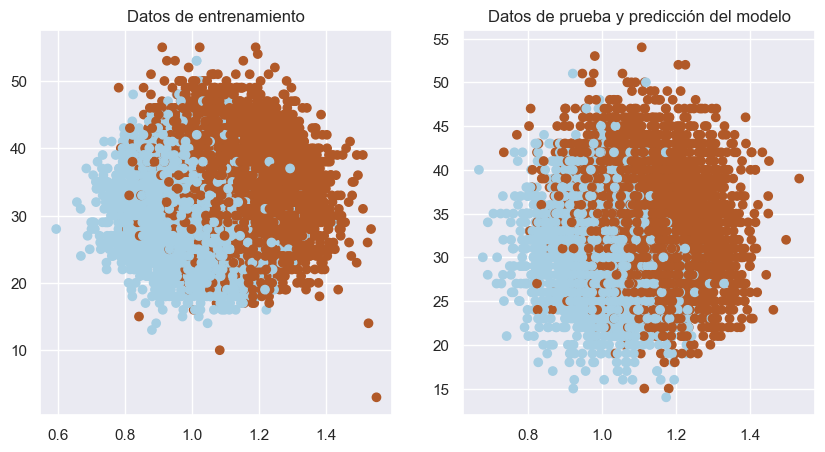

In [184]:
# graficar los datos de entrenamiento, los datos de prueba y la predicción del modelo
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

# graficar los datos de entrenamiento
ax1.scatter(X2_train.values[:, 0], X2_train.values[:, 1], c=y2_train, cmap=plt.cm.Paired)
ax1.set_title('Datos de entrenamiento')

# graficar los datos de prueba y la predicción del modelo
ax2.scatter(X2_test.values[:, 0], X2_test.values[:, 1], c=y_pred_test, cmap=plt.cm.Paired)
ax2.set_title('Datos de prueba y predicción del modelo')

plt.show()

Este gráfico muestra dos gráficos de dispersión, uno para los datos de entrenamiento y otro para los datos de prueba y la predicción del modelo.

En el gráfico de la izquierda, se muestran los datos de entrenamiento. Cada punto representa un ejemplo de entrenamiento, donde la posición en el eje x corresponde a la primera característica y la posición en el eje y corresponde a la segunda característica. El color de cada punto indica la etiqueta correspondiente (clase).

En el gráfico de la derecha, se muestran los datos de prueba y la predicción del modelo. De nuevo, cada punto representa un ejemplo, donde la posición en el eje x corresponde a la primera característica y la posición en el eje y corresponde a la segunda característica. El color de cada punto indica la predicción del modelo correspondiente (clase). La precisión del modelo se puede evaluar comparando las etiquetas reales (y_test) con las predicciones del modelo (y_pred_test). Si la precisión es alta, las predicciones del modelo coincidirán con las etiquetas reales en la mayoría de los puntos. Si la precisión es baja, habrá muchos puntos con etiquetas diferentes a las predicciones del modelo.

El gráfico muestra los datos de entrenamiento y los datos de prueba en dos gráficos de dispersión separados. En el gráfico de la izquierda, se pueden ver los puntos que se utilizaron para entrenar el modelo. Estos puntos tienen dos características, que se muestran en los ejes x e y. El color de cada punto indica la clase a la que pertenece: azul para la clase 0 y naranja para la clase 1.

El objetivo del modelo es aprender a separar estos dos grupos de puntos, de manera que pueda predecir la clase de un punto nuevo en función de sus características. Después de entrenar el modelo, se utiliza para predecir la clase de los puntos en los datos de prueba, que se muestran en el gráfico de la derecha. De nuevo, cada punto tiene dos características, pero esta vez el color indica la predicción del modelo en lugar de la clase real. Si el modelo funciona bien, los puntos azules y naranjas estarán separados por una línea o una curva, y las predicciones del modelo coincidirán con la clase real en la mayoría de los puntos.

En resumen, este gráfico es una forma de visualizar cómo se comporta el modelo en los datos de entrenamiento y de prueba. Si los puntos en el gráfico de la derecha están bien separados y las predicciones del modelo coinciden con la clase real en la mayoría de los puntos, entonces podemos decir que el modelo funciona bien. Si los puntos están mezclados y las predicciones del modelo son incorrectas en muchos puntos, entonces es posible que el modelo necesite ajustarse o que las características utilizadas no sean adecuadas para distinguir entre las dos clases.

### Evaluamos el modelo

In [185]:
# Utilizamos el modelo para hacer predicciones en el conjunto de prueba
y_pred = best_rf_classifier.predict(X2_test)

# Finalmente, se obtienen las métricas de precisión, recall y F1-score para cada clase:
reporte = classification_report(y2_test, y_pred)
print(reporte)

              precision    recall  f1-score   support

       False       0.96      0.95      0.95      3275
        True       0.96      0.97      0.97      4682

    accuracy                           0.96      7957
   macro avg       0.96      0.96      0.96      7957
weighted avg       0.96      0.96      0.96      7957



Interpretación de la métrica:

1. Precisión (Precision):
Clase False (derrota): El valor de precisión para esta clase es 0.96, lo que significa que el 96% de las veces que el modelo predijo que un equipo perdería un partido (predicción negativa), esa predicción fue correcta. Es decir, el modelo está cometiendo pocos falsos positivos al predecir derrotas.
Clase True (victoria): Aquí también tenemos una precisión de 0.96, lo que indica que cuando el modelo predijo una victoria, acertó el 96% de las veces. El modelo está cometiendo pocos falsos positivos al predecir victorias.
2. Exhaustividad (Recall):
Clase False (derrota): El recall de 0.95 significa que el modelo identificó correctamente el 95% de los partidos que se perdieron realmente. Esto implica que el modelo está capturando bien las derrotas, aunque podría dejar escapar un pequeño porcentaje (falsos negativos).
Clase True (victoria): El valor de 0.97 indica que el modelo acertó el 97% de las veces cuando un equipo realmente ganó. El recall es un indicador de qué tan bien el modelo está capturando las victorias, y este valor sugiere que es bastante confiable en hacerlo.
3. F1-score:
Clase False (derrota): El F1-score de 0.95 indica que el modelo tiene un buen equilibrio entre precisión y recall cuando predice derrotas. Captura bien tanto las derrotas como evita predecirlas incorrectamente.
Clase True (victoria): Con un F1-score de 0.97, el modelo tiene un excelente rendimiento al predecir las victorias, encontrando un balance adecuado entre precisión y recall.
4. Soporte (Support):
Clase False: Hay 3275 partidos en los datos donde el equipo perdió, mientras que hay 4682 partidos donde el equipo ganó (Clase True). Esto significa que tu conjunto de datos tiene un ligero desbalance a favor de las victorias, lo que puede influir en las predicciones.
5. Precisión global (Accuracy):
El 96% de todas las predicciones (tanto de victorias como de derrotas) fueron correctas, lo que sugiere que el modelo tiene un buen rendimiento general.
6. Macro Avg:
Esto representa la media simple de las métricas de precisión, recall y F1-score entre ambas clases (victoria y derrota), sin tener en cuenta el número de ejemplos en cada clase. Aquí, es 0.96 en general, lo que sugiere que el modelo es consistente en ambas clases.
7. Weighted Avg:
La media ponderada toma en cuenta el número de ejemplos en cada clase (más victorias que derrotas) y proporciona una precisión global ajustada. Aquí, también es 0.96, lo que indica que incluso con el desbalance en las clases, el modelo sigue siendo bastante preciso.

Conclusión en el contexto de predicción de victorias/derrotas en la NBA:

El modelo tiene un rendimiento excelente para predecir correctamente si un equipo ganará o perderá un partido. Con una precisión del 96% en ambas clases, es muy confiable tanto al predecir victorias como derrotas.
El recall de 0.97 en la clase de victorias significa que el modelo es especialmente eficaz en capturar los partidos que efectivamente ganarán los equipos, lo cual es crítico para el objetivo del proyecto.
Con un F1-score elevado en ambas clases, el modelo tiene un buen equilibrio entre no perder muchas predicciones importantes (recall alto) y evitar falsos positivos (precisión alta).
Este informe indica que el modelo tiene una capacidad bastante alta para predecir correctamente los resultados de los partidos de la NBA, con una ligera ventaja en la predicción de victorias. Esto sería extremadamente útil para equipos que desean ajustar sus estrategias en función de las predicciones, o para el sector de apuestas que necesita evaluar correctamente las probabilidades de un equipo para ganar

## Calculamos la media de cada jugador de los tres últimos años

Cogemos los 3 últimos años de cada jugador pq interpretamos que son los que más se van a aparecer para el cálculo del nuevo año. Cada año hay muchos jugadores que cambian de equipo por lo que los jugadores serían diferentes en cada uno de ellos. La idea es que cogiendo la media de los 3 últimos años tendríamos las estadísticas de cada jugador por lo que podríamos crear las estadísticas de cada equipo sumando la de todos los jugadores que van a integrarlo. Por eso el cálculo de las estadísticas de cada equipo está basado en la suma de todos los jugadores.

In [186]:
GD_Players = pd.merge(GD,seasons,on="GAME_ID")

Quitamos los campos game ID, team ID, plus_minus y nickname que no nos sirven de nada y alguno de ellos tienen nulos

In [187]:
GD_Players.head()

GAME_ID     TEAM_ID  PLAYER_ID NICKNAME    MIN  FGM   FGA  FG_PCT  FG3M  \
0  22200477  1610612759    1629641    Romeo  18:06  1.0   1.0   1.000   0.0   
1  22200477  1610612759    1631110   Jeremy  31:01  7.0  14.0   0.500   2.0   
2  22200477  1610612759    1627751    Jakob  21:42  6.0   9.0   0.667   0.0   
3  22200477  1610612759    1630170    Devin  30:20  4.0  13.0   0.308   1.0   
4  22200477  1610612759    1630200      Tre  27:44  7.0  12.0   0.583   1.0   

   FG3A  FG3_PCT  FTM   FTA  FT_PCT  OREB  DREB  REB  AST  STL  BLK   TO   PF  \
0   0.0    0.000  0.0   0.0     0.0   1.0   1.0  2.0  0.0  1.0  0.0  2.0  5.0   
1   4.0    0.500  7.0  10.0     0.7   6.0   3.0  9.0  6.0  1.0  0.0  2.0  1.0   
2   0.0    0.000  1.0   1.0     1.0   1.0   3.0  4.0  1.0  1.0  0.0  2.0  4.0   
3   6.0    0.167  1.0   1.0     1.0   0.0   9.0  9.0  5.0  3.0  0.0  2.0  1.0   
4   3.0    0.333  4.0   4.0     1.0   0.0   2.0  2.0  3.0  0.0  0.0  2.0  2.0   

    PTS  SEASON  
0   2.0    2022  
1  23.0    2022  
2  13.0    2022  
3  10.0    2022  
4  19.0    2022

Puede que algun jugador hay estado lesionado algún partido y no tenga dato. Por lo que debemos quitarlo para que al hacer la medio no nos salga nulo las estadísticas del jugador.

Se hace una matriz con todos los jugadores que tienen algún dato nulo

In [188]:
nan_Players = GD_Players[GD_Players.isnull().any(axis=1)]

In [189]:
nan_Players

GAME_ID     TEAM_ID  PLAYER_ID  NICKNAME  MIN  FGM   FGA  FG_PCT  \
13      22200477  1610612759     203476    Gorgui  NaN  NaN   NaN     NaN   
51      22200478  1610612762    1630695     Micah  NaN  NaN   NaN     NaN   
62      22200466  1610612749     203648  Thanasis  NaN  NaN   NaN     NaN   
63      22200466  1610612749     201588    George  NaN  NaN   NaN     NaN   
64      22200466  1610612749     201586     Serge  NaN  NaN   NaN     NaN   
...          ...         ...        ...       ...  ...  ...   ...     ...   
668334  11200005  1610612743     202706       NaN   19  4.0   9.0   0.444   
668335  11200005  1610612743     202702       NaN   23  7.0  11.0   0.636   
668336  11200005  1610612743     201585       NaN   15  3.0   7.0   0.429   
668337  11200005  1610612743     202389       NaN   19  1.0   1.0   1.000   
668338  11200005  1610612743     201951       NaN   27  3.0   6.0   0.500   

        FG3M  FG3A  FG3_PCT  FTM  FTA  FT_PCT  OREB  DREB  REB  AST  STL  BLK  \
13       NaN   NaN      NaN  NaN  NaN     NaN   NaN   NaN  NaN  NaN  NaN  NaN   
51       NaN   NaN      NaN  NaN  NaN     NaN   NaN   NaN  NaN  NaN  NaN  NaN   
62       NaN   NaN      NaN  NaN  NaN     NaN   NaN   NaN  NaN  NaN  NaN  NaN   
63       NaN   NaN      NaN  NaN  NaN     NaN   NaN   NaN  NaN  NaN  NaN  NaN   
64       NaN   NaN      NaN  NaN  NaN     NaN   NaN   NaN  NaN  NaN  NaN  NaN   
...      ...   ...      ...  ...  ...     ...   ...   ...  ...  ...  ...  ...   
668334   3.0   6.0      0.5  6.0  7.0   0.857   0.0   2.0  2.0  0.0  2.0  0.0   
668335   0.0   0.0      0.0  4.0  4.0   1.000   1.0   0.0  1.0  1.0  1.0  0.0   
668336   0.0   0.0      0.0  0.0  0.0   0.000   3.0   5.0  8.0  0.0  1.0  0.0   
668337   0.0   0.0      0.0  0.0  2.0   0.000   1.0   2.0  3.0  1.0  0.0  0.0   
668338   0.0   0.0      0.0  2.0  4.0   0.500   0.0   2.0  2.0  6.0  2.0  0.0   

         TO   PF   PTS  SEASON  
13      NaN  NaN   NaN    2022  
51      NaN  NaN   NaN    2022  
62      NaN  NaN   NaN    2022  
63      NaN  NaN   NaN    2022  
64      NaN  NaN   NaN    2022  
...     ...  ...   ...     ...  
668334  1.0  3.0  17.0    2012  
668335  3.0  3.0  18.0    2012  
668336  0.0  3.0   6.0    2012  
668337  4.0  2.0   2.0    2012  
668338  6.0  1.0   8.0    2012  

[624943 rows x 24 columns]

Por lo que voy a quitar de nuestra matriz el dato del jugador del partido no jugado. El jugador sigue teniendo estadísticas pero no de ese partido

In [190]:
GD_Players.dropna(subset=["MIN"], inplace=True)

In [191]:
GD_Players

GAME_ID     TEAM_ID  PLAYER_ID NICKNAME    MIN  FGM   FGA  FG_PCT  \
0       22200477  1610612759    1629641    Romeo  18:06  1.0   1.0   1.000   
1       22200477  1610612759    1631110   Jeremy  31:01  7.0  14.0   0.500   
2       22200477  1610612759    1627751    Jakob  21:42  6.0   9.0   0.667   
3       22200477  1610612759    1630170    Devin  30:20  4.0  13.0   0.308   
4       22200477  1610612759    1630200      Tre  27:44  7.0  12.0   0.583   
...          ...         ...        ...      ...    ...  ...   ...     ...   
668334  11200005  1610612743     202706      NaN     19  4.0   9.0   0.444   
668335  11200005  1610612743     202702      NaN     23  7.0  11.0   0.636   
668336  11200005  1610612743     201585      NaN     15  3.0   7.0   0.429   
668337  11200005  1610612743     202389      NaN     19  1.0   1.0   1.000   
668338  11200005  1610612743     201951      NaN     27  3.0   6.0   0.500   

        FG3M  FG3A  FG3_PCT  FTM   FTA  FT_PCT  OREB  DREB  REB  AST  STL  \
0        0.0   0.0    0.000  0.0   0.0   0.000   1.0   1.0  2.0  0.0  1.0   
1        2.0   4.0    0.500  7.0  10.0   0.700   6.0   3.0  9.0  6.0  1.0   
2        0.0   0.0    0.000  1.0   1.0   1.000   1.0   3.0  4.0  1.0  1.0   
3        1.0   6.0    0.167  1.0   1.0   1.000   0.0   9.0  9.0  5.0  3.0   
4        1.0   3.0    0.333  4.0   4.0   1.000   0.0   2.0  2.0  3.0  0.0   
...      ...   ...      ...  ...   ...     ...   ...   ...  ...  ...  ...   
668334   3.0   6.0    0.500  6.0   7.0   0.857   0.0   2.0  2.0  0.0  2.0   
668335   0.0   0.0    0.000  4.0   4.0   1.000   1.0   0.0  1.0  1.0  1.0   
668336   0.0   0.0    0.000  0.0   0.0   0.000   3.0   5.0  8.0  0.0  1.0   
668337   0.0   0.0    0.000  0.0   2.0   0.000   1.0   2.0  3.0  1.0  0.0   
668338   0.0   0.0    0.000  2.0   4.0   0.500   0.0   2.0  2.0  6.0  2.0   

        BLK   TO   PF   PTS  SEASON  
0       0.0  2.0  5.0   2.0    2022  
1       0.0  2.0  1.0  23.0    2022  
2       0.0  2.0  4.0  13.0    2022  
3       0.0  2.0  1.0  10.0    2022  
4       0.0  2.0  2.0  19.0    2022  
...     ...  ...  ...   ...     ...  
668334  0.0  1.0  3.0  17.0    2012  
668335  0.0  3.0  3.0  18.0    2012  
668336  0.0  0.0  3.0   6.0    2012  
668337  0.0  4.0  2.0   2.0    2012  
668338  0.0  6.0  1.0   8.0    2012  

[558670 rows x 24 columns]

Creamos la media de cada jugador de los últimos 3 años

In [192]:
GD_PlayersAgrupado = GD_Players[GD_Players["SEASON"]>=2019]

Quito el campo Season para que me haga la media de los 3 años juntos

In [193]:
GD_PlayersAgrupado= GD_PlayersAgrupado.drop(['SEASON'],axis=1)

Hacemos un GroupBy para hacer la media de las estadísticas de los jugadores y quito los campos que no me hacen falta

In [194]:
print(GD_PlayersAgrupado.dtypes)

GAME_ID        int64
TEAM_ID        int64
PLAYER_ID      int64
NICKNAME      object
MIN           object
FGM          float64
FGA          float64
FG_PCT       float64
FG3M         float64
FG3A         float64
FG3_PCT      float64
FTM          float64
FTA          float64
FT_PCT       float64
OREB         float64
DREB         float64
REB          float64
AST          float64
STL          float64
BLK          float64
TO           float64
PF           float64
PTS          float64
dtype: object


In [195]:
GD_PlayersAgrupado= GD_PlayersAgrupado.drop(['NICKNAME','MIN'],axis=1)

In [196]:
GD_PlayersAgrupado = GD_PlayersAgrupado.groupby(['PLAYER_ID']).mean()

In [197]:
GD_PlayersAgrupado

GAME_ID       TEAM_ID       FGM        FGA    FG_PCT  \
PLAYER_ID                                                              
1713       2.113125e+07  1.610613e+09  1.861538   5.123077  0.332385   
2037       2.190126e+07  1.610613e+09  2.000000   4.000000  0.500000   
2199       2.156691e+07  1.610613e+09  0.566667   0.766667  0.350000   
2207       1.394013e+07  1.610613e+09  1.600000   3.400000  0.494200   
2544       2.380343e+07  1.610613e+09  9.867521  19.393162  0.505628   
...                 ...           ...       ...        ...       ...   
1631348    1.220000e+07  1.610613e+09  0.000000   0.000000  0.000000   
1631351    1.220001e+07  1.610613e+09  1.000000   2.000000  0.500000   
1631367    1.220000e+07  1.610613e+09  0.000000   1.000000  0.000000   
1631368    1.220000e+07  1.610613e+09  1.000000   1.000000  1.000000   
1631371    1.220006e+07  1.610613e+09  0.000000   0.000000  0.000000   

               FG3M      FG3A   FG3_PCT       FTM       FTA    FT_PCT  \
PLAYER_ID                                                               
1713       1.107692  3.492308  0.245215  0.400000  0.492308  0.178200   
2037       1.000000  2.000000  0.500000  0.000000  0.000000  0.000000   
2199       0.000000  0.000000  0.000000  0.366667  0.700000  0.150000   
2207       0.200000  1.200000  0.200000  0.000000  0.000000  0.000000   
2544       2.307692  6.564103  0.328449  4.132479  5.756410  0.711538   
...             ...       ...       ...       ...       ...       ...   
1631348    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1631351    1.000000  2.000000  0.500000  2.000000  2.000000  1.000000   
1631367    0.000000  1.000000  0.000000  0.000000  0.000000  0.000000   
1631368    0.000000  0.000000  0.000000  1.000000  2.000000  0.500000   
1631371    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

               OREB      DREB       REB       AST       STL       BLK  \
PLAYER_ID                                                               
1713       0.276923  1.784615  2.061538  0.769231  0.384615  0.384615   
2037       0.000000  0.000000  0.000000  3.000000  0.000000  0.000000   
2199       0.933333  1.600000  2.533333  0.233333  0.200000  0.366667   
2207       0.200000  1.400000  1.600000  0.600000  0.200000  0.200000   
2544       1.008547  6.982906  7.991453  7.871795  1.179487  0.675214   
...             ...       ...       ...       ...       ...       ...   
1631348    0.000000  1.000000  1.000000  0.000000  0.000000  0.000000   
1631351    0.000000  1.000000  1.000000  1.000000  1.000000  0.000000   
1631367    1.000000  1.000000  2.000000  1.000000  1.000000  0.000000   
1631368    2.000000  0.000000  2.000000  0.000000  0.000000  0.000000   
1631371    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

                 TO        PF        PTS  
PLAYER_ID                                 
1713       0.600000  1.553846   5.230769  
2037       0.000000  1.000000   5.000000  
2199       0.400000  1.333333   1.500000  
2207       0.600000  1.000000   3.400000  
2544       3.615385  1.782051  26.175214  
...             ...       ...        ...  
1631348    0.000000  0.000000   0.000000  
1631351    0.000000  1.000000   5.000000  
1631367    3.000000  1.000000   0.000000  
1631368    1.000000  0.000000   3.000000  
1631371    0.000000  0.000000   0.000000  

[968 rows x 20 columns]

## Puntuaciones Rookies

Las estadísticas medias de un rookie en la NBA en su primer año pueden variar significativamente según su ranking en el draft NBA, ya que los jugadores seleccionados en las primeras posiciones del draft tienden a tener mayores expectativas y oportunidades para jugar que los seleccionados en posiciones más bajas.

A continuación se presentan las estadísticas medias de los rookies en su primer año en la NBA para las selecciones del draft NBA de los últimos años (2018-2021) según su posición en el draft:

Es importante tener en cuenta que estas estadísticas son solo promedios y que hay muchos factores que pueden influir en el rendimiento de un rookie en su primer año en la NBA, como la posición en la que juega, el equipo en el que juega, la cantidad de minutos que juega, la lesiones, entre otros

Vamos a extraer los rookies de las estadísticas para hacer las medias según el Draft. Hemos sacado de internet los nombres de los Draft desde 2018 hasta 2021. La idea es coger todos estos en su temporada de Rookie y agruparlo por posicion de draft y tener las estadísticas medias de los rookies en su temporada de iniciación.

In [198]:
Rookies = pd.read_csv('C:\\Users\\aam05683h\\Desktop\\dataset Rookie.csv')

In [199]:
dt_Rookie = pd.merge(Rookies, GD_Players,on="PLAYER_ID")

In [200]:
dt_Rookie

Pick               Jugador  PLAYER_ID   Pos.  ROOKIE  DRAFT   GAME_ID  \
0         1       Zion Williamson    1629627     PF  ROOKIE   2019  22200457   
1         1       Zion Williamson    1629627     PF  ROOKIE   2019  22200444   
2         1       Zion Williamson    1629627     PF  ROOKIE   2019  22200426   
3         1       Zion Williamson    1629627     PF  ROOKIE   2019  22200412   
4         1       Zion Williamson    1629627     PF  ROOKIE   2019  22200395   
...     ...                   ...        ...    ...     ...    ...       ...   
30619    60  Kostas Antetokounmpo    1628961  Alero  ROOKIE   2018  21801092   
30620    60  Kostas Antetokounmpo    1628961  Alero  ROOKIE   2018  21801073   
30621    60  Kostas Antetokounmpo    1628961  Alero  ROOKIE   2018  11800071   
30622    60  Kostas Antetokounmpo    1628961  Alero  ROOKIE   2018  11800047   
30623    60  Kostas Antetokounmpo    1628961  Alero  ROOKIE   2018  11800028   

          TEAM_ID NICKNAME    MIN   FGM   FGA  FG_PCT  FG3M  FG3A  FG3_PCT  \
0      1610612740     Zion  40:08   7.0  16.0   0.438   0.0   0.0    0.000   
1      1610612740     Zion  39:03  12.0  15.0   0.800   0.0   1.0    0.000   
2      1610612740     Zion  41:33  12.0  24.0   0.500   1.0   1.0    1.000   
3      1610612740     Zion  25:41  10.0  16.0   0.625   0.0   2.0    0.000   
4      1610612740     Zion  42:11  14.0  21.0   0.667   2.0   3.0    0.667   
...           ...      ...    ...   ...   ...     ...   ...   ...      ...   
30619  1610612742      NaN   4:41   0.0   1.0   0.000   0.0   0.0    0.000   
30620  1610612742      NaN   5:53   0.0   2.0   0.000   0.0   0.0    0.000   
30621  1610612742      NaN   5:24   1.0   1.0   1.000   0.0   0.0    0.000   
30622  1610612742      NaN   8:23   0.0   0.0   0.000   0.0   0.0    0.000   
30623  1610612742      NaN   4:20   2.0   2.0   1.000   0.0   0.0    0.000   

       FTM   FTA  FT_PCT  OREB  DREB  REB  AST  STL  BLK   TO   PF   PTS  \
0      4.0   8.0   0.500   3.0   4.0  7.0  7.0  3.0  0.0  5.0  1.0  18.0   
1      6.0   7.0   0.857   0.0   3.0  3.0  9.0  0.0  1.0  6.0  4.0  30.0   
2      6.0   8.0   0.750   5.0   3.0  8.0  8.0  0.0  2.0  3.0  2.0  31.0   
3      6.0  10.0   0.600   3.0   6.0  9.0  5.0  2.0  0.0  4.0  3.0  26.0   
4      5.0   7.0   0.714   1.0   7.0  8.0  3.0  1.0  0.0  5.0  3.0  35.0   
...    ...   ...     ...   ...   ...  ...  ...  ...  ...  ...  ...   ...   
30619  1.0   2.0   0.500   0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0   1.0   
30620  1.0   2.0   0.500   0.0   1.0  1.0  0.0  2.0  0.0  1.0  0.0   1.0   
30621  2.0   2.0   1.000   1.0   1.0  2.0  0.0  0.0  1.0  0.0  1.0   4.0   
30622  1.0   2.0   0.500   1.0   1.0  2.0  3.0  0.0  1.0  0.0  1.0   1.0   
30623  2.0   4.0   0.500   0.0   0.0  0.0  0.0  1.0  0.0  0.0  1.0   6.0   

       SEASON  
0        2022  
1        2022  
2        2022  
3        2022  
4        2022  
...       ...  
30619    2018  
30620    2018  
30621    2018  
30622    2018  
30623    2018  

[30624 rows x 29 columns]

In [201]:
dt_RookieAgrupado = dt_Rookie[dt_Rookie["SEASON"]>=2018]

Quitamos variables que no nos interesan

In [202]:
dt_RookieAgrupado= dt_RookieAgrupado.drop(['GAME_ID','TEAM_ID','Pos.','ROOKIE','NICKNAME','Jugador'],axis=1)

Filtro para quedarme SOLO con la temporada de rookie de cada uno de ellos

In [203]:
dt_RookieAgrupado['Filtrado']=dt_RookieAgrupado['DRAFT']==dt_RookieAgrupado['SEASON']

In [204]:
dt_RookieAgrupado

Pick  PLAYER_ID  DRAFT    MIN   FGM   FGA  FG_PCT  FG3M  FG3A  FG3_PCT  \
0         1    1629627   2019  40:08   7.0  16.0   0.438   0.0   0.0    0.000   
1         1    1629627   2019  39:03  12.0  15.0   0.800   0.0   1.0    0.000   
2         1    1629627   2019  41:33  12.0  24.0   0.500   1.0   1.0    1.000   
3         1    1629627   2019  25:41  10.0  16.0   0.625   0.0   2.0    0.000   
4         1    1629627   2019  42:11  14.0  21.0   0.667   2.0   3.0    0.667   
...     ...        ...    ...    ...   ...   ...     ...   ...   ...      ...   
30619    60    1628961   2018   4:41   0.0   1.0   0.000   0.0   0.0    0.000   
30620    60    1628961   2018   5:53   0.0   2.0   0.000   0.0   0.0    0.000   
30621    60    1628961   2018   5:24   1.0   1.0   1.000   0.0   0.0    0.000   
30622    60    1628961   2018   8:23   0.0   0.0   0.000   0.0   0.0    0.000   
30623    60    1628961   2018   4:20   2.0   2.0   1.000   0.0   0.0    0.000   

       FTM   FTA  FT_PCT  OREB  DREB  REB  AST  STL  BLK   TO   PF   PTS  \
0      4.0   8.0   0.500   3.0   4.0  7.0  7.0  3.0  0.0  5.0  1.0  18.0   
1      6.0   7.0   0.857   0.0   3.0  3.0  9.0  0.0  1.0  6.0  4.0  30.0   
2      6.0   8.0   0.750   5.0   3.0  8.0  8.0  0.0  2.0  3.0  2.0  31.0   
3      6.0  10.0   0.600   3.0   6.0  9.0  5.0  2.0  0.0  4.0  3.0  26.0   
4      5.0   7.0   0.714   1.0   7.0  8.0  3.0  1.0  0.0  5.0  3.0  35.0   
...    ...   ...     ...   ...   ...  ...  ...  ...  ...  ...  ...   ...   
30619  1.0   2.0   0.500   0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0   1.0   
30620  1.0   2.0   0.500   0.0   1.0  1.0  0.0  2.0  0.0  1.0  0.0   1.0   
30621  2.0   2.0   1.000   1.0   1.0  2.0  0.0  0.0  1.0  0.0  1.0   4.0   
30622  1.0   2.0   0.500   1.0   1.0  2.0  3.0  0.0  1.0  0.0  1.0   1.0   
30623  2.0   4.0   0.500   0.0   0.0  0.0  0.0  1.0  0.0  0.0  1.0   6.0   

       SEASON  Filtrado  
0        2022     False  
1        2022     False  
2        2022     False  
3        2022     False  
4        2022     False  
...       ...       ...  
30619    2018      True  
30620    2018      True  
30621    2018      True  
30622    2018      True  
30623    2018      True  

[30551 rows x 24 columns]

In [205]:
dt_RookieAgrupado=dt_RookieAgrupado[dt_RookieAgrupado['Filtrado']==True]

In [206]:
dt_RookieAgrupado

Pick  PLAYER_ID  DRAFT    MIN   FGM   FGA  FG_PCT  FG3M  FG3A  FG3_PCT  \
92        1    1629627   2019  27:11  10.0  20.0   0.500   0.0   0.0      0.0   
93        1    1629627   2019  21:56  10.0  12.0   0.833   0.0   0.0      0.0   
94        1    1629627   2019  25:07   9.0  21.0   0.429   0.0   1.0      0.0   
95        1    1629627   2019  14:11   3.0   7.0   0.429   0.0   0.0      0.0   
96        1    1629627   2019  15:10   6.0   8.0   0.750   0.0   0.0      0.0   
...     ...        ...    ...    ...   ...   ...     ...   ...   ...      ...   
30619    60    1628961   2018   4:41   0.0   1.0   0.000   0.0   0.0      0.0   
30620    60    1628961   2018   5:53   0.0   2.0   0.000   0.0   0.0      0.0   
30621    60    1628961   2018   5:24   1.0   1.0   1.000   0.0   0.0      0.0   
30622    60    1628961   2018   8:23   0.0   0.0   0.000   0.0   0.0      0.0   
30623    60    1628961   2018   4:20   2.0   2.0   1.000   0.0   0.0      0.0   

       FTM   FTA  FT_PCT  OREB  DREB  REB  AST  STL  BLK   TO   PF   PTS  \
92     5.0   6.0   0.833   5.0   2.0  7.0  1.0  0.0  0.0  1.0  3.0  25.0   
93     4.0   7.0   0.571   0.0   2.0  2.0  2.0  0.0  0.0  0.0  0.0  24.0   
94     5.0  10.0   0.500   3.0   4.0  7.0  5.0  0.0  0.0  2.0  2.0  23.0   
95     1.0   2.0   0.500   1.0   4.0  5.0  0.0  0.0  0.0  3.0  2.0   7.0   
96     1.0   1.0   1.000   0.0   0.0  0.0  1.0  0.0  0.0  2.0  3.0  13.0   
...    ...   ...     ...   ...   ...  ...  ...  ...  ...  ...  ...   ...   
30619  1.0   2.0   0.500   0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0   1.0   
30620  1.0   2.0   0.500   0.0   1.0  1.0  0.0  2.0  0.0  1.0  0.0   1.0   
30621  2.0   2.0   1.000   1.0   1.0  2.0  0.0  0.0  1.0  0.0  1.0   4.0   
30622  1.0   2.0   0.500   1.0   1.0  2.0  3.0  0.0  1.0  0.0  1.0   1.0   
30623  2.0   4.0   0.500   0.0   0.0  0.0  0.0  1.0  0.0  0.0  1.0   6.0   

       SEASON  Filtrado  
92       2019      True  
93       2019      True  
94       2019      True  
95       2019      True  
96       2019      True  
...       ...       ...  
30619    2018      True  
30620    2018      True  
30621    2018      True  
30622    2018      True  
30623    2018      True  

[10085 rows x 24 columns]

Voy a agrupar para sacar las medias de cada Pick (posición en el Draft) desde 2018 a 2021.

In [207]:
dt_RookieAgrupado= dt_RookieAgrupado.drop(['DRAFT','SEASON','Filtrado'],axis=1)

In [208]:
dt_RookieAgrupado_Pick= dt_RookieAgrupado.drop(['PLAYER_ID'],axis=1)

Revisamos los tipos de cada variable para ver si se puedes agrupar

In [209]:
print(dt_RookieAgrupado_Pick.dtypes)

Pick         int64
MIN         object
FGM        float64
FGA        float64
FG_PCT     float64
FG3M       float64
FG3A       float64
FG3_PCT    float64
FTM        float64
FTA        float64
FT_PCT     float64
OREB       float64
DREB       float64
REB        float64
AST        float64
STL        float64
BLK        float64
TO         float64
PF         float64
PTS        float64
dtype: object


Convertimos el tipo object a float64

In [210]:
dt_RookieAgrupado= dt_RookieAgrupado.drop(['MIN'],axis=1)

In [211]:
dt_RookieAgrupado_Pick = dt_RookieAgrupado.groupby(['Pick']).mean()

In [212]:
dt_RookieAgrupado_Pick

PLAYER_ID       FGM        FGA    FG_PCT      FG3M      FG3A  \
Pick                                                                    
1     1.629863e+06  7.128099  14.888430  0.486293  1.227273  3.822314   
2     1.629703e+06  5.944000  12.676000  0.474280  1.092000  3.296000   
3     1.629847e+06  5.992509  13.573034  0.437704  1.378277  4.243446   
4     1.629901e+06  4.823529  10.152249  0.472007  0.996540  2.875433   
5     1.629764e+06  4.799257  11.866171  0.400688  1.427509  4.617100   
...            ...       ...        ...       ...       ...       ...   
56    1.629590e+06  1.300000   2.333333  0.395533  0.066667  0.266667   
57    1.629625e+06  1.022222   2.555556  0.268044  0.177778  0.844444   
58    1.630119e+06  1.121495   2.130841  0.386617  0.140187  0.476636   
59    1.629854e+06  1.600000   3.700000  0.278433  0.666667  1.533333   
60    1.630266e+06  1.187500   2.796875  0.308250  0.562500  1.406250   

       FG3_PCT       FTM       FTA    FT_PCT      OREB      DREB       REB  \
Pick                                                                         
1     0.189293  2.706612  3.595041  0.614814  1.752066  5.024793  6.776860   
2     0.259884  2.828000  3.824000  0.593996  1.284000  3.720000  5.004000   
3     0.270494  3.116105  4.535581  0.598828  1.348315  5.501873  6.850187   
4     0.302308  1.910035  2.567474  0.531561  1.401384  3.955017  5.356401   
5     0.282502  2.505576  3.133829  0.571532  0.702602  2.338290  3.040892   
...        ...       ...       ...       ...       ...       ...       ...   
56    0.066667  0.433333  0.866667  0.166667  0.500000  1.333333  1.833333   
57    0.066667  0.333333  0.533333  0.161111  0.711111  1.333333  2.044444   
58    0.062299  0.261682  0.485981  0.094701  1.065421  1.728972  2.794393   
59    0.230533  0.533333  0.766667  0.186667  0.466667  1.400000  1.866667   
60    0.247391  0.468750  0.796875  0.191016  0.250000  0.890625  1.140625   

           AST       STL       BLK        TO        PF        PTS  
Pick                                                               
1     3.144628  1.028926  0.673554  2.500000  2.537190  18.190083  
2     3.260000  0.620000  0.552000  2.196000  1.908000  15.808000  
3     4.187266  1.067416  0.726592  2.588015  2.198502  16.479401  
4     2.065744  0.889273  0.737024  1.667820  2.743945  12.553633  
5     4.721190  0.925651  0.249071  2.672862  2.237918  13.531599  
...        ...       ...       ...       ...       ...        ...  
56    0.433333  0.633333  0.333333  0.466667  0.833333   3.100000  
57    0.533333  0.177778  0.155556  0.555556  1.244444   2.555556  
58    0.476636  0.271028  0.373832  0.420561  1.196262   2.644860  
59    0.800000  0.333333  0.100000  0.733333  0.833333   4.400000  
60    0.656250  0.437500  0.109375  0.546875  0.765625   3.406250  

[60 rows x 19 columns]

Al coger estos datos tenemos que ver cual es la desviación típica que hay en cada pick

In [213]:
dt_RookieAgrupado_Player = dt_RookieAgrupado.groupby(['PLAYER_ID']).mean()

In [214]:
dt_RookieAgrupado_Player

Pick       FGM        FGA    FG_PCT      FG3M      FG3A   FG3_PCT  \
PLAYER_ID                                                                      
1628382    43.0  2.651163   6.034884  0.374244  1.046512  3.011628  0.270500   
1628960    21.0  1.837209   4.837209  0.299884  0.837209  2.604651  0.264814   
1628961    60.0  0.600000   1.200000  0.400000  0.000000  0.000000  0.000000   
1628962    27.0  0.444444   0.777778  0.263889  0.000000  0.000000  0.000000   
1628963     2.0  5.716418  11.432836  0.509567  0.462687  1.537313  0.228851   
...         ...       ...        ...       ...       ...       ...       ...   
1630595     1.0  6.703125  16.109375  0.408828  1.781250  5.671875  0.277297   
1630596     3.0  5.986842  11.789474  0.505816  0.328947  1.302632  0.155684   
1630598    55.0  3.055556   6.629630  0.440889  0.907407  2.796296  0.310685   
1630625    46.0  1.328767   3.150685  0.345959  0.191781  0.794521  0.098630   
1630686    60.0  1.944444   4.722222  0.324944  0.555556  1.722222  0.170667   

                FTM       FTA    FT_PCT      OREB      DREB       REB  \
PLAYER_ID                                                               
1628382    0.767442  0.965116  0.323163  0.523256  2.034884  2.558140   
1628960    1.255814  1.674419  0.400605  0.069767  0.511628  0.581395   
1628961    1.400000  2.400000  0.600000  0.400000  0.600000  1.000000   
1628962    0.444444  0.722222  0.138889  0.277778  0.777778  1.055556   
1628963    2.865672  4.164179  0.605761  2.641791  4.910448  7.552239   
...             ...       ...       ...       ...       ...       ...   
1630595    2.218750  2.625000  0.578656  0.906250  4.625000  5.531250   
1630596    2.342105  3.526316  0.588276  2.013158  6.184211  8.197368   
1630598    1.166667  1.611111  0.401407  0.981481  2.407407  3.388889   
1630625    0.410959  0.739726  0.190630  0.602740  1.287671  1.890411   
1630686    1.000000  1.888889  0.345833  0.388889  1.388889  1.777778   

                AST       STL       BLK        TO        PF        PTS  
PLAYER_ID                                                               
1628382    1.162791  0.372093  0.162791  0.395349  1.290698   7.116279  
1628960    0.720930  0.186047  0.139535  0.883721  1.279070   5.767442  
1628961    0.600000  0.600000  0.400000  0.200000  0.600000   2.600000  
1628962    0.000000  0.055556  0.333333  0.277778  0.722222   1.333333  
1628963    1.000000  0.522388  0.940299  1.552239  1.895522  14.761194  
...             ...       ...       ...       ...       ...        ...  
1630595    5.562500  1.218750  0.671875  3.656250  3.125000  17.406250  
1630596    2.486842  0.802632  1.671053  1.868421  2.236842  14.644737  
1630598    1.314815  0.666667  0.240741  1.037037  1.740741   8.185185  
1630625    1.575342  0.410959  0.191781  0.890411  1.000000   3.260274  
1630686    0.944444  0.722222  0.166667  1.277778  1.333333   5.444444  

[217 rows x 19 columns]

Revisamos la desviación típica


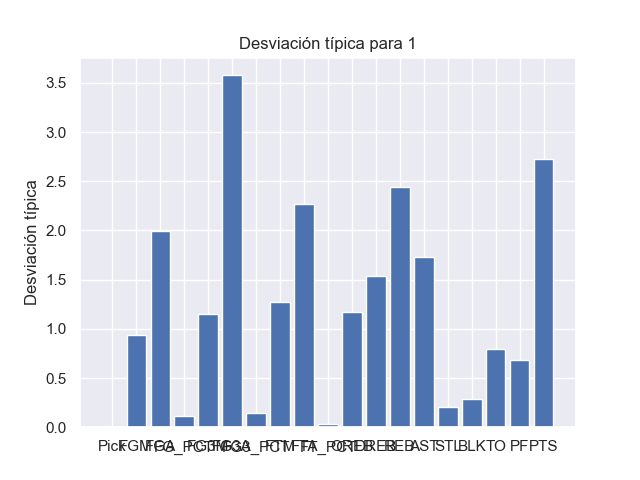
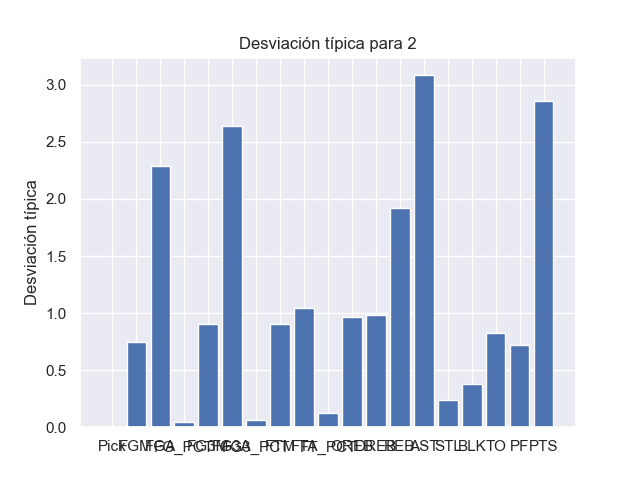
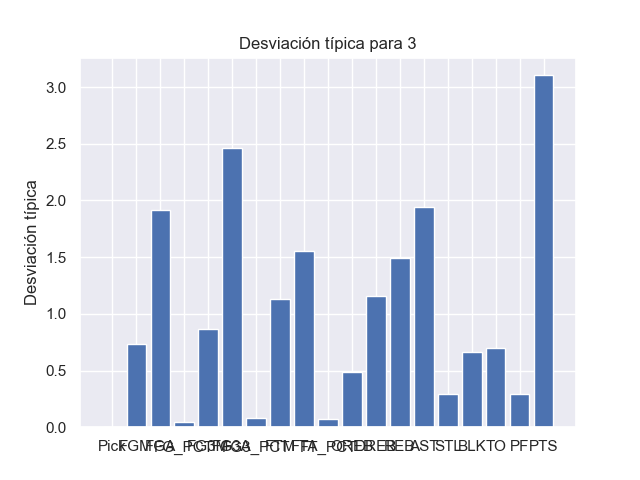
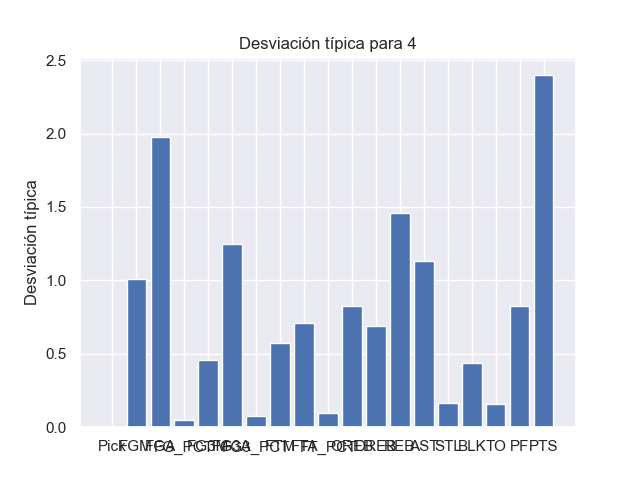
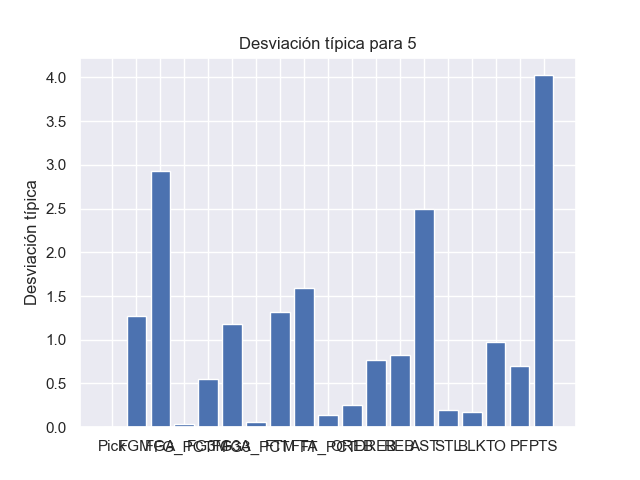
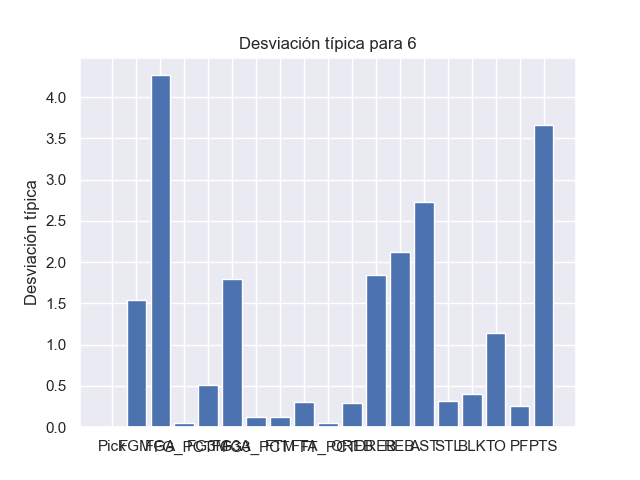
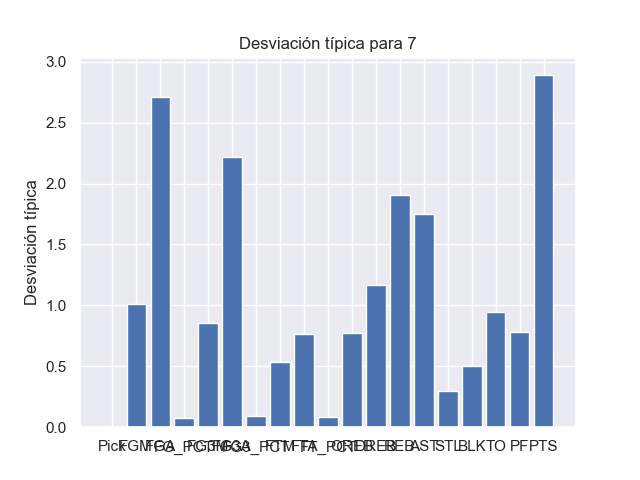
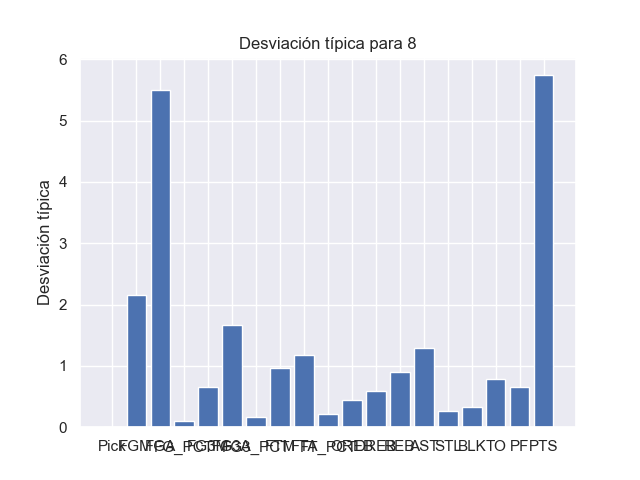
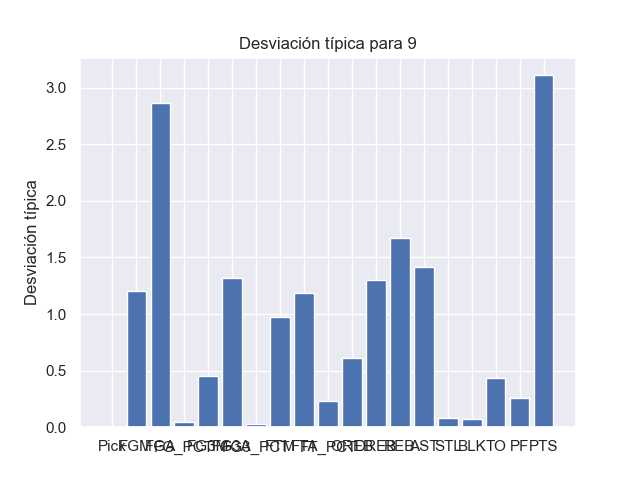
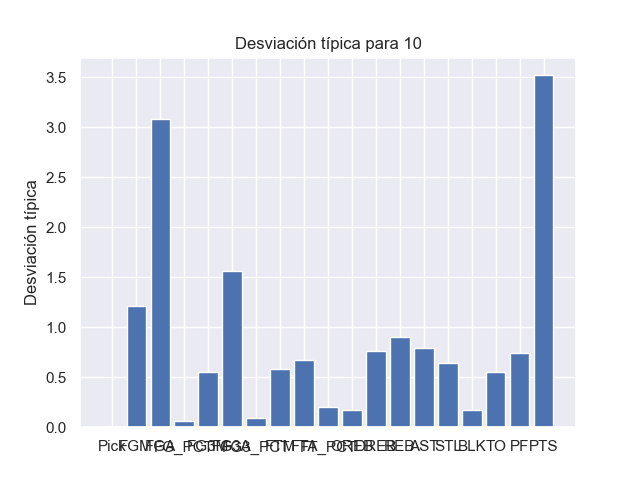
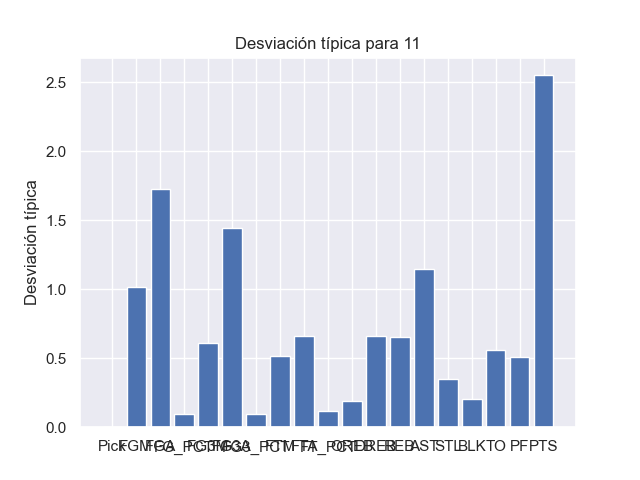
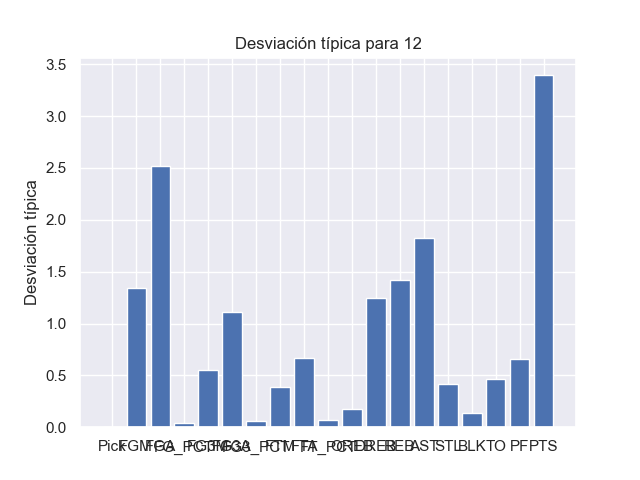
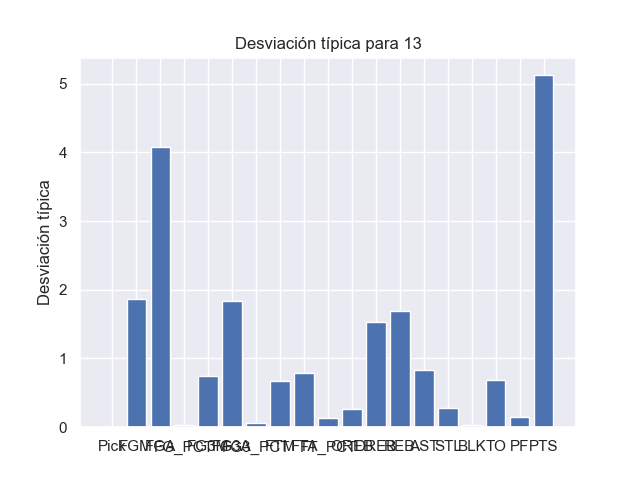
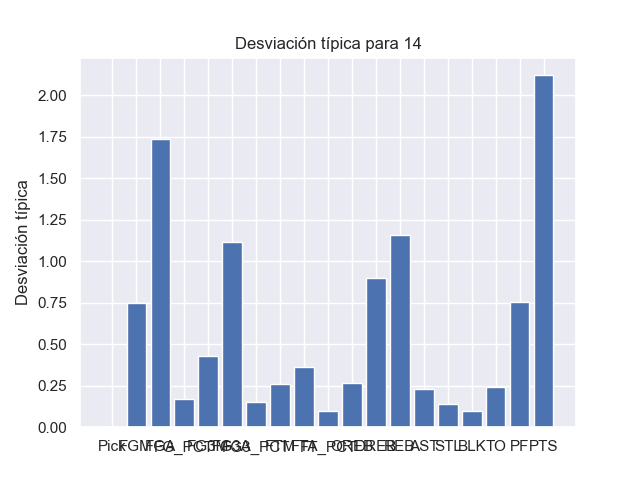
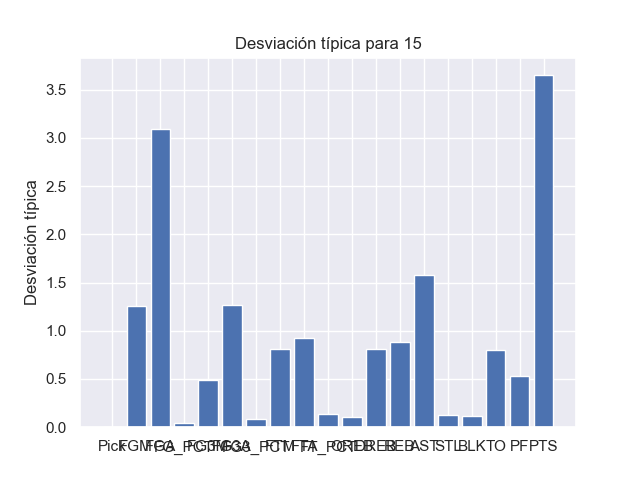
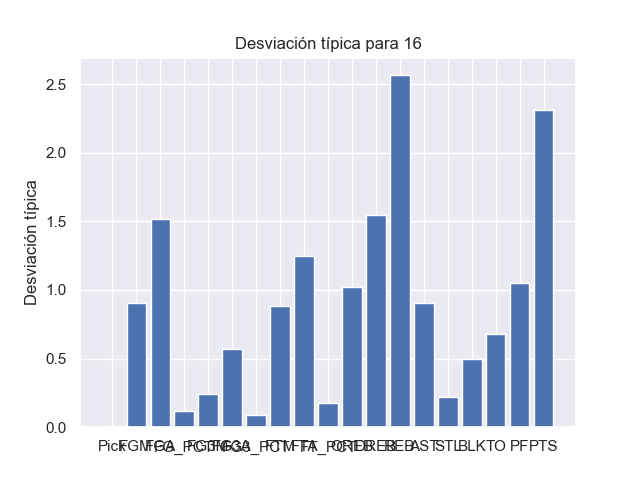
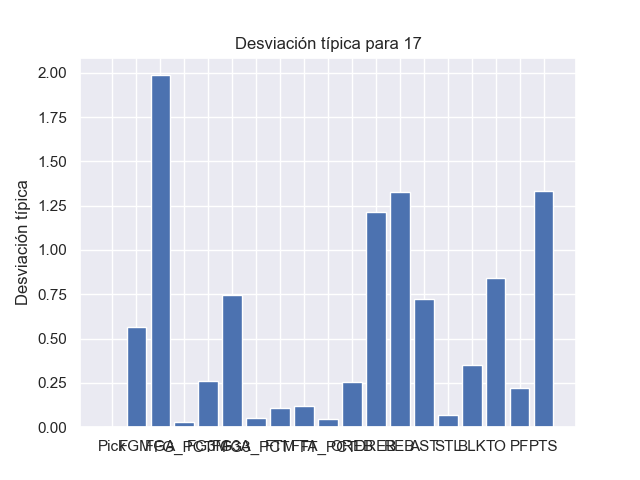
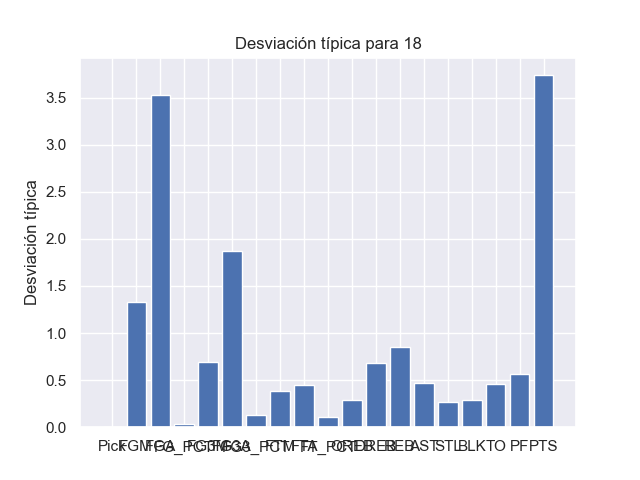
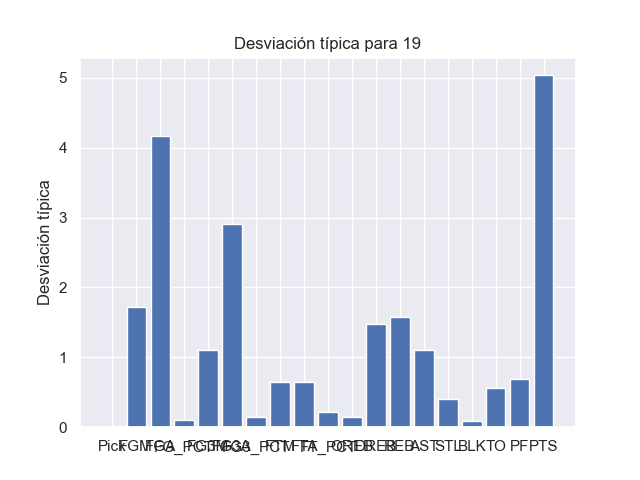
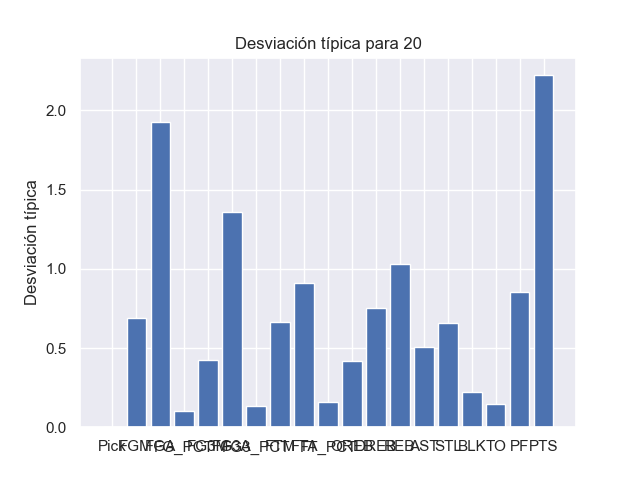
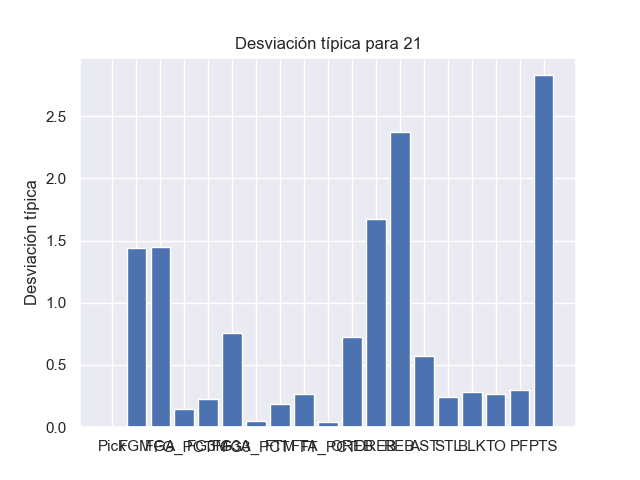
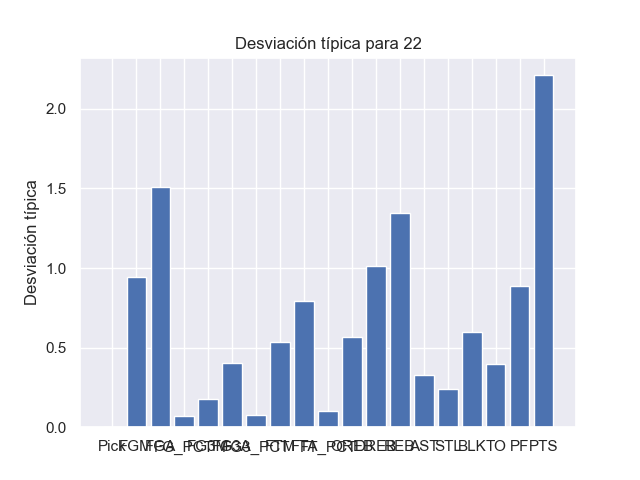
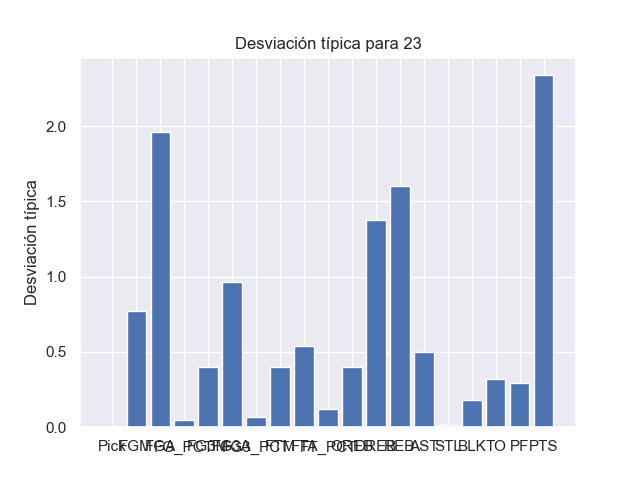
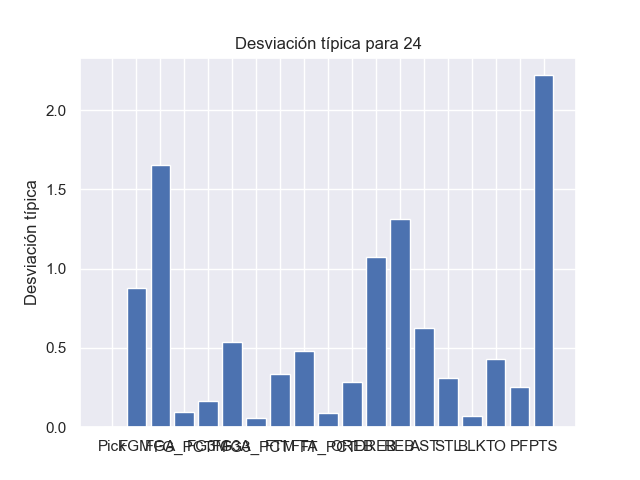
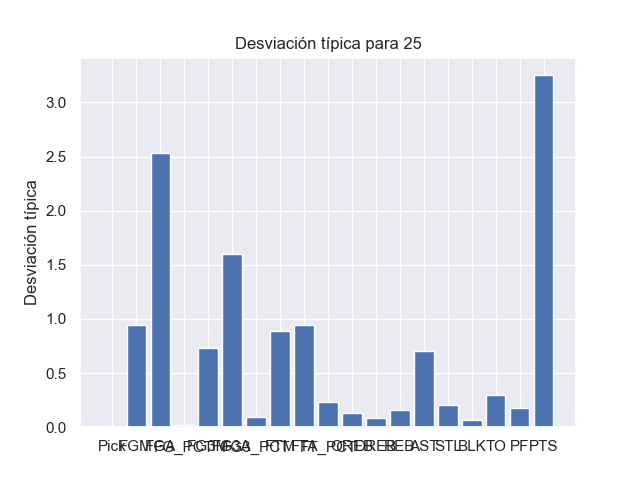
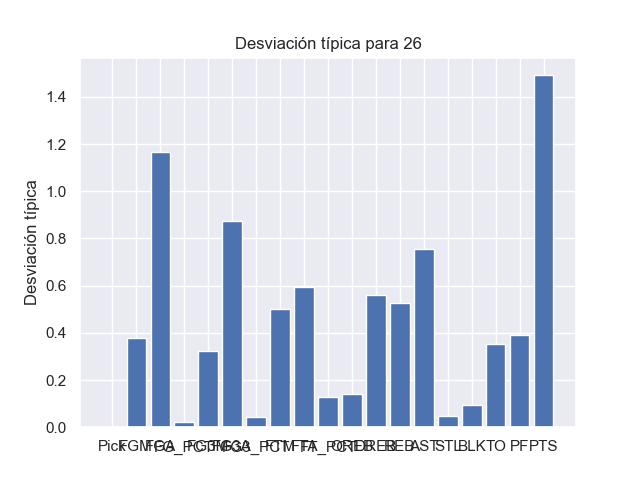
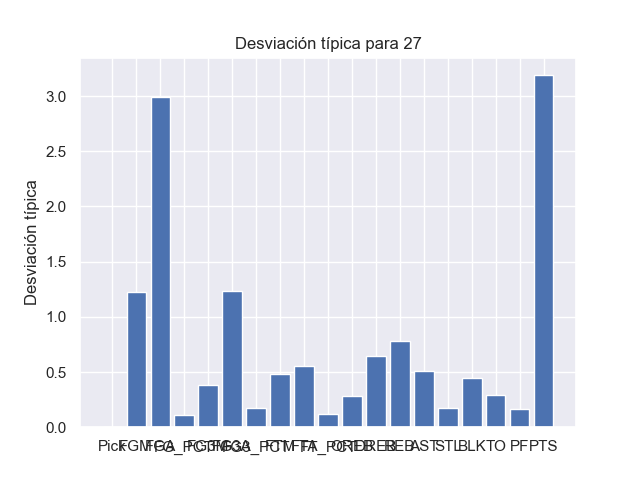
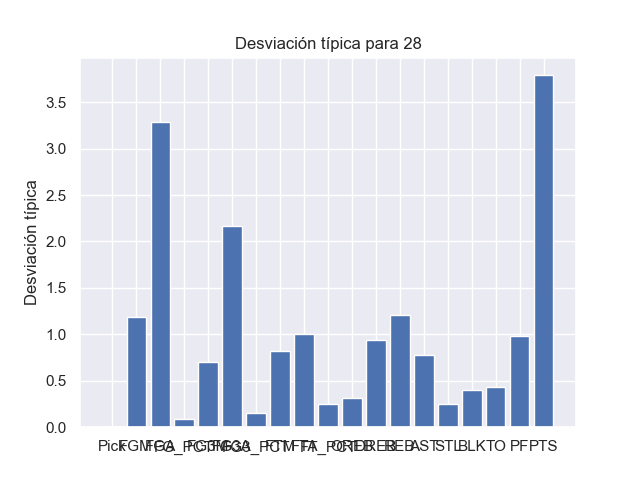
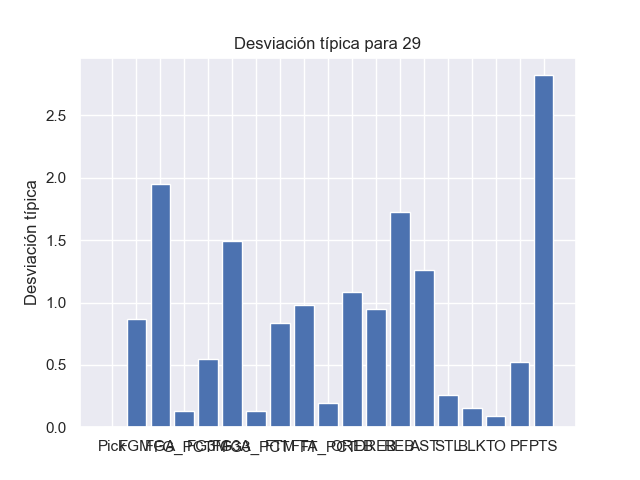
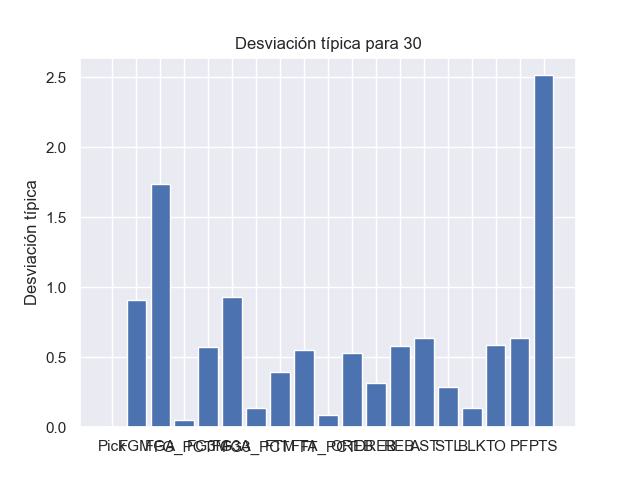
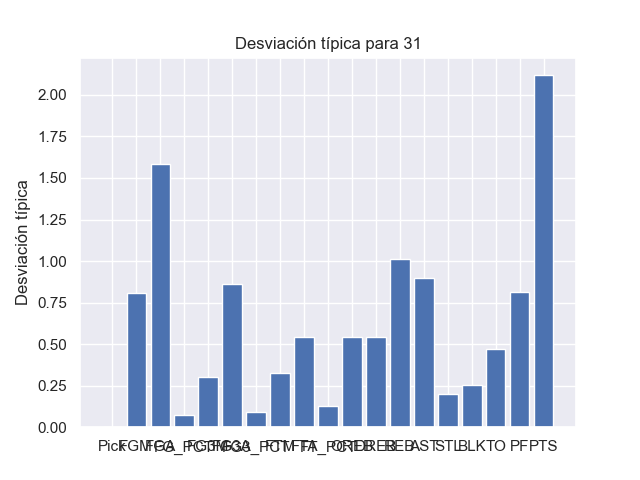
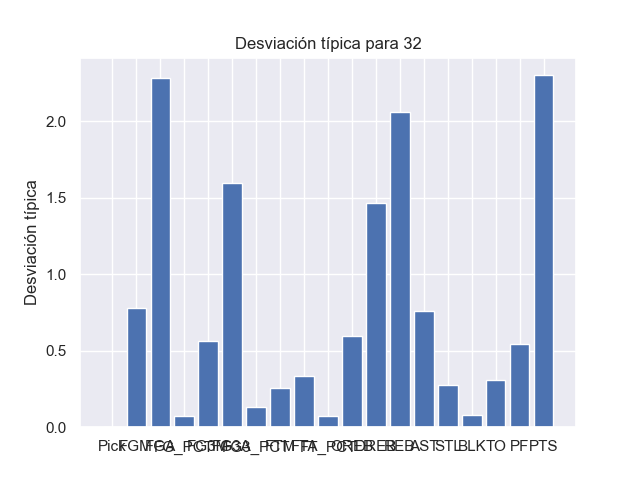
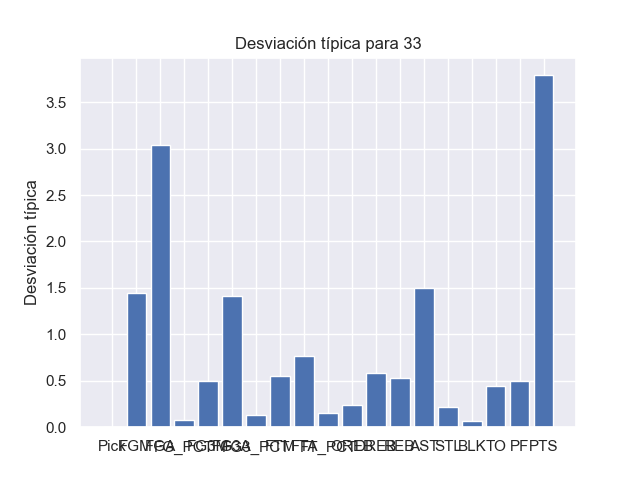
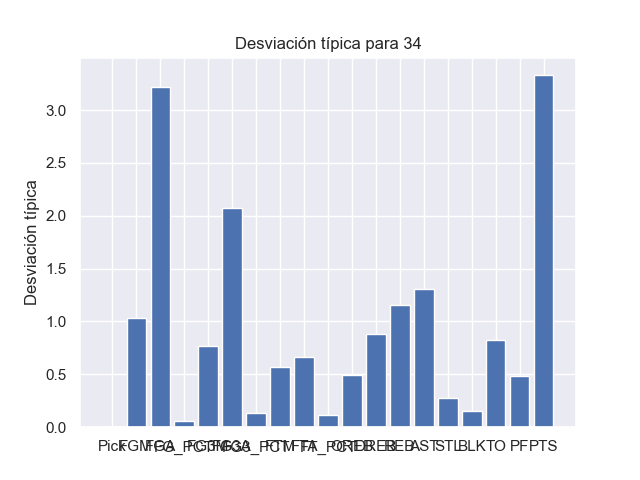
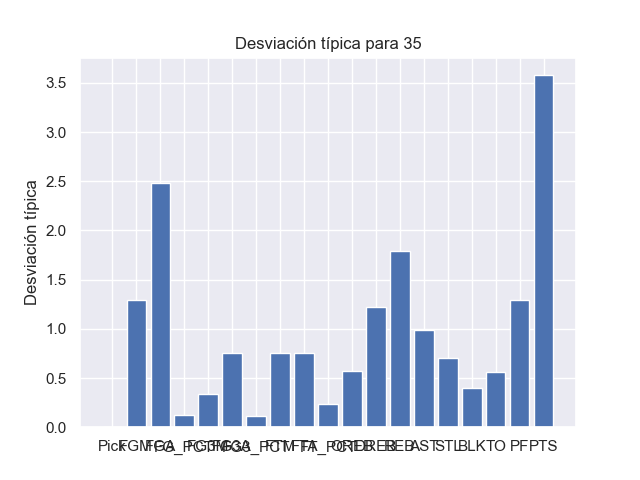
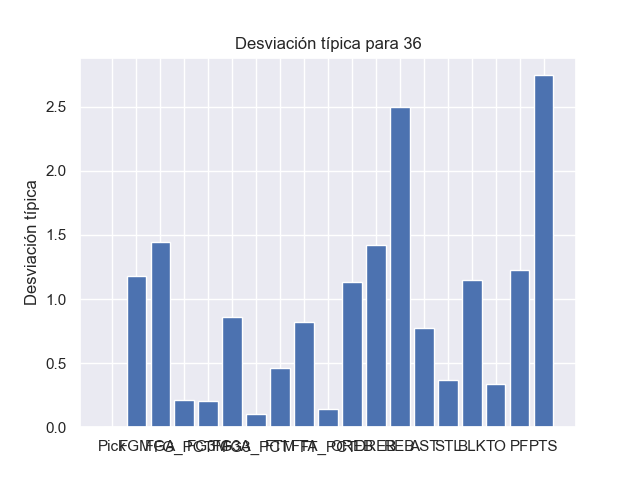
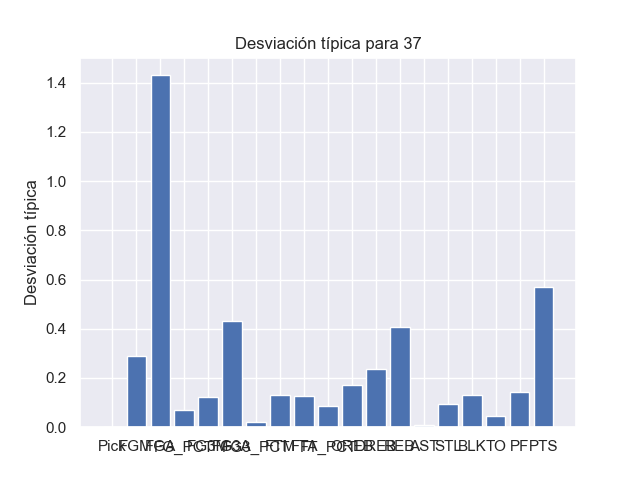
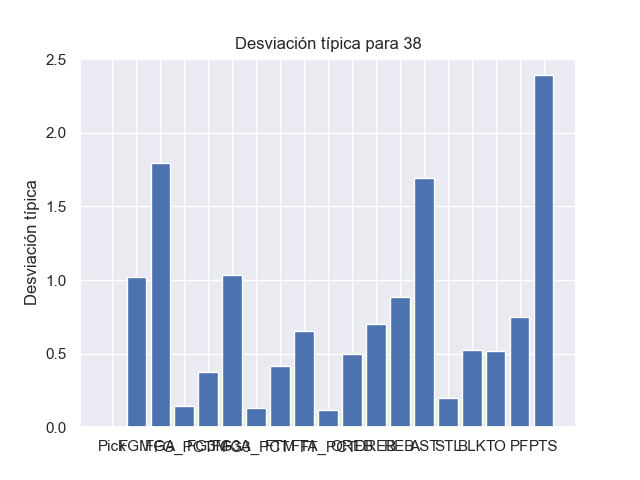
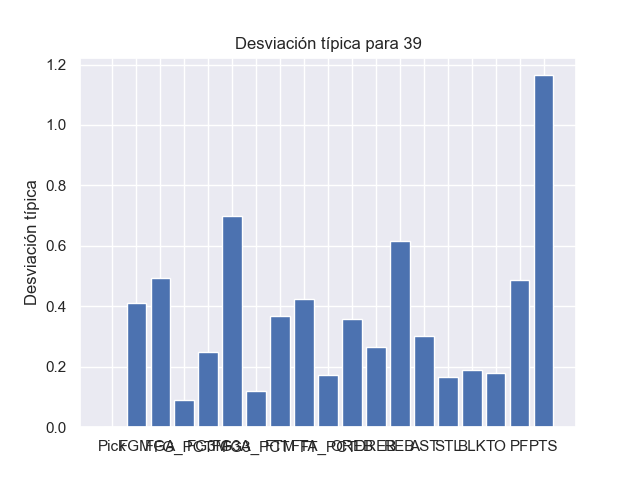
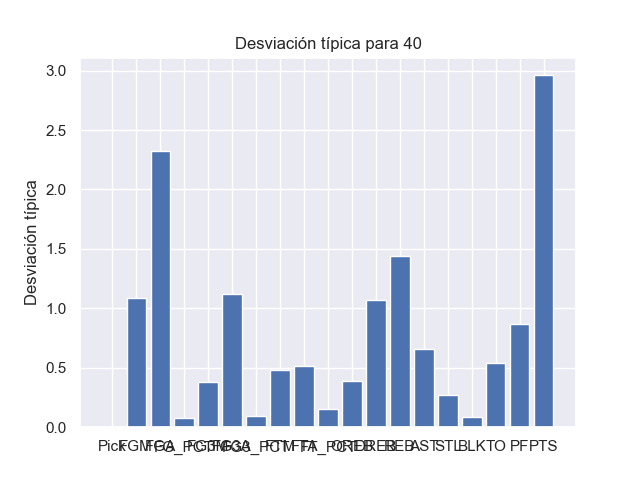
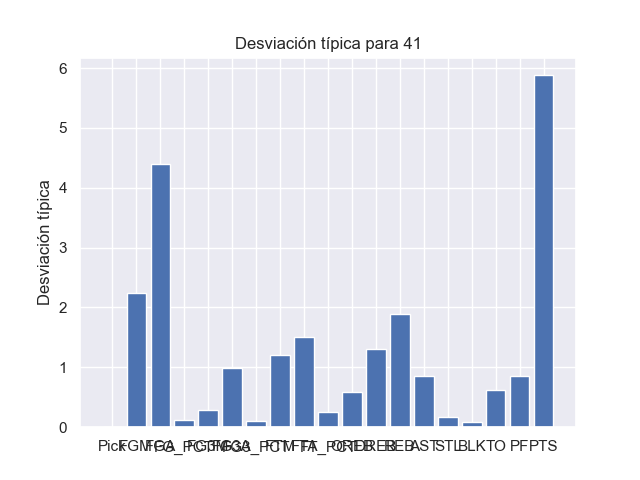
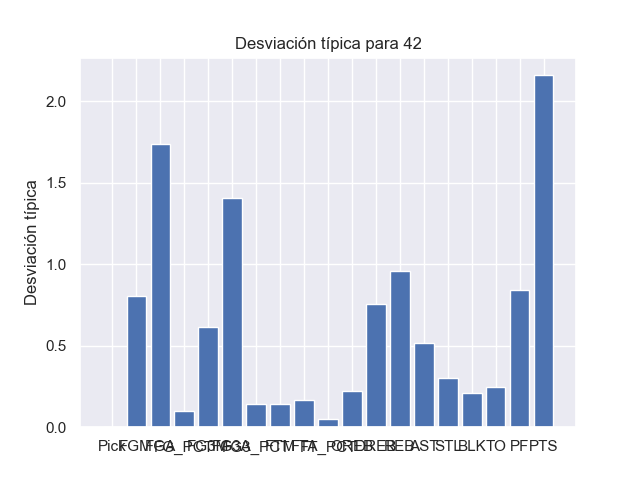
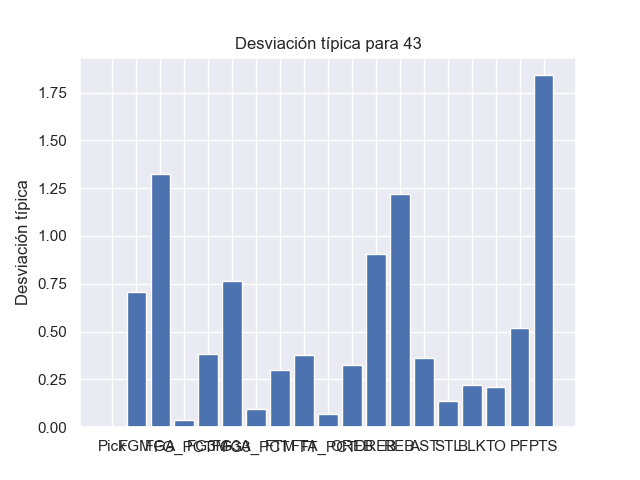
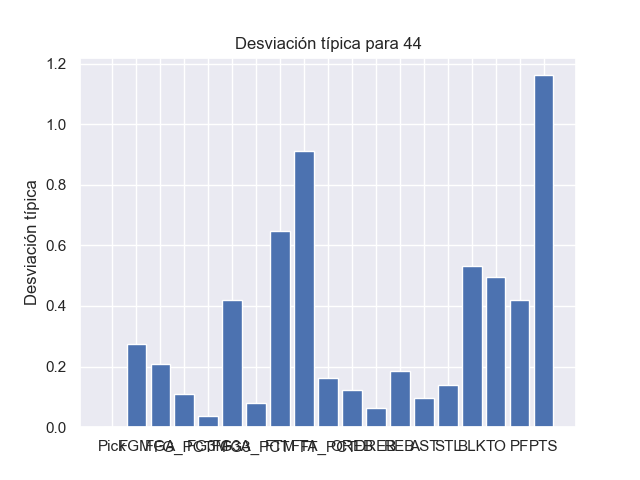
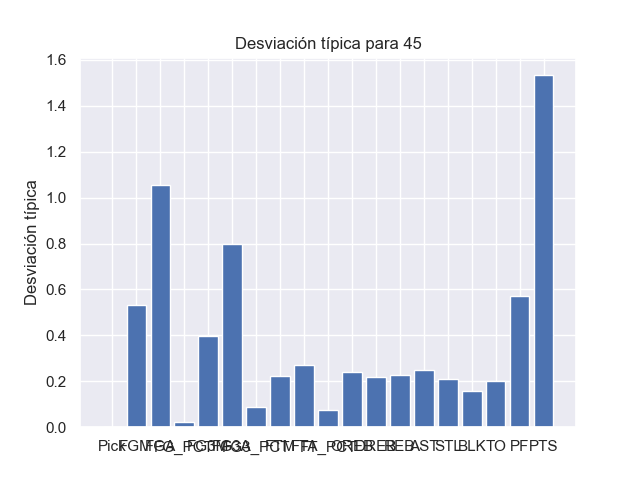
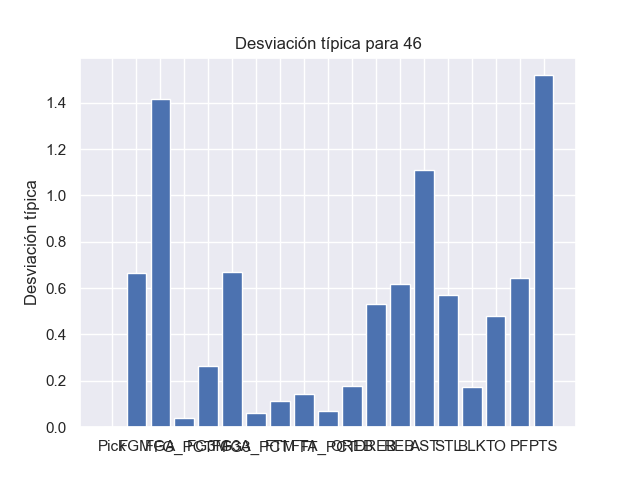
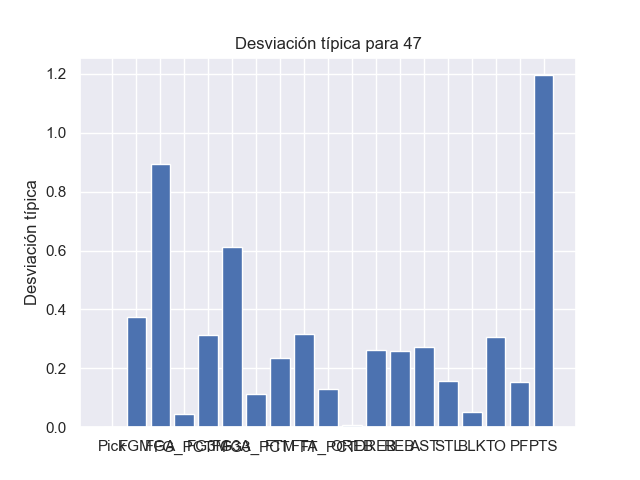
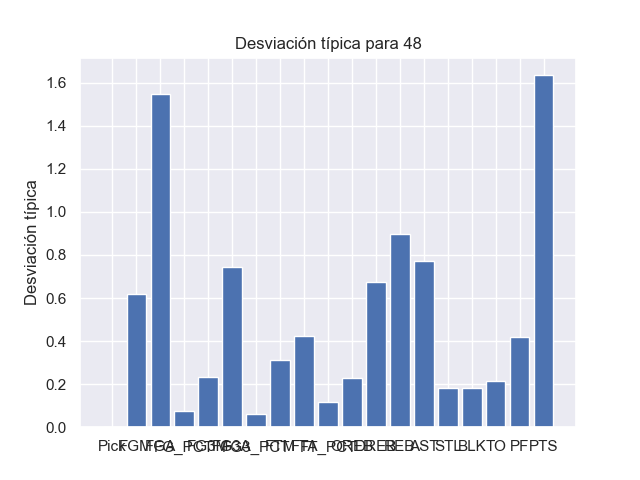
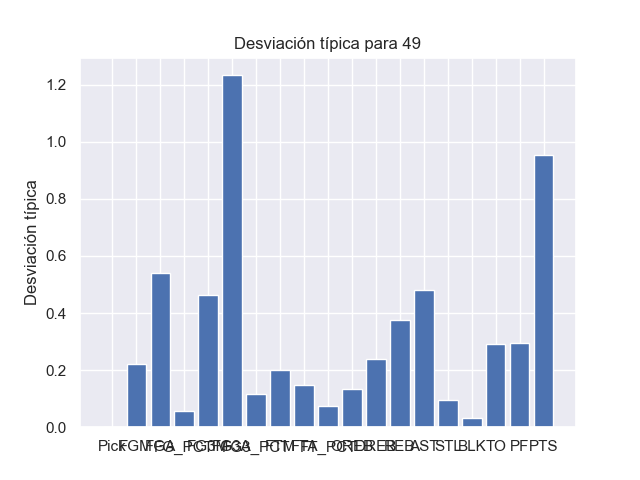
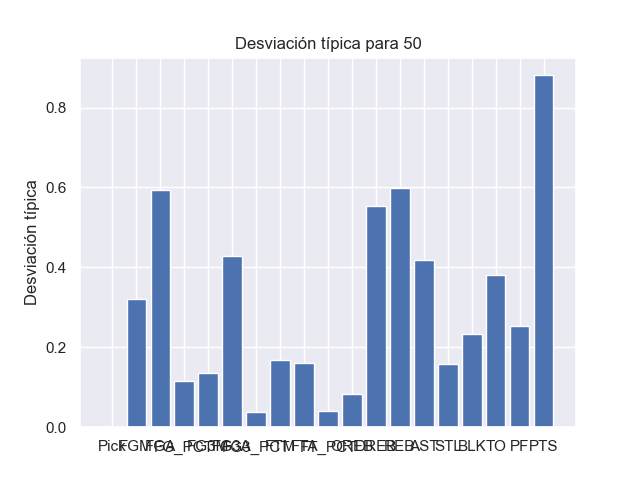
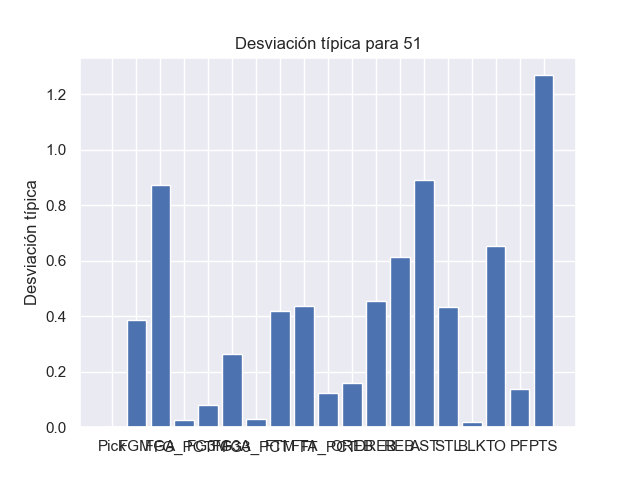
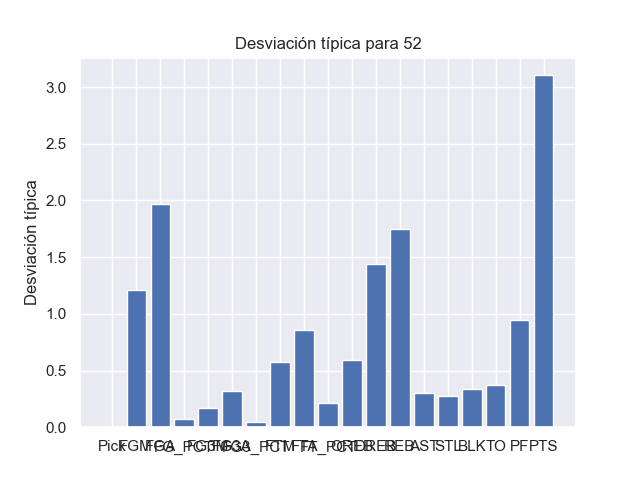
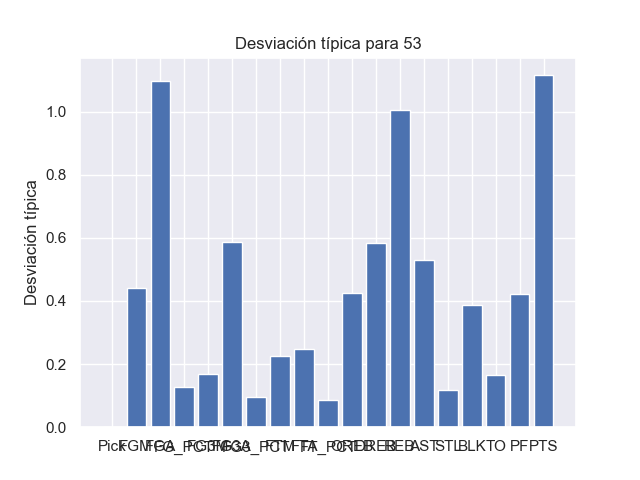
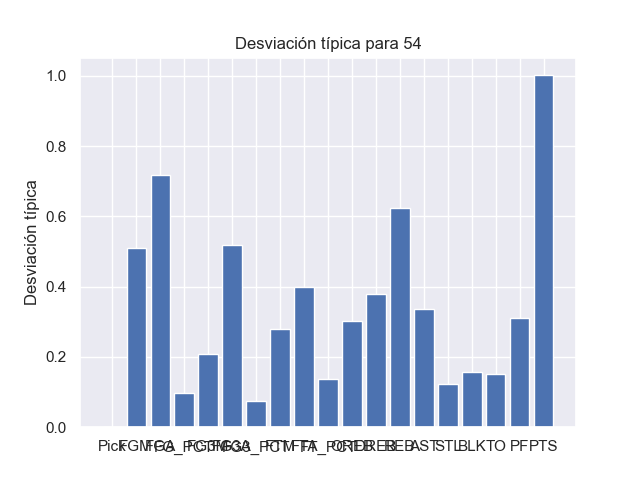
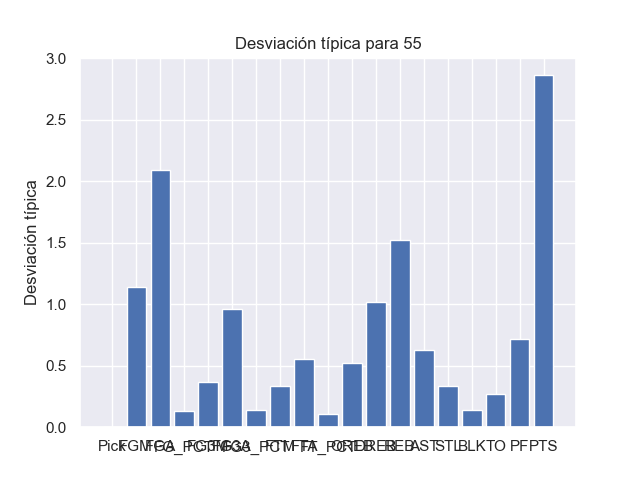
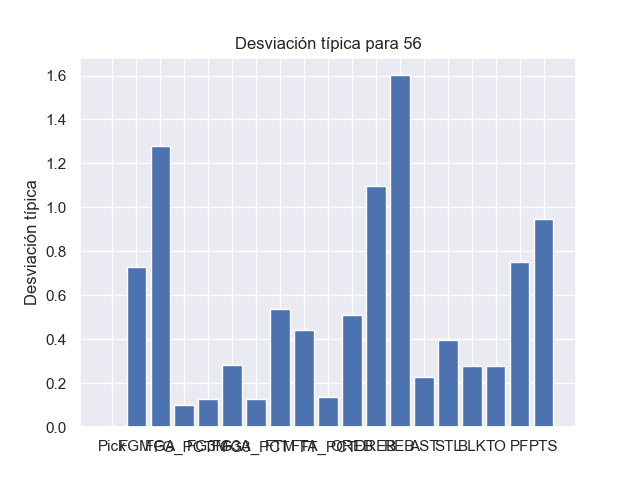
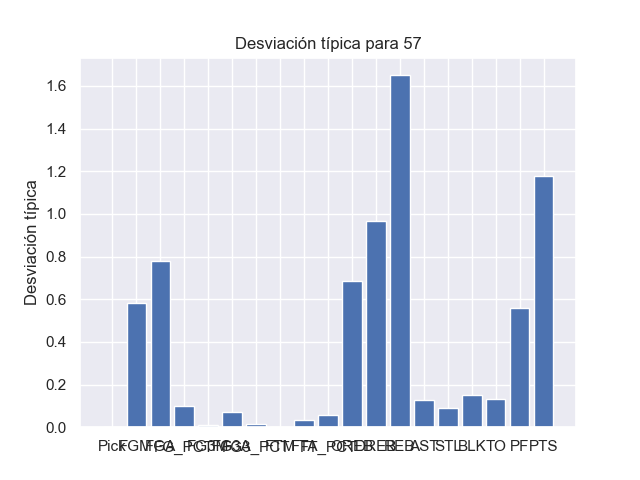
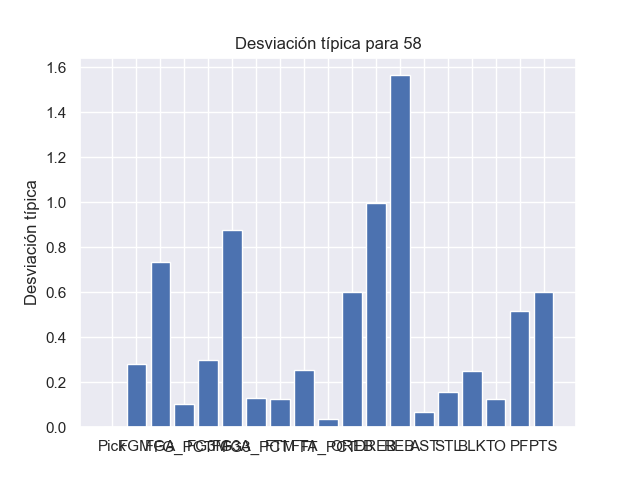
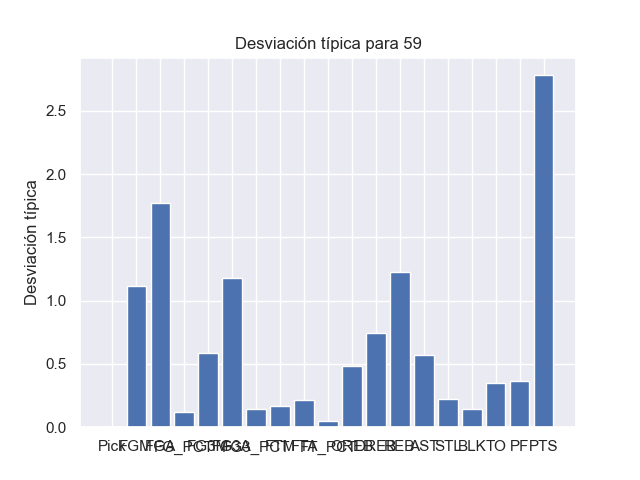
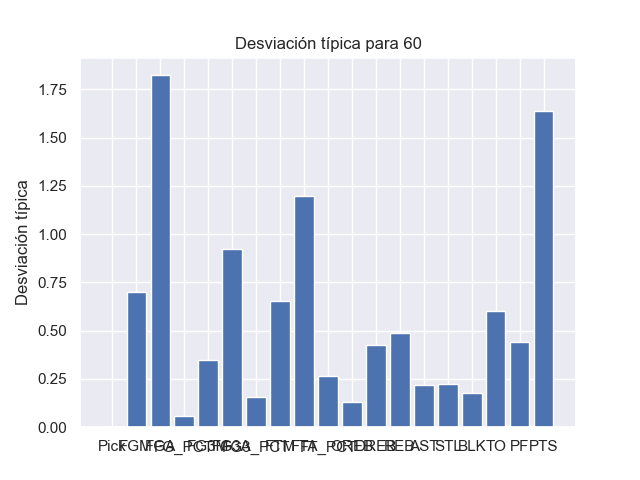

In [215]:
from IPython.display import display, HTML
import numpy as np
import matplotlib.pyplot as plt
import io
import base64

# Inicializar el contenido HTML capturado
captured_output = "<div style='max-height: 500px; overflow-y: auto;'>"

# Iterar sobre los valores y capturar la salida
for val in range(1, 61):
    filtered_df = dt_RookieAgrupado_Player[dt_RookieAgrupado_Player['Pick'] == val]
    std_dev = filtered_df.std()
    
    # Crear el gráfico de barras
    fig, ax = plt.subplots()
    ax.bar(std_dev.index, std_dev)

    # Configurar el eje y el título del gráfico
    ax.set_ylabel('Desviación típica')
    ax.set_title(f'Desviación típica para {val}')

    # Capturar la salida del gráfico
    img_stream = io.BytesIO()
    plt.savefig(img_stream, format='png')
    plt.close()

    # Convertir la imagen a base64
    img_base64 = base64.b64encode(img_stream.getvalue()).decode('utf-8')

    # Agregar el gráfico al contenido HTML capturado
    captured_output += f"<p>La desviación típica para {val} es: {std_dev}</p>"
    captured_output += f'<img src="data:image/png;base64,{img_base64}">'

# Cerrar el contenedor HTML
captured_output += "</div>"

# Mostrar la salida capturada
display(HTML(captured_output))


En estos gráficos podemos ver claramente que la variable con mayor desviación típica es "PTS" (puntos anotados por partido), seguida de "FGA" (intentos de tiro de campo por partido)

## AÑO 2023

Hacemos un listado de la plantilla de cada equipo para añadirle las estadísticas de cada jugador (la media de los últimos 3 años)

In [216]:
Roster2023  = pd.read_excel('C:\\Users\\aam05683h\\Desktop\\Roster plantilla nba 23-24.xlsx')

In [217]:
Roster2023

PLAYER NAME  PLAYER_ID            Equipo  PICK
0       Dalano Banton    1630625    BOSTON CELTICS   NaN
1      Oshae Brissett    1629052    BOSTON CELTICS   NaN
2        Jaylen Brown    1627759    BOSTON CELTICS   NaN
3          JD Davison         53    BOSTON CELTICS  53.0
4          Sam Hauser    1630573    BOSTON CELTICS   NaN
..                ...        ...               ...   ...
517   Davion Mitchell    1630558  Sacramento Kings   NaN
518        Malik Monk    1628370  Sacramento Kings   NaN
519     Keegan Murray          4  Sacramento Kings   4.0
520  Domantas Sabonis    1627734  Sacramento Kings   NaN
521     Jalen Slawson        154  Sacramento Kings  54.0

[522 rows x 4 columns]

convierto el campo Player ID en indice para unir las tablas

In [218]:
GD_PlayersAgrupado = GD_PlayersAgrupado.reset_index()

In [219]:
GD_PlayersAgrupado

PLAYER_ID       GAME_ID       TEAM_ID       FGM        FGA    FG_PCT  \
0         1713  2.113125e+07  1.610613e+09  1.861538   5.123077  0.332385   
1         2037  2.190126e+07  1.610613e+09  2.000000   4.000000  0.500000   
2         2199  2.156691e+07  1.610613e+09  0.566667   0.766667  0.350000   
3         2207  1.394013e+07  1.610613e+09  1.600000   3.400000  0.494200   
4         2544  2.380343e+07  1.610613e+09  9.867521  19.393162  0.505628   
..         ...           ...           ...       ...        ...       ...   
963    1631348  1.220000e+07  1.610613e+09  0.000000   0.000000  0.000000   
964    1631351  1.220001e+07  1.610613e+09  1.000000   2.000000  0.500000   
965    1631367  1.220000e+07  1.610613e+09  0.000000   1.000000  0.000000   
966    1631368  1.220000e+07  1.610613e+09  1.000000   1.000000  1.000000   
967    1631371  1.220006e+07  1.610613e+09  0.000000   0.000000  0.000000   

         FG3M      FG3A   FG3_PCT       FTM       FTA    FT_PCT      OREB  \
0    1.107692  3.492308  0.245215  0.400000  0.492308  0.178200  0.276923   
1    1.000000  2.000000  0.500000  0.000000  0.000000  0.000000  0.000000   
2    0.000000  0.000000  0.000000  0.366667  0.700000  0.150000  0.933333   
3    0.200000  1.200000  0.200000  0.000000  0.000000  0.000000  0.200000   
4    2.307692  6.564103  0.328449  4.132479  5.756410  0.711538  1.008547   
..        ...       ...       ...       ...       ...       ...       ...   
963  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
964  1.000000  2.000000  0.500000  2.000000  2.000000  1.000000  0.000000   
965  0.000000  1.000000  0.000000  0.000000  0.000000  0.000000  1.000000   
966  0.000000  0.000000  0.000000  1.000000  2.000000  0.500000  2.000000   
967  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

         DREB       REB       AST       STL       BLK        TO        PF  \
0    1.784615  2.061538  0.769231  0.384615  0.384615  0.600000  1.553846   
1    0.000000  0.000000  3.000000  0.000000  0.000000  0.000000  1.000000   
2    1.600000  2.533333  0.233333  0.200000  0.366667  0.400000  1.333333   
3    1.400000  1.600000  0.600000  0.200000  0.200000  0.600000  1.000000   
4    6.982906  7.991453  7.871795  1.179487  0.675214  3.615385  1.782051   
..        ...       ...       ...       ...       ...       ...       ...   
963  1.000000  1.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
964  1.000000  1.000000  1.000000  1.000000  0.000000  0.000000  1.000000   
965  1.000000  2.000000  1.000000  1.000000  0.000000  3.000000  1.000000   
966  0.000000  2.000000  0.000000  0.000000  0.000000  1.000000  0.000000   
967  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

           PTS  
0     5.230769  
1     5.000000  
2     1.500000  
3     3.400000  
4    26.175214  
..         ...  
963   0.000000  
964   5.000000  
965   0.000000  
966   3.000000  
967   0.000000  

[968 rows x 21 columns]

Vamos a hacer unir los dos dataframe para que cada jugador del 2022/23 y 2023/2024 obtenga su puntuación (la media de los últimos 3 años). A los Rookies van a obtener es sus estadísticas de respecto al pick que hayan obtenido.

Para ello vamos a revisar los tipos de cada dataframe

In [220]:
GD_PlayersAgrupado.dtypes

PLAYER_ID      int64
GAME_ID      float64
TEAM_ID      float64
FGM          float64
FGA          float64
FG_PCT       float64
FG3M         float64
FG3A         float64
FG3_PCT      float64
FTM          float64
FTA          float64
FT_PCT       float64
OREB         float64
DREB         float64
REB          float64
AST          float64
STL          float64
BLK          float64
TO           float64
PF           float64
PTS          float64
dtype: object

In [221]:
Roster2023.dtypes

PLAYER NAME     object
PLAYER_ID        int64
Equipo          object
PICK           float64
dtype: object

Vamos a hacer unir los dos dataframe para que cada jugador del 2023/24 obtenga su puntuación (la media de los últimos 3 años). A los Rookies van a obtener es sus estadísticas de respecto al pick que hayan obtenido.

Para ello vamos a revisar los tipos de cada dataframe

In [222]:
Plantillas2023 = Roster2023.merge(GD_PlayersAgrupado, on="PLAYER_ID", how='left')

In [223]:
Plantillas2023

PLAYER NAME  PLAYER_ID            Equipo  PICK       GAME_ID  \
0       Dalano Banton    1630625    BOSTON CELTICS   NaN  2.192741e+07   
1      Oshae Brissett    1629052    BOSTON CELTICS   NaN  2.147187e+07   
2        Jaylen Brown    1627759    BOSTON CELTICS   NaN  2.468228e+07   
3          JD Davison         53    BOSTON CELTICS  53.0           NaN   
4          Sam Hauser    1630573    BOSTON CELTICS   NaN  2.312268e+07   
..                ...        ...               ...   ...           ...   
517   Davion Mitchell    1630558  Sacramento Kings   NaN  2.141565e+07   
518        Malik Monk    1628370  Sacramento Kings   NaN  2.153624e+07   
519     Keegan Murray          4  Sacramento Kings   4.0           NaN   
520  Domantas Sabonis    1627734  Sacramento Kings   NaN  2.164335e+07   
521     Jalen Slawson        154  Sacramento Kings  54.0           NaN   

          TEAM_ID       FGM        FGA    FG_PCT      FG3M      FG3A  \
0    1.610613e+09  1.630000   3.760000  0.362920  0.270000  1.070000   
1    1.610613e+09  2.460000   5.853333  0.361700  1.026667  2.920000   
2    1.610613e+09  8.477273  17.640152  0.484375  2.488636  6.700758   
3             NaN       NaN        NaN       NaN       NaN       NaN   
4    1.610613e+09  1.652778   3.555556  0.363486  1.291667  3.027778   
..            ...       ...        ...       ...       ...       ...   
517  1.610613e+09  4.071429   9.589286  0.416598  1.250000  3.794643   
518  1.610613e+09  4.490826   9.935780  0.414922  1.821101  5.027523   
519           NaN       NaN        NaN       NaN       NaN       NaN   
520  1.610613e+09  7.184549  12.974249  0.559438  0.553648  1.811159   
521           NaN       NaN        NaN       NaN       NaN       NaN   

      FG3_PCT       FTM       FTA    FT_PCT      OREB      DREB        REB  \
0    0.115460  0.550000  0.860000  0.209830  0.590000  1.280000   1.870000   
1    0.266700  1.540000  2.160000  0.435753  1.146667  2.993333   4.140000   
2    0.361629  3.473485  4.545455  0.703769  1.079545  5.303030   6.382576   
3         NaN       NaN       NaN       NaN       NaN       NaN        NaN   
4    0.344736  0.138889  0.166667  0.069444  0.333333  1.513889   1.847222   
..        ...       ...       ...       ...       ...       ...        ...   
517  0.305661  0.607143  0.928571  0.213545  0.375000  1.642857   2.017857   
518  0.317257  1.458716  1.766055  0.477486  0.422018  2.371560   2.793578   
519       NaN       NaN       NaN       NaN       NaN       NaN        NaN   
520  0.235944  3.733906  5.120172  0.670468  2.862661  9.227468  12.090129   
521       NaN       NaN       NaN       NaN       NaN       NaN        NaN   

          AST       STL       BLK        TO        PF        PTS  
0    1.510000  0.460000  0.270000  0.830000  1.010000   4.080000  
1    0.800000  0.653333  0.386667  0.620000  1.446667   7.486667  
2    3.007576  1.155303  0.401515  2.643939  2.727273  22.916667  
3         NaN       NaN       NaN       NaN       NaN        NaN  
4    0.583333  0.166667  0.152778  0.208333  0.763889   4.736111  
..        ...       ...       ...       ...       ...        ...  
517  3.696429  0.705357  0.312500  1.375000  1.812500  10.000000  
518  2.623853  0.619266  0.256881  1.532110  1.458716  12.261468  
519       NaN       NaN       NaN       NaN       NaN        NaN  
520  5.639485  0.961373  0.476395  2.982833  3.240343  18.656652  
521       NaN       NaN       NaN       NaN       NaN        NaN  

[522 rows x 24 columns]

Quitamos variables que no nos sirven

In [224]:
Plantillas2023 = Plantillas2023.drop(['GAME_ID','TEAM_ID'],axis=1)

Ahora cogemos la información de los rookies, para completar la de todos los jugadores. 

In [225]:
dt_RookieAgrupado_Pick

PLAYER_ID       FGM        FGA    FG_PCT      FG3M      FG3A  \
Pick                                                                    
1     1.629863e+06  7.128099  14.888430  0.486293  1.227273  3.822314   
2     1.629703e+06  5.944000  12.676000  0.474280  1.092000  3.296000   
3     1.629847e+06  5.992509  13.573034  0.437704  1.378277  4.243446   
4     1.629901e+06  4.823529  10.152249  0.472007  0.996540  2.875433   
5     1.629764e+06  4.799257  11.866171  0.400688  1.427509  4.617100   
...            ...       ...        ...       ...       ...       ...   
56    1.629590e+06  1.300000   2.333333  0.395533  0.066667  0.266667   
57    1.629625e+06  1.022222   2.555556  0.268044  0.177778  0.844444   
58    1.630119e+06  1.121495   2.130841  0.386617  0.140187  0.476636   
59    1.629854e+06  1.600000   3.700000  0.278433  0.666667  1.533333   
60    1.630266e+06  1.187500   2.796875  0.308250  0.562500  1.406250   

       FG3_PCT       FTM       FTA    FT_PCT      OREB      DREB       REB  \
Pick                                                                         
1     0.189293  2.706612  3.595041  0.614814  1.752066  5.024793  6.776860   
2     0.259884  2.828000  3.824000  0.593996  1.284000  3.720000  5.004000   
3     0.270494  3.116105  4.535581  0.598828  1.348315  5.501873  6.850187   
4     0.302308  1.910035  2.567474  0.531561  1.401384  3.955017  5.356401   
5     0.282502  2.505576  3.133829  0.571532  0.702602  2.338290  3.040892   
...        ...       ...       ...       ...       ...       ...       ...   
56    0.066667  0.433333  0.866667  0.166667  0.500000  1.333333  1.833333   
57    0.066667  0.333333  0.533333  0.161111  0.711111  1.333333  2.044444   
58    0.062299  0.261682  0.485981  0.094701  1.065421  1.728972  2.794393   
59    0.230533  0.533333  0.766667  0.186667  0.466667  1.400000  1.866667   
60    0.247391  0.468750  0.796875  0.191016  0.250000  0.890625  1.140625   

           AST       STL       BLK        TO        PF        PTS  
Pick                                                               
1     3.144628  1.028926  0.673554  2.500000  2.537190  18.190083  
2     3.260000  0.620000  0.552000  2.196000  1.908000  15.808000  
3     4.187266  1.067416  0.726592  2.588015  2.198502  16.479401  
4     2.065744  0.889273  0.737024  1.667820  2.743945  12.553633  
5     4.721190  0.925651  0.249071  2.672862  2.237918  13.531599  
...        ...       ...       ...       ...       ...        ...  
56    0.433333  0.633333  0.333333  0.466667  0.833333   3.100000  
57    0.533333  0.177778  0.155556  0.555556  1.244444   2.555556  
58    0.476636  0.271028  0.373832  0.420561  1.196262   2.644860  
59    0.800000  0.333333  0.100000  0.733333  0.833333   4.400000  
60    0.656250  0.437500  0.109375  0.546875  0.765625   3.406250  

[60 rows x 19 columns]

In [226]:
dt_RookieAgrupado_Pick = dt_RookieAgrupado_Pick.reset_index()

Reviso los tipos de datos para hacer el merge

In [227]:
dt_RookieAgrupado_Pick.dtypes

Pick           int64
PLAYER_ID    float64
FGM          float64
FGA          float64
FG_PCT       float64
FG3M         float64
FG3A         float64
FG3_PCT      float64
FTM          float64
FTA          float64
FT_PCT       float64
OREB         float64
DREB         float64
REB          float64
AST          float64
STL          float64
BLK          float64
TO           float64
PF           float64
PTS          float64
dtype: object

In [228]:
Plantillas2023.dtypes

PLAYER NAME     object
PLAYER_ID        int64
Equipo          object
PICK           float64
FGM            float64
FGA            float64
FG_PCT         float64
FG3M           float64
FG3A           float64
FG3_PCT        float64
FTM            float64
FTA            float64
FT_PCT         float64
OREB           float64
DREB           float64
REB            float64
AST            float64
STL            float64
BLK            float64
TO             float64
PF             float64
PTS            float64
dtype: object

Cambio el formato de Pick en la lista de rookies para poder hacer el merge

In [229]:
dt_RookieAgrupado_Pick['Pick'] = dt_RookieAgrupado_Pick['Pick'].astype('float64')

Cambiamos el nombre 
de Pick, en Plantillas2023 para que sea igual que en el de la lista de rookies

In [230]:
Plantillas2023 = Plantillas2023.rename(columns={'PICK': 'Pick'})

Convertimos el indice Pick en una variable.

In [231]:
dt_RookieAgrupado_Pick

Pick     PLAYER_ID       FGM        FGA    FG_PCT      FG3M      FG3A  \
0    1.0  1.629863e+06  7.128099  14.888430  0.486293  1.227273  3.822314   
1    2.0  1.629703e+06  5.944000  12.676000  0.474280  1.092000  3.296000   
2    3.0  1.629847e+06  5.992509  13.573034  0.437704  1.378277  4.243446   
3    4.0  1.629901e+06  4.823529  10.152249  0.472007  0.996540  2.875433   
4    5.0  1.629764e+06  4.799257  11.866171  0.400688  1.427509  4.617100   
..   ...           ...       ...        ...       ...       ...       ...   
55  56.0  1.629590e+06  1.300000   2.333333  0.395533  0.066667  0.266667   
56  57.0  1.629625e+06  1.022222   2.555556  0.268044  0.177778  0.844444   
57  58.0  1.630119e+06  1.121495   2.130841  0.386617  0.140187  0.476636   
58  59.0  1.629854e+06  1.600000   3.700000  0.278433  0.666667  1.533333   
59  60.0  1.630266e+06  1.187500   2.796875  0.308250  0.562500  1.406250   

     FG3_PCT       FTM       FTA    FT_PCT      OREB      DREB       REB  \
0   0.189293  2.706612  3.595041  0.614814  1.752066  5.024793  6.776860   
1   0.259884  2.828000  3.824000  0.593996  1.284000  3.720000  5.004000   
2   0.270494  3.116105  4.535581  0.598828  1.348315  5.501873  6.850187   
3   0.302308  1.910035  2.567474  0.531561  1.401384  3.955017  5.356401   
4   0.282502  2.505576  3.133829  0.571532  0.702602  2.338290  3.040892   
..       ...       ...       ...       ...       ...       ...       ...   
55  0.066667  0.433333  0.866667  0.166667  0.500000  1.333333  1.833333   
56  0.066667  0.333333  0.533333  0.161111  0.711111  1.333333  2.044444   
57  0.062299  0.261682  0.485981  0.094701  1.065421  1.728972  2.794393   
58  0.230533  0.533333  0.766667  0.186667  0.466667  1.400000  1.866667   
59  0.247391  0.468750  0.796875  0.191016  0.250000  0.890625  1.140625   

         AST       STL       BLK        TO        PF        PTS  
0   3.144628  1.028926  0.673554  2.500000  2.537190  18.190083  
1   3.260000  0.620000  0.552000  2.196000  1.908000  15.808000  
2   4.187266  1.067416  0.726592  2.588015  2.198502  16.479401  
3   2.065744  0.889273  0.737024  1.667820  2.743945  12.553633  
4   4.721190  0.925651  0.249071  2.672862  2.237918  13.531599  
..       ...       ...       ...       ...       ...        ...  
55  0.433333  0.633333  0.333333  0.466667  0.833333   3.100000  
56  0.533333  0.177778  0.155556  0.555556  1.244444   2.555556  
57  0.476636  0.271028  0.373832  0.420561  1.196262   2.644860  
58  0.800000  0.333333  0.100000  0.733333  0.833333   4.400000  
59  0.656250  0.437500  0.109375  0.546875  0.765625   3.406250  

[60 rows x 20 columns]

Quitamos la variabla playerID de el listado de rookies ya que es un valor que no nos sirve

In [232]:
dt_RookieAgrupado_Pick=dt_RookieAgrupado_Pick.drop(['PLAYER_ID'],axis=1)

In [233]:
dt_RookieAgrupado_Pick

Pick       FGM        FGA    FG_PCT      FG3M      FG3A   FG3_PCT  \
0    1.0  7.128099  14.888430  0.486293  1.227273  3.822314  0.189293   
1    2.0  5.944000  12.676000  0.474280  1.092000  3.296000  0.259884   
2    3.0  5.992509  13.573034  0.437704  1.378277  4.243446  0.270494   
3    4.0  4.823529  10.152249  0.472007  0.996540  2.875433  0.302308   
4    5.0  4.799257  11.866171  0.400688  1.427509  4.617100  0.282502   
..   ...       ...        ...       ...       ...       ...       ...   
55  56.0  1.300000   2.333333  0.395533  0.066667  0.266667  0.066667   
56  57.0  1.022222   2.555556  0.268044  0.177778  0.844444  0.066667   
57  58.0  1.121495   2.130841  0.386617  0.140187  0.476636  0.062299   
58  59.0  1.600000   3.700000  0.278433  0.666667  1.533333  0.230533   
59  60.0  1.187500   2.796875  0.308250  0.562500  1.406250  0.247391   

         FTM       FTA    FT_PCT      OREB      DREB       REB       AST  \
0   2.706612  3.595041  0.614814  1.752066  5.024793  6.776860  3.144628   
1   2.828000  3.824000  0.593996  1.284000  3.720000  5.004000  3.260000   
2   3.116105  4.535581  0.598828  1.348315  5.501873  6.850187  4.187266   
3   1.910035  2.567474  0.531561  1.401384  3.955017  5.356401  2.065744   
4   2.505576  3.133829  0.571532  0.702602  2.338290  3.040892  4.721190   
..       ...       ...       ...       ...       ...       ...       ...   
55  0.433333  0.866667  0.166667  0.500000  1.333333  1.833333  0.433333   
56  0.333333  0.533333  0.161111  0.711111  1.333333  2.044444  0.533333   
57  0.261682  0.485981  0.094701  1.065421  1.728972  2.794393  0.476636   
58  0.533333  0.766667  0.186667  0.466667  1.400000  1.866667  0.800000   
59  0.468750  0.796875  0.191016  0.250000  0.890625  1.140625  0.656250   

         STL       BLK        TO        PF        PTS  
0   1.028926  0.673554  2.500000  2.537190  18.190083  
1   0.620000  0.552000  2.196000  1.908000  15.808000  
2   1.067416  0.726592  2.588015  2.198502  16.479401  
3   0.889273  0.737024  1.667820  2.743945  12.553633  
4   0.925651  0.249071  2.672862  2.237918  13.531599  
..       ...       ...       ...       ...        ...  
55  0.633333  0.333333  0.466667  0.833333   3.100000  
56  0.177778  0.155556  0.555556  1.244444   2.555556  
57  0.271028  0.373832  0.420561  1.196262   2.644860  
58  0.333333  0.100000  0.733333  0.833333   4.400000  
59  0.437500  0.109375  0.546875  0.765625   3.406250  

[60 rows x 19 columns]

In [234]:
# Realizamos el merge basado en 'Pick' para los rookies
Plantillas2023 = pd.merge(Plantillas2023, dt_RookieAgrupado_Pick, on='Pick', suffixes=('', '_df2'), how='left'     )                    

In [235]:
Plantillas2023

PLAYER NAME  PLAYER_ID            Equipo  Pick       FGM        FGA  \
0       Dalano Banton    1630625    BOSTON CELTICS   NaN  1.630000   3.760000   
1      Oshae Brissett    1629052    BOSTON CELTICS   NaN  2.460000   5.853333   
2        Jaylen Brown    1627759    BOSTON CELTICS   NaN  8.477273  17.640152   
3          JD Davison         53    BOSTON CELTICS  53.0       NaN        NaN   
4          Sam Hauser    1630573    BOSTON CELTICS   NaN  1.652778   3.555556   
..                ...        ...               ...   ...       ...        ...   
517   Davion Mitchell    1630558  Sacramento Kings   NaN  4.071429   9.589286   
518        Malik Monk    1628370  Sacramento Kings   NaN  4.490826   9.935780   
519     Keegan Murray          4  Sacramento Kings   4.0       NaN        NaN   
520  Domantas Sabonis    1627734  Sacramento Kings   NaN  7.184549  12.974249   
521     Jalen Slawson        154  Sacramento Kings  54.0       NaN        NaN   

       FG_PCT      FG3M      FG3A   FG3_PCT       FTM       FTA    FT_PCT  \
0    0.362920  0.270000  1.070000  0.115460  0.550000  0.860000  0.209830   
1    0.361700  1.026667  2.920000  0.266700  1.540000  2.160000  0.435753   
2    0.484375  2.488636  6.700758  0.361629  3.473485  4.545455  0.703769   
3         NaN       NaN       NaN       NaN       NaN       NaN       NaN   
4    0.363486  1.291667  3.027778  0.344736  0.138889  0.166667  0.069444   
..        ...       ...       ...       ...       ...       ...       ...   
517  0.416598  1.250000  3.794643  0.305661  0.607143  0.928571  0.213545   
518  0.414922  1.821101  5.027523  0.317257  1.458716  1.766055  0.477486   
519       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
520  0.559438  0.553648  1.811159  0.235944  3.733906  5.120172  0.670468   
521       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

         OREB      DREB        REB       AST       STL       BLK        TO  \
0    0.590000  1.280000   1.870000  1.510000  0.460000  0.270000  0.830000   
1    1.146667  2.993333   4.140000  0.800000  0.653333  0.386667  0.620000   
2    1.079545  5.303030   6.382576  3.007576  1.155303  0.401515  2.643939   
3         NaN       NaN        NaN       NaN       NaN       NaN       NaN   
4    0.333333  1.513889   1.847222  0.583333  0.166667  0.152778  0.208333   
..        ...       ...        ...       ...       ...       ...       ...   
517  0.375000  1.642857   2.017857  3.696429  0.705357  0.312500  1.375000   
518  0.422018  2.371560   2.793578  2.623853  0.619266  0.256881  1.532110   
519       NaN       NaN        NaN       NaN       NaN       NaN       NaN   
520  2.862661  9.227468  12.090129  5.639485  0.961373  0.476395  2.982833   
521       NaN       NaN        NaN       NaN       NaN       NaN       NaN   

           PF        PTS   FGM_df2    FGA_df2  FG_PCT_df2  FG3M_df2  FG3A_df2  \
0    1.010000   4.080000       NaN        NaN         NaN       NaN       NaN   
1    1.446667   7.486667       NaN        NaN         NaN       NaN       NaN   
2    2.727273  22.916667       NaN        NaN         NaN       NaN       NaN   
3         NaN        NaN  1.015152   2.136364    0.351803  0.196970  0.636364   
4    0.763889   4.736111       NaN        NaN         NaN       NaN       NaN   
..        ...        ...       ...        ...         ...       ...       ...   
517  1.812500  10.000000       NaN        NaN         NaN       NaN       NaN   
518  1.458716  12.261468       NaN        NaN         NaN       NaN       NaN   
519       NaN        NaN  4.823529  10.152249    0.472007  0.996540  2.875433   
520  3.240343  18.656652       NaN        NaN         NaN       NaN       NaN   
521       NaN        NaN  1.287037   3.212963    0.320231  0.444444  1.370370   

     FG3_PCT_df2   FTM_df2   FTA_df2  FT_PCT_df2  OREB_df2  DREB_df2  \
0            NaN       NaN       NaN         NaN       NaN       NaN   
1            NaN       NaN       NaN         NaN       NaN

In [236]:
# Obtener la condición donde Columna_C no es nula
condicion = Plantillas2023['Pick'].notnull()

# Listas de columnas a actualizar y columnas con los nuevos valores
columnas_a_actualizar = ['FGM','FGA','FG_PCT','FG3M','FG3A','FG3_PCT','FTM','FTA','FT_PCT','OREB','DREB','REB','AST','STL','BLK','TO','PF','PTS']  # Lista de columnas a actualizar
columnas_nuevos_valores = ['FGM_df2','FGA_df2','FG_PCT_df2','FG3M_df2','FG3A_df2','FG3_PCT_df2','FTM_df2','FTA_df2','FT_PCT_df2','OREB_df2','DREB_df2','REB_df2','AST_df2','STL_df2','BLK_df2','TO_df2','PF_df2','PTS_df2']

for col, new_col in zip(columnas_a_actualizar, columnas_nuevos_valores):
    Plantillas2023.loc[condicion, col] = Plantillas2023.loc[condicion, new_col]
    print(f"La columna '{col}' se actualiza con los valores de la columna '{new_col}'.")

print(Plantillas2023)

La columna 'FGM' se actualiza con los valores de la columna 'FGM_df2'.
La columna 'FGA' se actualiza con los valores de la columna 'FGA_df2'.
La columna 'FG_PCT' se actualiza con los valores de la columna 'FG_PCT_df2'.
La columna 'FG3M' se actualiza con los valores de la columna 'FG3M_df2'.
La columna 'FG3A' se actualiza con los valores de la columna 'FG3A_df2'.
La columna 'FG3_PCT' se actualiza con los valores de la columna 'FG3_PCT_df2'.
La columna 'FTM' se actualiza con los valores de la columna 'FTM_df2'.
La columna 'FTA' se actualiza con los valores de la columna 'FTA_df2'.
La columna 'FT_PCT' se actualiza con los valores de la columna 'FT_PCT_df2'.
La columna 'OREB' se actualiza con los valores de la columna 'OREB_df2'.
La columna 'DREB' se actualiza con los valores de la columna 'DREB_df2'.
La columna 'REB' se actualiza con los valores de la columna 'REB_df2'.
La columna 'AST' se actualiza con los valores de la columna 'AST_df2'.
La columna 'STL' se actualiza con los valores de 

In [237]:
Plantillas2023

PLAYER NAME  PLAYER_ID            Equipo  Pick       FGM        FGA  \
0       Dalano Banton    1630625    BOSTON CELTICS   NaN  1.630000   3.760000   
1      Oshae Brissett    1629052    BOSTON CELTICS   NaN  2.460000   5.853333   
2        Jaylen Brown    1627759    BOSTON CELTICS   NaN  8.477273  17.640152   
3          JD Davison         53    BOSTON CELTICS  53.0  1.015152   2.136364   
4          Sam Hauser    1630573    BOSTON CELTICS   NaN  1.652778   3.555556   
..                ...        ...               ...   ...       ...        ...   
517   Davion Mitchell    1630558  Sacramento Kings   NaN  4.071429   9.589286   
518        Malik Monk    1628370  Sacramento Kings   NaN  4.490826   9.935780   
519     Keegan Murray          4  Sacramento Kings   4.0  4.823529  10.152249   
520  Domantas Sabonis    1627734  Sacramento Kings   NaN  7.184549  12.974249   
521     Jalen Slawson        154  Sacramento Kings  54.0  1.287037   3.212963   

       FG_PCT      FG3M      FG3A   FG3_PCT       FTM       FTA    FT_PCT  \
0    0.362920  0.270000  1.070000  0.115460  0.550000  0.860000  0.209830   
1    0.361700  1.026667  2.920000  0.266700  1.540000  2.160000  0.435753   
2    0.484375  2.488636  6.700758  0.361629  3.473485  4.545455  0.703769   
3    0.351803  0.196970  0.636364  0.132318  0.363636  0.484848  0.176773   
4    0.363486  1.291667  3.027778  0.344736  0.138889  0.166667  0.069444   
..        ...       ...       ...       ...       ...       ...       ...   
517  0.416598  1.250000  3.794643  0.305661  0.607143  0.928571  0.213545   
518  0.414922  1.821101  5.027523  0.317257  1.458716  1.766055  0.477486   
519  0.472007  0.996540  2.875433  0.302308  1.910035  2.567474  0.531561   
520  0.559438  0.553648  1.811159  0.235944  3.733906  5.120172  0.670468   
521  0.320231  0.444444  1.370370  0.192204  0.509259  0.675926  0.187500   

         OREB      DREB        REB       AST       STL       BLK        TO  \
0    0.590000  1.280000   1.870000  1.510000  0.460000  0.270000  0.830000   
1    1.146667  2.993333   4.140000  0.800000  0.653333  0.386667  0.620000   
2    1.079545  5.303030   6.382576  3.007576  1.155303  0.401515  2.643939   
3    0.409091  1.030303   1.439394  0.636364  0.166667  0.318182  0.424242   
4    0.333333  1.513889   1.847222  0.583333  0.166667  0.152778  0.208333   
..        ...       ...        ...       ...       ...       ...       ...   
517  0.375000  1.642857   2.017857  3.696429  0.705357  0.312500  1.375000   
518  0.422018  2.371560   2.793578  2.623853  0.619266  0.256881  1.532110   
519  1.401384  3.955017   5.356401  2.065744  0.889273  0.737024  1.667820   
520  2.862661  9.227468  12.090129  5.639485  0.961373  0.476395  2.982833   
521  0.722222  1.120370   1.842593  0.555556  0.203704  0.212963  0.407407   

           PF        PTS   FGM_df2    FGA_df2  FG_PCT_df2  FG3M_df2  FG3A_df2  \
0    1.010000   4.080000       NaN        NaN         NaN       NaN       NaN   
1    1.446667   7.486667       NaN        NaN         NaN       NaN       NaN   
2    2.727273  22.916667       NaN        NaN         NaN       NaN       NaN   
3    0.939394   2.590909  1.015152   2.136364    0.351803  0.196970  0.636364   
4    0.763889   4.736111       NaN        NaN         NaN       NaN       NaN   
..        ...        ...       ...        ...         ...       ...       ...   
517  1.812500  10.000000       NaN        NaN         NaN       NaN       NaN   
518  1.458716  12.261468       NaN        NaN         NaN       NaN       NaN   
519  2.743945  12.553633  4.823529  10.152249    0.472007  0.996540  2.875433   
520  3.240343  18.656652       NaN        NaN         NaN       NaN       NaN   
521  0.888889   3.527778  1.287037   3.212963    0.320231  0.444444  1.370370   

     FG3_PCT_df2   FTM_df2   FTA_df2  FT_PCT_df2  OREB_df2  DREB_df2  \
0            NaN       NaN       NaN         NaN       NaN       NaN   
1            NaN       NaN       NaN         NaN       NaN

Revisamos que esté bien

In [238]:
filas_no_nulas = Plantillas2023[Plantillas2023['Pick'].notnull()]

In [239]:
filas_no_nulas

PLAYER NAME  PLAYER_ID              Equipo  Pick       FGM        FGA  \
3        JD Davison         53      BOSTON CELTICS  53.0  1.015152   2.136364   
15     Jordan Walsh        138      BOSTON CELTICS  38.0  2.465116   4.795349   
19      Kobe Bufkin        115       Atlanta Hawks  15.0  2.960699   7.126638   
23       AJ Griffin         16       Atlanta Hawks  16.0  3.224359   6.423077   
24   Mouhamed Gueye        139       Atlanta Hawks  39.0  0.897436   2.205128   
..              ...        ...                 ...   ...       ...        ...   
482   Maxwell Lewis        140  Los Angeles Lakers  40.0  2.040230   4.660920   
510      Keon Ellis        218    Sacramento Kings  60.0  1.187500   2.796875   
514     Colby Jones        134    Sacramento Kings  34.0  2.407821   6.055866   
519   Keegan Murray          4    Sacramento Kings   4.0  4.823529  10.152249   
521   Jalen Slawson        154    Sacramento Kings  54.0  1.287037   3.212963   

       FG_PCT      FG3M      FG3A   FG3_PCT       FTM       FTA    FT_PCT  \
3    0.351803  0.196970  0.636364  0.132318  0.363636  0.484848  0.176773   
15   0.443540  0.432558  1.227907  0.164112  0.795349  1.241860  0.282088   
19   0.386598  1.021834  3.078603  0.253886  1.017467  1.301310  0.351057   
23   0.486442  0.358974  1.275641  0.171647  1.589744  2.243590  0.468429   
24   0.303577  0.179487  0.692308  0.086962  0.589744  0.807692  0.224359   
..        ...       ...       ...       ...       ...       ...       ...   
482  0.377891  0.603448  1.959770  0.211057  0.701149  0.982759  0.238885   
510  0.308250  0.562500  1.406250  0.247391  0.468750  0.796875  0.191016   
514  0.397771  0.854749  2.754190  0.224190  1.005587  1.402235  0.355620   
519  0.472007  0.996540  2.875433  0.302308  1.910035  2.567474  0.531561   
521  0.320231  0.444444  1.370370  0.192204  0.509259  0.675926  0.187500   

         OREB      DREB       REB       AST       STL       BLK        TO  \
3    0.409091  1.030303  1.439394  0.636364  0.166667  0.318182  0.424242   
15   0.558140  1.655814  2.213953  2.209302  0.576744  0.516279  0.972093   
19   0.655022  2.510917  3.165939  1.742358  0.497817  0.231441  1.039301   
23   2.032051  3.737179  5.769231  1.685897  0.673077  1.038462  1.461538   
24   0.487179  0.923077  1.410256  0.615385  0.205128  0.230769  0.500000   
..        ...       ...       ...       ...       ...       ...       ...   
482  0.500000  1.770115  2.270115  0.885057  0.465517  0.281609  0.804598   
510  0.250000  0.890625  1.140625  0.656250  0.437500  0.109375  0.546875   
514  0.597765  2.217877  2.815642  2.312849  0.575419  0.189944  1.262570   
519  1.401384  3.955017  5.356401  2.065744  0.889273  0.737024  1.667820   
521  0.722222  1.120370  1.842593  0.555556  0.203704  0.212963  0.407407   

           PF        PTS   FGM_df2    FGA_df2  FG_PCT_df2  FG3M_df2  FG3A_df2  \
3    0.939394   2.590909  1.015152   2.136364    0.351803  0.196970  0.636364   
15   1.902326   6.158140  2.465116   4.795349    0.443540  0.432558  1.227907   
19   1.563319   7.960699  2.960699   7.126638    0.386598  1.021834  3.078603   
23   2.705128   8.397436  3.224359   6.423077    0.486442  0.358974  1.275641   
24   0.641026   2.564103  0.897436   2.205128    0.303577  0.179487  0.692308   
..        ...        ...       ...        ...         ...       ...       ...   
482  1.431034   5.385057  2.040230   4.660920    0.377891  0.603448  1.959770   
510  0.765625   3.406250  1.187500   2.796875    0.308250  0.562500  1.406250   
514  1.698324   6.675978  2.407821   6.055866    0.397771  0.854749  2.754190   
519  2.743945  12.553633  4.823529  10.152249    0.472007  0.996540  2.875433   
521  0.888889   3.527778  1.287037   3.212963    0.320231  0.444444  1.370370   

     FG3_PCT_df2   FTM_df2   FTA_df2  FT_PCT_df2  OREB_df2  DREB_df2  \
3       0.132318  0.363636  0.484848    0.176773  0.409091  1.030303   
15      0.164112  0.795349  1.241860    0.282088  0.558140  1.655814

Vamos a eliminar las columnas creadas nuevas con la terminación df2

In [240]:
# Obtenemos las columnas que terminan con 'df2'
columnas_a_eliminar = [col for col in Plantillas2023.columns if col.endswith('df2')]

# Eliminamos las columnas que terminan con 'df2'
Plantillas2023.drop(columns=columnas_a_eliminar, inplace=True)

In [241]:
Plantillas2023

PLAYER NAME  PLAYER_ID            Equipo  Pick       FGM        FGA  \
0       Dalano Banton    1630625    BOSTON CELTICS   NaN  1.630000   3.760000   
1      Oshae Brissett    1629052    BOSTON CELTICS   NaN  2.460000   5.853333   
2        Jaylen Brown    1627759    BOSTON CELTICS   NaN  8.477273  17.640152   
3          JD Davison         53    BOSTON CELTICS  53.0  1.015152   2.136364   
4          Sam Hauser    1630573    BOSTON CELTICS   NaN  1.652778   3.555556   
..                ...        ...               ...   ...       ...        ...   
517   Davion Mitchell    1630558  Sacramento Kings   NaN  4.071429   9.589286   
518        Malik Monk    1628370  Sacramento Kings   NaN  4.490826   9.935780   
519     Keegan Murray          4  Sacramento Kings   4.0  4.823529  10.152249   
520  Domantas Sabonis    1627734  Sacramento Kings   NaN  7.184549  12.974249   
521     Jalen Slawson        154  Sacramento Kings  54.0  1.287037   3.212963   

       FG_PCT      FG3M      FG3A   FG3_PCT       FTM       FTA    FT_PCT  \
0    0.362920  0.270000  1.070000  0.115460  0.550000  0.860000  0.209830   
1    0.361700  1.026667  2.920000  0.266700  1.540000  2.160000  0.435753   
2    0.484375  2.488636  6.700758  0.361629  3.473485  4.545455  0.703769   
3    0.351803  0.196970  0.636364  0.132318  0.363636  0.484848  0.176773   
4    0.363486  1.291667  3.027778  0.344736  0.138889  0.166667  0.069444   
..        ...       ...       ...       ...       ...       ...       ...   
517  0.416598  1.250000  3.794643  0.305661  0.607143  0.928571  0.213545   
518  0.414922  1.821101  5.027523  0.317257  1.458716  1.766055  0.477486   
519  0.472007  0.996540  2.875433  0.302308  1.910035  2.567474  0.531561   
520  0.559438  0.553648  1.811159  0.235944  3.733906  5.120172  0.670468   
521  0.320231  0.444444  1.370370  0.192204  0.509259  0.675926  0.187500   

         OREB      DREB        REB       AST       STL       BLK        TO  \
0    0.590000  1.280000   1.870000  1.510000  0.460000  0.270000  0.830000   
1    1.146667  2.993333   4.140000  0.800000  0.653333  0.386667  0.620000   
2    1.079545  5.303030   6.382576  3.007576  1.155303  0.401515  2.643939   
3    0.409091  1.030303   1.439394  0.636364  0.166667  0.318182  0.424242   
4    0.333333  1.513889   1.847222  0.583333  0.166667  0.152778  0.208333   
..        ...       ...        ...       ...       ...       ...       ...   
517  0.375000  1.642857   2.017857  3.696429  0.705357  0.312500  1.375000   
518  0.422018  2.371560   2.793578  2.623853  0.619266  0.256881  1.532110   
519  1.401384  3.955017   5.356401  2.065744  0.889273  0.737024  1.667820   
520  2.862661  9.227468  12.090129  5.639485  0.961373  0.476395  2.982833   
521  0.722222  1.120370   1.842593  0.555556  0.203704  0.212963  0.407407   

           PF        PTS  
0    1.010000   4.080000  
1    1.446667   7.486667  
2    2.727273  22.916667  
3    0.939394   2.590909  
4    0.763889   4.736111  
..        ...        ...  
517  1.812500  10.000000  
518  1.458716  12.261468  
519  2.743945  12.553633  
520  3.240343  18.656652  
521  0.888889   3.527778  

[522 rows x 22 columns]

Quitamos la variable pick ya que ya no nos hace falta

In [242]:
Plantillas2023=Plantillas2023.drop(['Pick'],axis=1)

Incluimos las variables con las que nos quedamos para hacer el modelo

In [243]:
Equipos2023 = Plantillas2023.groupby(['Equipo']).sum()

In [244]:
Equipos2023

PLAYER NAME  \
Equipo                                                                      
Atlanta Hawks           Sadiqq BeyBogdan BogdanovicKobe BufkinClint Ca...   
BOSTON CELTICS          Dalano BantonOshae BrissettJaylen BrownJD Davi...   
Brooklyn Nets           Mikal BridgesArmoni BrooksNic ClaxtonNoah Clow...   
Charlotte Hornets       Amari BaileyLaMelo BallLeaky BlackJames Boukni...   
Chicago Bulls           Lonzo BallOnuralp BitimJevon CarterAlex Caruso...   
Cleveland Cavaliers     Jarrett AllenEmoni BaterDarius GarlandTy Jerom...   
Dallas Mavericks        Greg Brown IIISeth CurryDexter DennisLuka Donc...   
Denver Nuggets          Christian BraunKentavious Caldwell-PopeVlatko ...   
Detroit Pistons         Marvin Bagley IIIBojan BogdanovicAlec BurksMal...   
Golden State Warriors   Stephen CurryUsman GarubaDraymond GreenTrayce ...   
Houston Rockets         Dillon BrooksReggie Bullock Jr.Tari EasonJeff ...   
Indiana Pacers          Bruce BrownKendall BrownTyrese HaliburtonBuddy...   
Los Angeles Clippers    Nicolas BatumBrandon Boston Jr.Kobe BrownAmir ...   
Los Angeles Lakers      Colin CastletonMax ChristieAntohny DavisAlex F...   
Memphis Grizzlies       Steven AdamsSanti AldamaDesmond BaneBrandon Cl...   
Miami Heat              Bam AdebayoThomas BryantJimmy ButlerJamal Cain...   
Milwaukee Bucks         Thanasis AntetokounmpoGiannis AntetokounmpoMal...   
Minnesota Timberwolves  Nickeil Alexander-WalkerKyle AndersonTroy Brow...   
New Orleans Pelicans    José AlvaradoDyson DanielsKaiser GatesJordan H...   
New York Knicks         Ryan ArcidiaconoRJ BarrettCharlie Brown Jr.Jal...   
Oklahoma City Thunder   Davis BertansOusmane DiengLuguentz DortJosh Gi...   
Orlando Magic           Cole AnthonyPaolo BancheroGoga BitadzeAnthony ...   
Philadelphia 76ers      Mo BambaPatrick BeverleyJoel EmbiidDanny Green...   
Phoenix Suns            Grayson AllenUdoka AzubuikeKeita Bates-DiopBra...   
Portland Trail Blazers  Deandre AytonIbou BadjiMalcolm BrogdonMoses Br...   
Sacramento Kings        Harrison BarnesChris DuarteKessler EdwardsKeon...   
San Antonio Spurs       Dominick BarlowCharles BasseyCharles BediakoMa...   
Toronto Raptors         Precious AchiwaO.G. AnunobyScottie BarnesChris...   
Utah Jazz               Ochai AgbajiJosh ChristopherJordan ClarksonJoh...   
Whasington Wizards      Deni AvdijaPatrick Baldwin Jr.Jared ButlerJohn...   

                        PLAYER_ID        FGM         FGA    FG_PCT       FG3M  \
Equipo                                                                          
Atlanta Hawks            13849152  57.587838  126.853575  6.989165  17.008179   
BOSTON CELTICS           20159818  59.999330  131.016832  6.863930  19.269413   
Brooklyn Nets            21381544  55.018011  117.135538  7.525987  15.249921   
Charlotte Hornets        16495515  57.930017  130.954903  6.621969  17.683540   
Chicago Bulls            13846783  64.410574  137.273349  7.139303  17.931217   
Cleveland Cavaliers      19954677  60.052082  130.431586  6.950868  17.894932   
Dallas Mavericks         14253345  60.585336  127.276094  7.800722  19.703636   
Denver Nuggets           10995897  60.179150  126.420231  7.493004  17.956078   
Detroit Pistons          13649685  62.773133  142.672802  6.920589  20.707636   
Golden State Warriors    11094286  55.550060  121.656093  6.595723  19.589043   
Houston Rockets          15273440  64.575566  147.759096  7.273762  20.555341   
Indiana Pacers           14871187  51.993446  112.905654  7.036102  15.915635   
Los Angeles Clippers     14453252  70.464784  153.578364  7.680946  21.676771   
Los Angeles Lakers       14863649  64.709201  137.216994  7.243106  17.827039   
Memphis Grizzlies        15277557  60.153609  130.852813  7.552603  18.461218   
Miami Heat               15266751  57.682204  126.594157  6.844705  18.781016   
Milwaukee Bucks          12816839  65.478703  139.123840  7.433013  20.601685   
Minnesota Timberwolves   16902682  58.537365  126.027817  

Creamos las nuevas variables

In [245]:
Equipos2023["Possession"] = (Equipos2023["FGA"])-Equipos2023["OREB"]+Equipos2023["TO"]+(Equipos2023["FTA"]*0.4)

In [246]:
Equipos2023["EFF Possession"] = Equipos2023["PTS"]/(Equipos2023["Possession"])

In [247]:
Equipos2023["AST/TO"] = Equipos2023["AST"]/Equipos2023["TO"]

In [248]:
Equipos2023 = Equipos2023.drop(['FGM','FGA','FG_PCT','FG3A','FTA','OREB','REB','TO','PTS','Possession','PLAYER_ID'],axis=1)

In [249]:
Equipos2023 = Equipos2023.drop(['PLAYER NAME'],axis=1)

In [250]:
Equipos2023

FG3M   FG3_PCT        FTM    FT_PCT       DREB  \
Equipo                                                                        
Atlanta Hawks           17.008179  3.485518  25.094148  6.520826  49.040569   
BOSTON CELTICS          19.269413  4.105980  25.368617  6.376305  48.897628   
Brooklyn Nets           15.249921  3.732164  21.483477  6.516646  49.082507   
Charlotte Hornets       17.683540  4.062677  24.324861  7.067687  44.057138   
Chicago Bulls           17.931217  4.475411  24.273001  6.258334  53.156128   
Cleveland Cavaliers     17.894932  3.969623  25.308714  6.705650  45.859763   
Dallas Mavericks        19.703636  4.576932  26.155248  7.172766  48.210943   
Denver Nuggets          17.956078  4.506792  21.603134  6.494042  51.600489   
Detroit Pistons         20.707636  4.826250  25.354229  7.300667  47.020428   
Golden State Warriors   19.589043  4.041572  21.381501  6.148205  46.866522   
Houston Rockets         20.555341  4.622291  28.485372  7.828182  47.870687   
Indiana Pacers          15.915635  3.895084  17.451827  5.971317  43.195205   
Los Angeles Clippers    21.676771  4.682512  32.813859  8.302415  62.715311   
Los Angeles Lakers      17.827039  4.335465  30.004516  7.474487  53.987772   
Memphis Grizzlies       18.461218  4.510959  24.038436  6.750763  47.461039   
Miami Heat              18.781016  4.447030  28.982059  6.927489  50.751774   
Milwaukee Bucks         20.601685  4.216460  29.207462  6.709064  53.842771   
Minnesota Timberwolves  17.783467  4.254441  26.175867  7.058130  51.020385   
New Orleans Pelicans    14.698646  3.913179  28.174666  7.052874  49.218752   
New York Knicks         17.792787  4.154417  23.287938  6.412884  50.605496   
Oklahoma City Thunder   20.638868  5.057891  23.206333  6.598560  48.370596   
Orlando Magic           16.836231  4.269855  25.552047  7.678749  52.574314   
Philadelphia 76ers      21.438164  4.846094  31.789731  6.735367  55.253923   
Phoenix Suns            16.700974  4.016374  34.580154  7.759155  52.829546   
Portland Trail Blazers  13.903821  3.752344  22.130062  6.227562  46.308210   
Sacramento Kings        15.119527  3.754982  23.129451  5.808266  45.137957   
San Antonio Spurs       18.090436  4.590947  20.371436  6.329508  41.807934   
Toronto Raptors         19.580503  4.801747  23.689964  6.757259  52.512177   
Utah Jazz               16.078656  4.274645  23.499870  6.955218  49.798239   
Whasington Wizards      19.422997  4.707513  20.636431  6.840543  43.672063   

                              AST        STL       BLK         PF  \
Equipo                                                              
Atlanta Hawks           36.269872  11.018264  6.613370  28.649582   
BOSTON CELTICS          34.275556  10.182428  8.862799  27.225348   
Brooklyn Nets           36.183170  12.307069  7.515078  32.245273   
Charlotte Hornets       36.017233  10.693554  6.045825  27.164302   
Chicago Bulls           39.669793  13.343233  7.060794  30.441859   
Cleveland Cavaliers     38.966210  11.092093  6.550636  29.076820   
Dallas Mavericks        34.364543  10.666967  7.385798  32.746179   
Denver Nuggets          33.788769  10.642716  7.103612  28.659194   
Detroit Pistons         38.102353  10.486428  5.904639  32.863724   
Golden State Warriors   41.497812  11.816627  5.829579  29.385730   
Houston Rockets         36.901995  13.277494  6.784552  33.977269   
Indiana Pacers          34.046222  10.901387  7.280054  28.897147   
Los Angeles Clippers    42.182556  13.534070  8.051793  35.127663   
Los Angeles Lakers      35.520112  12.836661  8.208079  28.982663   
Memphis Grizzlies       36.457788  12.176288  7.899416  28.307804   
Miami Heat              37.344631  11.897176  6.144023  27.197206   
Milwaukee Bucks         37.213302  10.599493  8.168525  29.670244   
Minnesota Timberwolves  36.690359  11.779254  8.462312  31.422202   
New Orleans Pelicans    33.594397  11.243959  5.563954  28.712727   
New York Knicks         33.201747  11.337874  6.079

Seleccionamos los equipos que queremos ver la probabilidad que hay de que gane uno u otro

In [251]:
# Creamos un nuevo DataFrame con las estadísticas de dos equipos combinadas
equipo_Home = 'Philadelphia 76ers'
equipo_Visitor = 'New York Knicks'

# Seleccionamos las estadísticas de los dos equipos
stats_equipo_Home = Equipos2023.loc[equipo_Home].add_suffix('_Home')
stats_equipo_Visitor = Equipos2023.loc[equipo_Visitor].add_suffix('_Visitor')

# Añadimos la variable que indica quien juega en casa y quien fuera
stats_equipo_Home['VisitorTeam_Home'] = 0
stats_equipo_Visitor['VisitorTeam_Visitor'] = 1

# Concatenamos las estadísticas de los dos equipos
stats_combinadas = pd.concat([stats_equipo_Home,stats_equipo_Visitor])

# Transponemos nuestro dataframe para que las variables queden en su sitio
stats_combinadas = pd.DataFrame(stats_combinadas).T

# Definimos el orden del modelo
column_order = ['EFF Possession_Home','DREB_Home','BLK_Home','AST_Home','FG3_PCT_Home','AST/TO_Home','STL_Home','FG3M_Home','FTM_Home','PF_Home','FT_PCT_Home','VisitorTeam_Home','EFF Possession_Visitor','DREB_Visitor','BLK_Visitor','AST_Visitor','FG3_PCT_Visitor','AST/TO_Visitor','STL_Visitor','FG3M_Visitor','FTM_Visitor','PF_Visitor','FT_PCT_Visitor','VisitorTeam_Visitor']  
stats_combinadas = stats_combinadas[column_order]  

predictions = best_rf_classifier.predict(stats_combinadas)

# Creamos una nueva columna en stats_combinadas para indicar el resultado
stats_combinadas['Resultado'] = ['Home' if pred == 1 else 'Visitor' for pred in predictions]

# Mostramos el resultado
print(stats_combinadas['Resultado'])

# Obtener la probabilidad de predicción para cada clase
probs = best_rf_classifier.predict_proba(stats_combinadas.drop(columns=['Resultado']))

# Crear un DataFrame para mostrar las probabilidades
probs_df = pd.DataFrame(probs, columns=['Probabilidad_Visitor', 'Probabilidad_Home'], index=stats_combinadas.index)

# Agregar la columna 'Resultado' (Home o Visitor) al DataFrame con las probabilidades
probs_df['Resultado'] = stats_combinadas['Resultado']

# Mostrar el DataFrame con las probabilidades
print(probs_df)

0    Home
Name: Resultado, dtype: object
   Probabilidad_Visitor  Probabilidad_Home Resultado
0                 0.455              0.545      Home
